In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.patches import Ellipse
sns.set_theme(style="darkgrid")

# **Data Daily**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Dataset Datmin/hasil_spm.csv")
df

Unnamed: 0                   User ID     Pengguna        Segment  \
0            0  621e2e8e67b776a24055b564   pengguna-1  Aktif & Sehat   
1            1  621e2eaf67b776a2406b14ac   pengguna-2  Aktif & Sehat   
2            2  621e2ed667b776a24085d8d1   pengguna-3  Aktif & Sehat   
3            3  621e2ef567b776a24099f889   pengguna-4  Aktif & Sehat   
4            4  621e2efa67b776a2409dd1c3   pengguna-5  Aktif & Sehat   
..         ...                       ...          ...            ...   
66          66  621e36c267b776a240ba2756  pengguna-67  Aktif & Sehat   
67          67  621e36dd67b776a240ce9a45  pengguna-68  Aktif & Sehat   
68          68  621e36f967b776a240e5e7c9  pengguna-69  Aktif & Sehat   
69          69  621e375367b776a24021e950  pengguna-70   Kurang Gerak   
70          70  621e375b67b776a240290cdc  pengguna-71  Aktif & Sehat   

    Skor Aktif & Sehat  Skor Kurang Gerak  Skor Stres / Kurang Istirahat  
0                   13                  0                              0  
1                    8                  0                              0  
2                    0                  0                              0  
3                    4                  0                              0  
4                    8                  0                              6  
..                 ...                ...                            ...  
66                   0                  0                              0  
67                   4                  2                              4  
68                   8                  0                              4  
69                   0                  9                              6  
70                   2                  0                              0  

[71 rows x 7 columns]

In [ ]:
id_daily = df['User ID'].unique().tolist()
len(id_daily)

71

In [ ]:
df[df['User ID']=='621e2f9167b776a240011ccb']

Unnamed: 0                   User ID     Pengguna        Segment  \
10          10  621e2f9167b776a240011ccb  pengguna-11  Aktif & Sehat   

    Skor Aktif & Sehat  Skor Kurang Gerak  Skor Stres / Kurang Istirahat  
10                   8                  0                              0

# **Data Scored Surveys**

Data Scored Surveys berisi hasil skor dari beberapa kuesioner psikologis terstandarisasi yang diisi oleh partisipan selama studi berlangsung. Survei ini bertujuan untuk mengukur berbagai aspek kesehatan mental, motivasi, emosi, kepribadian, dan kesiapan perubahan perilaku olahraga. Setiap entri dalam data Scored Surveys mencakup informasi terkait hasil pengisian kuesioner psikologis oleh partisipan.


## TTM (Transtheoretical Model of Behavior Change)

### EDA

In [ ]:
data_ttm = pd.read_csv('/content/drive/MyDrive/Dataset Datmin/ttm.csv')
df1 = data_ttm.copy()

In [ ]:
df1

Unnamed: 0                   user_id     type  submitdate          stage  \
0            0  621e2e8e67b776a24055b564  ttmspbf  2021-07-26    Maintenance   
1            0  621e2eaf67b776a2406b14ac  ttmspbf  2021-11-29  Contemplation   
2            1  621e2eaf67b776a2406b14ac  ttmspbf  2022-01-17         Action   
3            0  621e2ed667b776a24085d8d1  ttmspbf  2021-06-07    Preparation   
4            1  621e2ed667b776a24085d8d1  ttmspbf  2021-07-30  Contemplation   
..         ...                       ...      ...         ...            ...   
89           0  621e36c267b776a240ba2756  ttmspbf  2021-05-31         Action   
90           0  621e36f967b776a240e5e7c9  ttmspbf  2021-05-31         Action   
91           1  621e36f967b776a240e5e7c9  ttmspbf  2021-07-26         Action   
92           0  621e375b67b776a240290cdc  ttmspbf  2021-06-01         Action   
93           1  621e375b67b776a240290cdc  ttmspbf  2021-06-08         Action   

    ttm_consciousness_raising  ttm_dramatic_relief  \
0                    1.333333             2.666667   
1                    3.333333             2.666667   
2                    3.666667             2.333333   
3                    1.000000             2.000000   
4                    1.666667             2.333333   
..                        ...                  ...   
89                   2.666667             1.000000   
90                   2.000000             4.333333   
91                   4.000000             3.666667   
92                   2.333333             1.666667   
93                   2.333333             1.666667   

    ttm_environmental_reevaluation  ttm_self_reevaluation  \
0                         2.333333               4.333333   
1                         4.000000               4.666667   
2                         4.333333               4.333333   
3                         3.000000               3.333333   
4                         4.000000               3.333333   
..                             ...                    ...   
89                        3.000000               4.333333   
90                        3.333333               5.000000   
91                        3.666667               5.000000   
92                        1.000000               2.666667   
93                        1.000000               3.000000   

    ttm_social_liberation  ttm_counterconditioning  ttm_helping_relationships  \
0                4.000000                 4.000000                   4.000000   
1                4.000000                 2.333333                   3.000000   
2                3.333333                 1.666667                   3.000000   
3                3.333333                 1.000000                   1.000000   
4                3.666667                 1.333333                   1.000000   
..                    ...                      ...                        ...   
89               3.666667                 4.000000                   3.333333   
90               3.000000                 3.333333                   1.666667   
91               3.000000                 3.000000                   1.666667   
92               5.000000                 1.000000                   3.000000   
93               4.666667                 1.333333                   3.000000   

    ttm_reinforcement_management  ttm_self_liberation  ttm_stimulus_control  
0                       4.000000             4.000000              1.666667  
1                       4.333333             3.333333              1.000000  
2                       4.333333             3.333333              3.000000  
3                       3.333333             1.666667              1.000000  
4                       2.333333             2.333333              1.666667  
..                           ...                  ...                   ...  
89                      4.000000             3.666667              3.000000  
90                      3.666667             4.000000           

In [ ]:
df1.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df1

user_id     type  submitdate          stage  \
0   621e2e8e67b776a24055b564  ttmspbf  2021-07-26    Maintenance   
1   621e2eaf67b776a2406b14ac  ttmspbf  2021-11-29  Contemplation   
2   621e2eaf67b776a2406b14ac  ttmspbf  2022-01-17         Action   
3   621e2ed667b776a24085d8d1  ttmspbf  2021-06-07    Preparation   
4   621e2ed667b776a24085d8d1  ttmspbf  2021-07-30  Contemplation   
..                       ...      ...         ...            ...   
89  621e36c267b776a240ba2756  ttmspbf  2021-05-31         Action   
90  621e36f967b776a240e5e7c9  ttmspbf  2021-05-31         Action   
91  621e36f967b776a240e5e7c9  ttmspbf  2021-07-26         Action   
92  621e375b67b776a240290cdc  ttmspbf  2021-06-01         Action   
93  621e375b67b776a240290cdc  ttmspbf  2021-06-08         Action   

    ttm_consciousness_raising  ttm_dramatic_relief  \
0                    1.333333             2.666667   
1                    3.333333             2.666667   
2                    3.666667             2.333333   
3                    1.000000             2.000000   
4                    1.666667             2.333333   
..                        ...                  ...   
89                   2.666667             1.000000   
90                   2.000000             4.333333   
91                   4.000000             3.666667   
92                   2.333333             1.666667   
93                   2.333333             1.666667   

    ttm_environmental_reevaluation  ttm_self_reevaluation  \
0                         2.333333               4.333333   
1                         4.000000               4.666667   
2                         4.333333               4.333333   
3                         3.000000               3.333333   
4                         4.000000               3.333333   
..                             ...                    ...   
89                        3.000000               4.333333   
90                        3.333333               5.000000   
91                        3.666667               5.000000   
92                        1.000000               2.666667   
93                        1.000000               3.000000   

    ttm_social_liberation  ttm_counterconditioning  ttm_helping_relationships  \
0                4.000000                 4.000000                   4.000000   
1                4.000000                 2.333333                   3.000000   
2                3.333333                 1.666667                   3.000000   
3                3.333333                 1.000000                   1.000000   
4                3.666667                 1.333333                   1.000000   
..                    ...                      ...                        ...   
89               3.666667                 4.000000                   3.333333   
90               3.000000                 3.333333                   1.666667   
91               3.000000                 3.000000                   1.666667   
92               5.000000                 1.000000                   3.000000   
93               4.666667                 1.333333                   3.000000   

    ttm_reinforcement_management  ttm_self_liberation  ttm_stimulus_control  
0                       4.000000             4.000000              1.666667  
1                       4.333333             3.333333              1.000000  
2                       4.333333             3.333333              3.000000  
3                       3.333333             1.666667              1.000000  
4                       2.333333             2.333333              1.666667  
..                           ...                  ...                   ...  
89                      4.000000             3.666667              3.000000  
90                      3.666667             4.000000              3.333333  
91                      4.666667             4.000000              3.000000  
92                      4.666667             2.666667              1.

Deskripsi fitur dataset


| Kolom       | Penjelasan                                                                                   |
|-------------|-----------------------------------------------------------------------------------------------|                        
| user_id     | ID anonim pengguna (peserta studi) yang memakai Fitbit dan mengisi kuisioner.               |
| type        | Jenis form atau kuisioner. Di sini `ttmspbf` merujuk pada Self-Perceived Behavior Form berdasarkan TTM. |
| submitdate  | Tanggal saat pengguna mengisi form (survey response date).                                  |
| stage       | Tahapan perubahan perilaku menurut TTM: Precontemplation, Contemplation, Preparation, Action, atau Maintenance. |
| ttm_consciousness_raising    | Upaya pengguna meningkatkan kesadaran tentang perilaku tidak sehat dan manfaat perubahan.               |
| ttm_dramatic_relief          | Respons emosional terhadap risiko atau konsekuensi buruk dari kebiasaan buruk.                          |
| ttm_environmental_reevaluation | Kesadaran akan dampak negatif perilaku terhadap lingkungan sosial.                                      |
| ttm_self_reevaluation        | Refleksi pribadi tentang bagaimana perubahan dapat memengaruhi identitas dan citra diri.                |
| ttm_social_liberation        | Persepsi bahwa norma sosial dan peluang mendukung perubahan (misalnya kampanye kesehatan).              |
| ttm_counterconditioning      | Penggantian kebiasaan buruk dengan alternatif sehat.                                                    |
| ttm_helping_relationships    | Dukungan sosial dan hubungan yang membantu dalam perubahan perilaku.                                   |
| ttm_reinforcement_management | Upaya menggunakan penguatan positif atau hukuman untuk memperkuat perilaku baru.                        |
| ttm_self_liberation          | Komitmen pribadi untuk memilih dan percaya bahwa perubahan itu mungkin.                                 |
| ttm_stimulus_control         | Penghindaran atau perubahan lingkungan pemicu perilaku lama, misalnya menghindari tempat merokok.       |


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         94 non-null     object 
 1   type                            94 non-null     object 
 2   submitdate                      94 non-null     object 
 3   stage                           94 non-null     object 
 4   ttm_consciousness_raising       94 non-null     float64
 5   ttm_dramatic_relief             94 non-null     float64
 6   ttm_environmental_reevaluation  94 non-null     float64
 7   ttm_self_reevaluation           94 non-null     float64
 8   ttm_social_liberation           94 non-null     float64
 9   ttm_counterconditioning         94 non-null     float64
 10  ttm_helping_relationships       94 non-null     float64
 11  ttm_reinforcement_management    94 non-null     float64
 12  ttm_self_liberation             94 non

In [ ]:
df1.duplicated().sum()

np.int64(0)

In [ ]:
df1.isna().sum()

user_id                           0
type                              0
submitdate                        0
stage                             0
ttm_consciousness_raising         0
ttm_dramatic_relief               0
ttm_environmental_reevaluation    0
ttm_self_reevaluation             0
ttm_social_liberation             0
ttm_counterconditioning           0
ttm_helping_relationships         0
ttm_reinforcement_management      0
ttm_self_liberation               0
ttm_stimulus_control              0
dtype: int64

**Visualizing amounts**

<ipython-input-251-c6234cdeb5a7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x=col, ax=ax, edgecolor='black', palette='pastel')
<ipython-input-251-c6234cdeb5a7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x=col, ax=ax, edgecolor='black', palette='pastel')
<ipython-input-251-c6234cdeb5a7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x=col, ax=ax, edgecolor='black', palette='pastel')
<ipython-input-251-c6234cdeb5a7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated

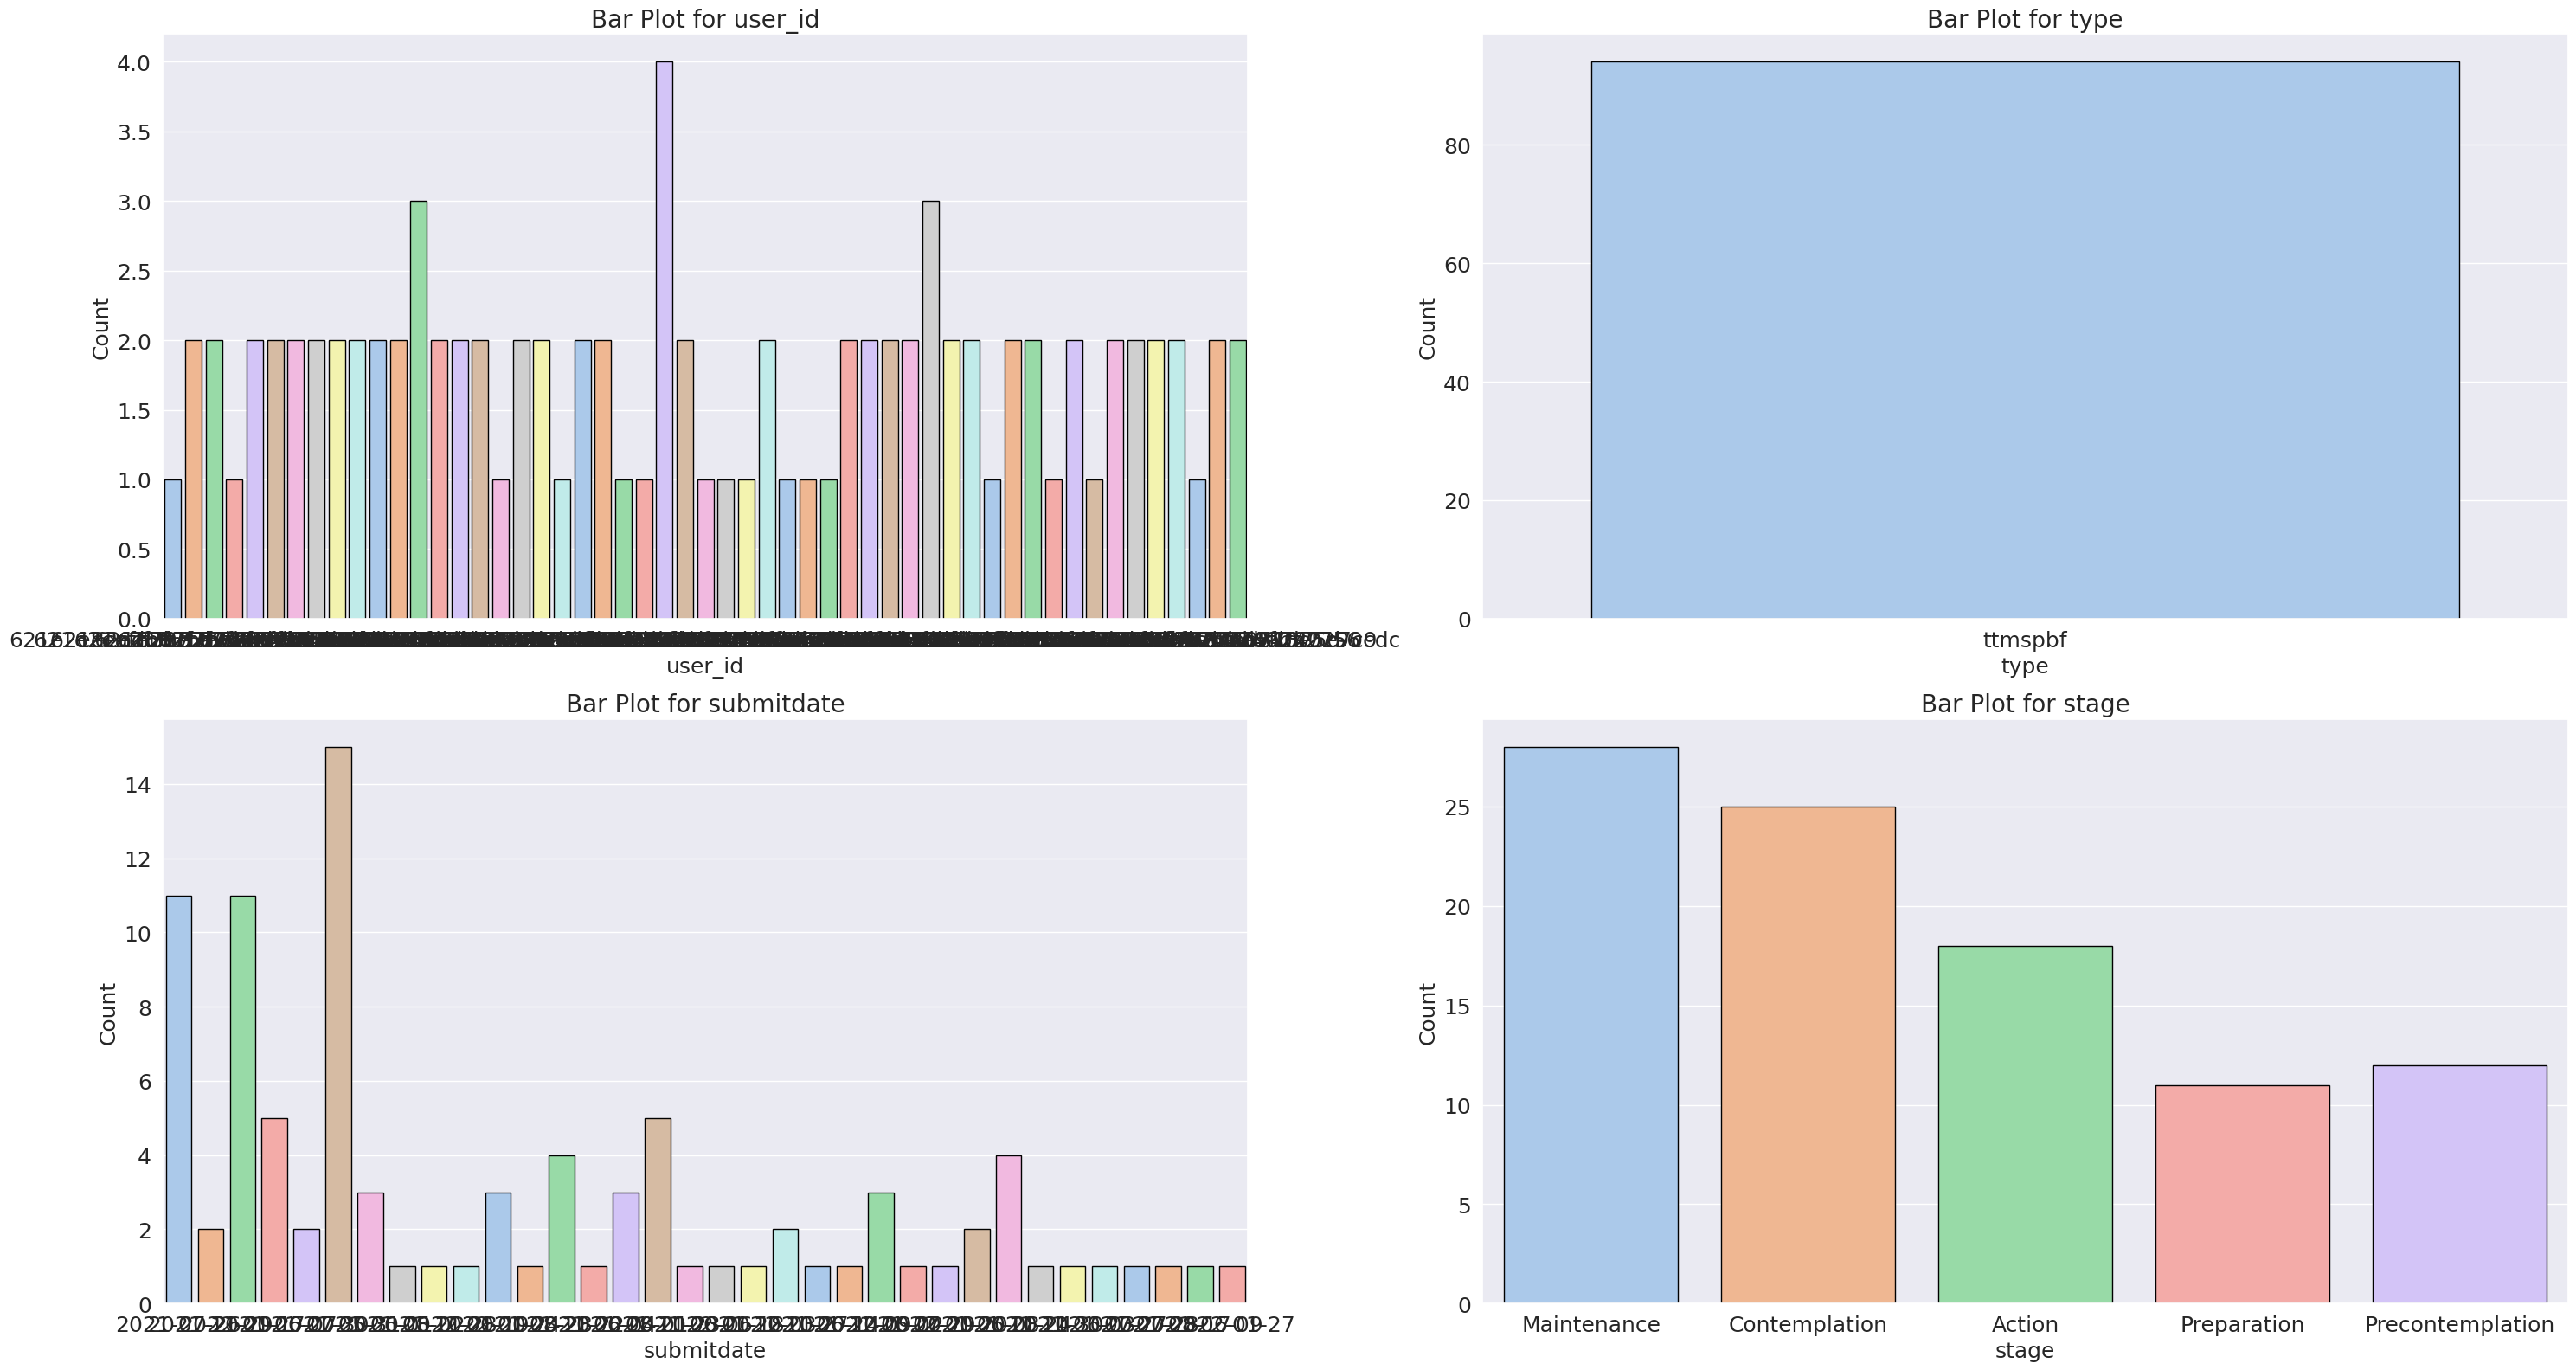

In [ ]:
col_category = df1.select_dtypes(include=['object']).columns

ncols = 2
nrows = (len(col_category) + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, nrows * 8))
axes = axes.flatten()

for ax, col in zip(axes, col_category):
    sns.countplot(data=df1, x=col, ax=ax, edgecolor='black', palette='pastel')
    ax.set_title(f"Bar Plot for {col}", fontsize=20)
    ax.set_xlabel(col, fontsize=18)
    ax.set_ylabel("Count", fontsize=18)

    ax.tick_params(axis='x', labelsize=18)
    ax.tick_params(axis='y', labelsize=18)

for i in range(len(col_category), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

**Visualizing distribution**

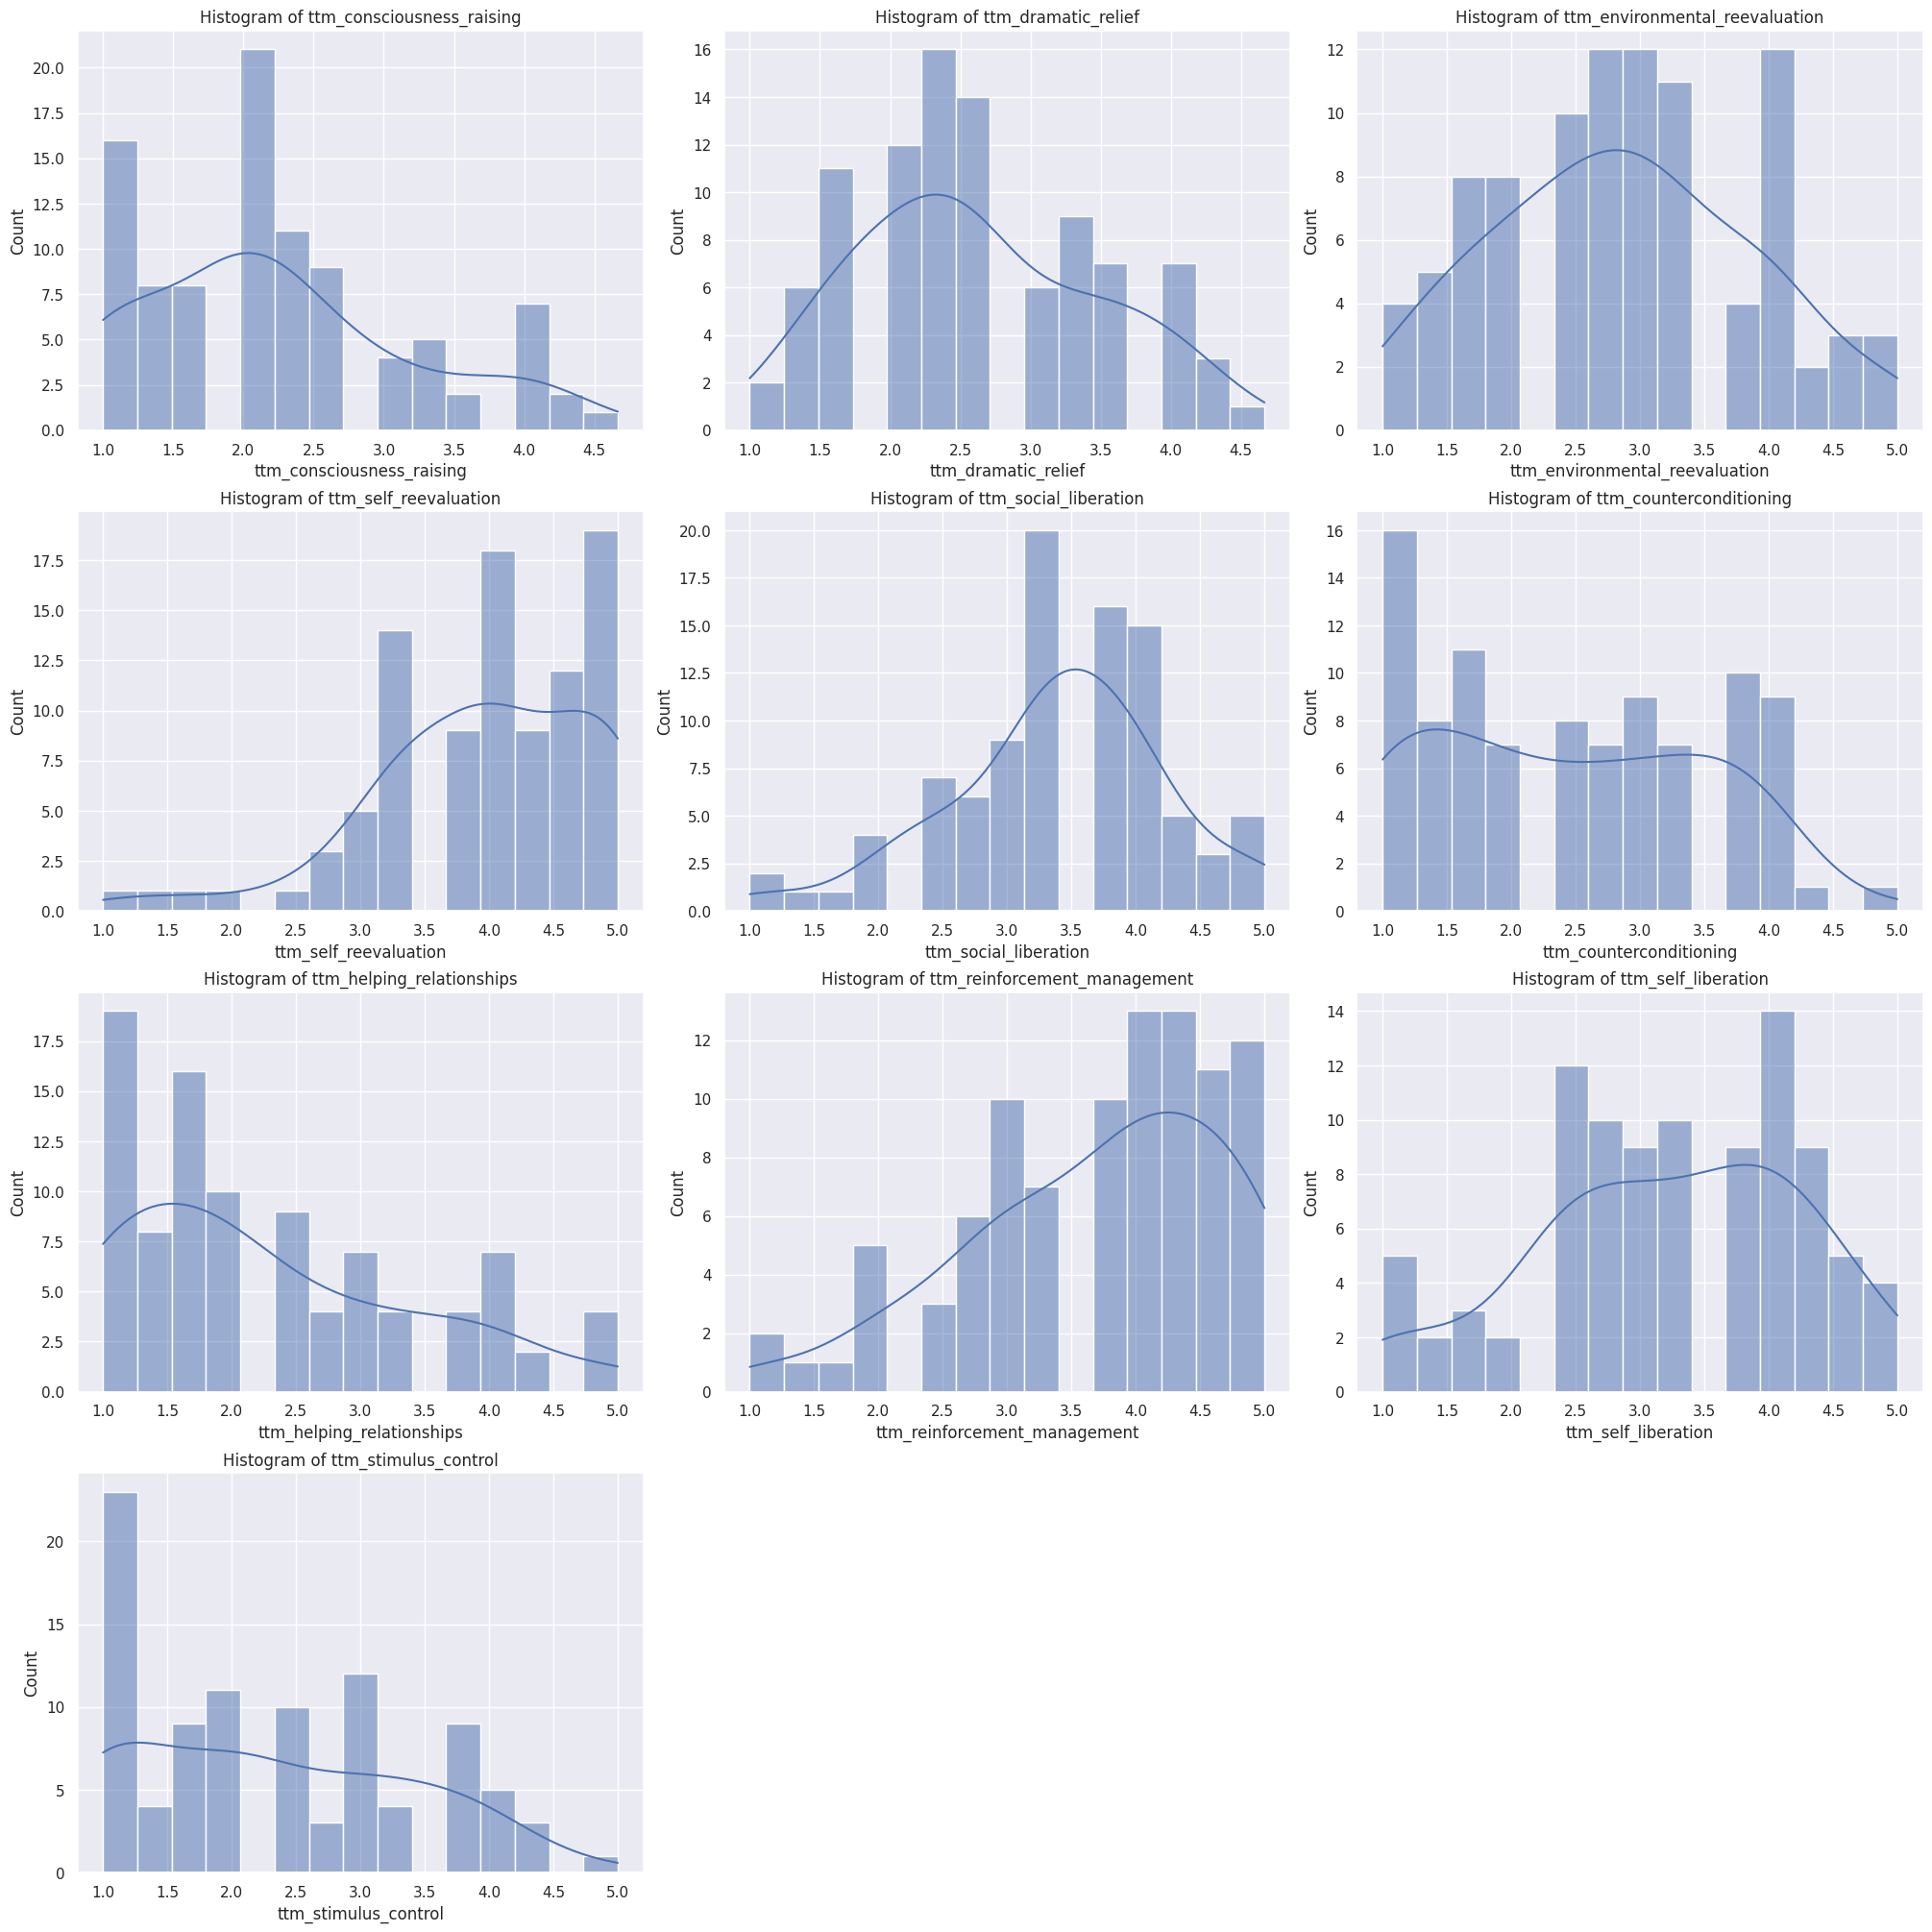

In [ ]:
num_cols = df1.select_dtypes(include=['number']).columns

n_cols = 3
n_rows = int(np.ceil(len(num_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5), constrained_layout=True)
axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    sns.histplot(data=df1, x=col, kde=True, bins=15, ax=ax)
    ax.set_title(f'Histogram of {col}')

for ax in axes[len(num_cols):]:
    fig.delaxes(ax)

plt.show()

**Visualizing association**

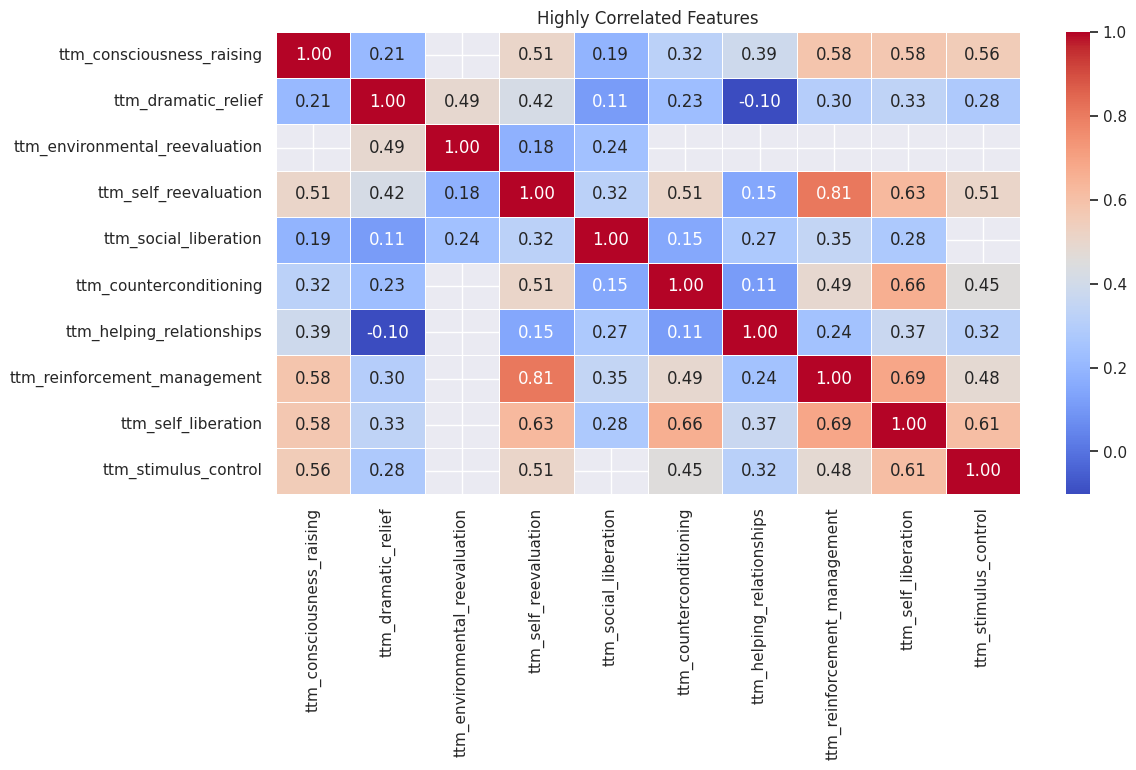

In [ ]:
corr = df1.select_dtypes(include=['float64', 'int64']).corr()

threshold = 0.1
mask = np.abs(corr) < threshold

plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, fmt=".2f", mask=mask, cmap="coolwarm", linewidths=0.5)
plt.title("Highly Correlated Features")
plt.show()

### Insight (Daily & TTM)

In [ ]:
id_ttm = df1['user_id'].unique().tolist()
id_not_in_ttm = []
for i in id_daily:
  if i not in id_ttm:
    id_not_in_ttm.append(i)
    # print(i)
len(id_not_in_ttm)

18

In [ ]:
df1_new = df1.copy()
df1_new.drop(df1_new[df1_new['user_id'].isin(id_not_in_ttm)].index, inplace=True)
df1_new

user_id     type  submitdate          stage  \
0   621e2e8e67b776a24055b564  ttmspbf  2021-07-26    Maintenance   
1   621e2eaf67b776a2406b14ac  ttmspbf  2021-11-29  Contemplation   
2   621e2eaf67b776a2406b14ac  ttmspbf  2022-01-17         Action   
3   621e2ed667b776a24085d8d1  ttmspbf  2021-06-07    Preparation   
4   621e2ed667b776a24085d8d1  ttmspbf  2021-07-30  Contemplation   
..                       ...      ...         ...            ...   
89  621e36c267b776a240ba2756  ttmspbf  2021-05-31         Action   
90  621e36f967b776a240e5e7c9  ttmspbf  2021-05-31         Action   
91  621e36f967b776a240e5e7c9  ttmspbf  2021-07-26         Action   
92  621e375b67b776a240290cdc  ttmspbf  2021-06-01         Action   
93  621e375b67b776a240290cdc  ttmspbf  2021-06-08         Action   

    ttm_consciousness_raising  ttm_dramatic_relief  \
0                    1.333333             2.666667   
1                    3.333333             2.666667   
2                    3.666667             2.333333   
3                    1.000000             2.000000   
4                    1.666667             2.333333   
..                        ...                  ...   
89                   2.666667             1.000000   
90                   2.000000             4.333333   
91                   4.000000             3.666667   
92                   2.333333             1.666667   
93                   2.333333             1.666667   

    ttm_environmental_reevaluation  ttm_self_reevaluation  \
0                         2.333333               4.333333   
1                         4.000000               4.666667   
2                         4.333333               4.333333   
3                         3.000000               3.333333   
4                         4.000000               3.333333   
..                             ...                    ...   
89                        3.000000               4.333333   
90                        3.333333               5.000000   
91                        3.666667               5.000000   
92                        1.000000               2.666667   
93                        1.000000               3.000000   

    ttm_social_liberation  ttm_counterconditioning  ttm_helping_relationships  \
0                4.000000                 4.000000                   4.000000   
1                4.000000                 2.333333                   3.000000   
2                3.333333                 1.666667                   3.000000   
3                3.333333                 1.000000                   1.000000   
4                3.666667                 1.333333                   1.000000   
..                    ...                      ...                        ...   
89               3.666667                 4.000000                   3.333333   
90               3.000000                 3.333333                   1.666667   
91               3.000000                 3.000000                   1.666667   
92               5.000000                 1.000000                   3.000000   
93               4.666667                 1.333333                   3.000000   

    ttm_reinforcement_management  ttm_self_liberation  ttm_stimulus_control  
0                       4.000000             4.000000              1.666667  
1                       4.333333             3.333333              1.000000  
2                       4.333333             3.333333              3.000000  
3                       3.333333             1.666667              1.000000  
4                       2.333333             2.333333              1.666667  
..                           ...                  ...                   ...  
89                      4.000000             3.666667              3.000000  
90                      3.666667             4.000000              3.333333  
91                      4.666667             4.000000              3.000000  
92                      4.666667             2.666667              1.

In [ ]:
df1_new['user_id'].value_counts()

user_id
621e329067b776a2402ffad2    4
621e33cf67b776a240087de9    3
621e301e67b776a240608a72    3
621e2f6167b776a240e082a9    2
621e2ed667b776a24085d8d1    2
621e30c867b776a240d4aa6c    2
621e30e267b776a240e5bf90    2
621e2fb367b776a24015accd    2
621e2f9167b776a240011ccb    2
621e2fce67b776a240279baa    2
621e2ff067b776a2403eb737    2
621e300767b776a2404dc717    2
621e301367b776a24057738e    2
621e323667b776a240f19134    2
621e312a67b776a240164d59    2
621e30e467b776a240e817c7    2
621e310d67b776a24003096d    2
621e324e67b776a2400191cb    2
621e32af67b776a24045b4cf    2
621e2f7a67b776a240f14425    2
621e2eaf67b776a2406b14ac    2
621e375b67b776a240290cdc    2
621e36f967b776a240e5e7c9    2
621e366567b776a24076a727    2
621e367e67b776a24087d75d    2
621e335a67b776a240bb12ff    2
621e337667b776a240ce78ab    2
621e339967b776a240e502de    2
621e33b067b776a240f39e56    2
621e356967b776a24027bd9f    2
621e362467b776a2404ad513    2
621e34db67b776a240c9c2be    2
621e34f767b776a240de4e1a    2
621e346f67b776a24081744f    2
621e341067b776a24037b105    2
621e33ed67b776a2401cf5f7    2
621e331067b776a24085dd3f    2
621e314867b776a24029ebf9    1
621e30f467b776a240f22944    1
621e2e8e67b776a24055b564    1
621e2f3967b776a240c654db    1
621e328667b776a240281372    1
621e32d067b776a2405b7d54    1
621e32d967b776a240627414    1
621e32e667b776a2406d2f1c    1
621e333567b776a240a0c217    1
621e332267b776a24092a584    1
621e333967b776a240a3cd06    1
621e326767b776a24012e179    1
621e34ec67b776a240d60873    1
621e345c67b776a2407146a8    1
621e351a67b776a240f6204b    1
621e36c267b776a240ba2756    1
Name: count, dtype: int64

In [ ]:
df1_new.columns.tolist()

['user_id',
 'type',
 'submitdate',
 'stage',
 'ttm_consciousness_raising',
 'ttm_dramatic_relief',
 'ttm_environmental_reevaluation',
 'ttm_self_reevaluation',
 'ttm_social_liberation',
 'ttm_counterconditioning',
 'ttm_helping_relationships',
 'ttm_reinforcement_management',
 'ttm_self_liberation',
 'ttm_stimulus_control']

In [ ]:
# menghapus user_id duplikat, dengan mengambil nilai variabel lain berdasarkan variabel submitdate yang terbaru
df1_new['submitdate'] = pd.to_datetime(df1_new['submitdate'])
df1_new = df1_new.sort_values(['user_id', 'submitdate'], ascending=[True, False])
df1_latest = df1_new.copy()
df1_latest = df1_new.drop_duplicates(subset='user_id', keep='first').reset_index(drop=True)
df1_latest

user_id     type submitdate             stage  \
0   621e2e8e67b776a24055b564  ttmspbf 2021-07-26       Maintenance   
1   621e2eaf67b776a2406b14ac  ttmspbf 2022-01-17            Action   
2   621e2ed667b776a24085d8d1  ttmspbf 2021-07-30     Contemplation   
3   621e2f3967b776a240c654db  ttmspbf 2021-05-31       Preparation   
4   621e2f6167b776a240e082a9  ttmspbf 2021-08-02       Maintenance   
5   621e2f7a67b776a240f14425  ttmspbf 2021-07-30       Maintenance   
6   621e2f9167b776a240011ccb  ttmspbf 2022-01-19       Preparation   
7   621e2fb367b776a24015accd  ttmspbf 2021-07-26            Action   
8   621e2fce67b776a240279baa  ttmspbf 2021-07-26     Contemplation   
9   621e2ff067b776a2403eb737  ttmspbf 2022-01-17       Preparation   
10  621e300767b776a2404dc717  ttmspbf 2022-01-24            Action   
11  621e301367b776a24057738e  ttmspbf 2021-07-26       Maintenance   
12  621e301e67b776a240608a72  ttmspbf 2021-11-22       Maintenance   
13  621e30c867b776a240d4aa6c  ttmspbf 2021-08-01       Maintenance   
14  621e30e267b776a240e5bf90  ttmspbf 2022-01-17     Contemplation   
15  621e30e467b776a240e817c7  ttmspbf 2021-08-01     Contemplation   
16  621e30f467b776a240f22944  ttmspbf 2022-01-18     Contemplation   
17  621e310d67b776a24003096d  ttmspbf 2022-01-24       Preparation   
18  621e312a67b776a240164d59  ttmspbf 2022-01-17     Contemplation   
19  621e314867b776a24029ebf9  ttmspbf 2021-05-31       Preparation   
20  621e323667b776a240f19134  ttmspbf 2022-01-17            Action   
21  621e324e67b776a2400191cb  ttmspbf 2022-01-17  Precontemplation   
22  621e326767b776a24012e179  ttmspbf 2021-06-07       Maintenance   
23  621e328667b776a240281372  ttmspbf 2021-05-31       Maintenance   
24  621e329067b776a2402ffad2  ttmspbf 2021-07-26       Maintenance   
25  621e32af67b776a24045b4cf  ttmspbf 2021-07-26       Maintenance   
26  621e32d067b776a2405b7d54  ttmspbf 2021-12-09       Preparation   
27  621e32d967b776a240627414  ttmspbf 2021-05-31       Maintenance   
28  621e32e667b776a2406d2f1c  ttmspbf 2021-11-23     Contemplation   
29  621e331067b776a24085dd3f  ttmspbf 2022-01-17     Contemplation   
30  621e332267b776a24092a584  ttmspbf 2021-06-02       Maintenance   
31  621e333567b776a240a0c217  ttmspbf 2021-11-23     Contemplation   
32  621e333967b776a240a3cd06  ttmspbf 2021-11-27       Maintenance   
33  621e335a67b776a240bb12ff  ttmspbf 2021-07-29            Action   
34  621e337667b776a240ce78ab  ttmspbf 2021-07-26     Contemplation   
35  621e339967b776a240e502de  ttmspbf 2022-01-20       Maintenance   
36  621e33b067b776a240f39e56  ttmspbf 2021-07-26     Contemplation   
37  621e33cf67b776a240087de9  ttmspbf 2022-01-17     Contemplation   
38  621e33ed67b776a2401cf5f7  ttmspbf 2021-07-27  Precontemplation   
39  621e341067b776a24037b105  ttmspbf 2021-07-28     Contemplation   
40  621e345c67b776a2407146a8  ttmspbf 2021-08-17     Contemplation   
41  621e346f67b776a24081744f  ttmspbf 2022-01-24  Precontemplation   
42  621e34db67b776a240c9c2be  ttmspbf 2021-06-09       Preparation   
43  621e34ec67b776a240d60873  ttmspbf 2021-06-02       Maintenance   
44  621e34f767b776a240de4e1a  ttmspbf 2021-07-26  Precontemplation   
45  621e351a67b776a240f6204b  ttmspbf 2021-07-26            Action   
46  621e356967b776a24027bd9f  ttmspbf 2022-01-17            Action   
47  621e362467b776a2404ad513  ttmspbf 2021-08-01       Preparation   
48  621e366567b776a24076a727  ttmspbf 2022-01-17       Maintenance   
49  621e367e67b776a24087d75d  ttmspbf 2022-01-27  Precontemplation   
50  621e36c267b776a240ba2756  ttmspbf 2021-05-31            Action   
51  621e36f967b776a240e5e7c9  ttmspbf 2021-07-26            Action   
52  621e375b67b776a240290cdc  ttmspbf 2021-06-08            Action   

    ttm_consciousness_raising  ttm_dramatic_relief  \
0                    1.333333             2.666667   
1                    3.666667             2.333333   
2                    1.666667             2.333333   
3                    2.0

In [ ]:
df.rename(columns={'User ID': 'user_id'}, inplace=True)
df1_merged = df1_latest[['user_id', 'stage', 'type',
 'ttm_consciousness_raising',
 'ttm_dramatic_relief',
 'ttm_environmental_reevaluation',
 'ttm_self_reevaluation',
 'ttm_social_liberation',
 'ttm_counterconditioning',
 'ttm_helping_relationships',
 'ttm_reinforcement_management',
 'ttm_self_liberation',
 'ttm_stimulus_control']].merge(df[['user_id', 'Segment']], on='user_id', how='left')
df1_merged

user_id             stage     type  \
0   621e2e8e67b776a24055b564       Maintenance  ttmspbf   
1   621e2eaf67b776a2406b14ac            Action  ttmspbf   
2   621e2ed667b776a24085d8d1     Contemplation  ttmspbf   
3   621e2f3967b776a240c654db       Preparation  ttmspbf   
4   621e2f6167b776a240e082a9       Maintenance  ttmspbf   
5   621e2f7a67b776a240f14425       Maintenance  ttmspbf   
6   621e2f9167b776a240011ccb       Preparation  ttmspbf   
7   621e2fb367b776a24015accd            Action  ttmspbf   
8   621e2fce67b776a240279baa     Contemplation  ttmspbf   
9   621e2ff067b776a2403eb737       Preparation  ttmspbf   
10  621e300767b776a2404dc717            Action  ttmspbf   
11  621e301367b776a24057738e       Maintenance  ttmspbf   
12  621e301e67b776a240608a72       Maintenance  ttmspbf   
13  621e30c867b776a240d4aa6c       Maintenance  ttmspbf   
14  621e30e267b776a240e5bf90     Contemplation  ttmspbf   
15  621e30e467b776a240e817c7     Contemplation  ttmspbf   
16  621e30f467b776a240f22944     Contemplation  ttmspbf   
17  621e310d67b776a24003096d       Preparation  ttmspbf   
18  621e312a67b776a240164d59     Contemplation  ttmspbf   
19  621e314867b776a24029ebf9       Preparation  ttmspbf   
20  621e323667b776a240f19134            Action  ttmspbf   
21  621e324e67b776a2400191cb  Precontemplation  ttmspbf   
22  621e326767b776a24012e179       Maintenance  ttmspbf   
23  621e328667b776a240281372       Maintenance  ttmspbf   
24  621e329067b776a2402ffad2       Maintenance  ttmspbf   
25  621e32af67b776a24045b4cf       Maintenance  ttmspbf   
26  621e32d067b776a2405b7d54       Preparation  ttmspbf   
27  621e32d967b776a240627414       Maintenance  ttmspbf   
28  621e32e667b776a2406d2f1c     Contemplation  ttmspbf   
29  621e331067b776a24085dd3f     Contemplation  ttmspbf   
30  621e332267b776a24092a584       Maintenance  ttmspbf   
31  621e333567b776a240a0c217     Contemplation  ttmspbf   
32  621e333967b776a240a3cd06       Maintenance  ttmspbf   
33  621e335a67b776a240bb12ff            Action  ttmspbf   
34  621e337667b776a240ce78ab     Contemplation  ttmspbf   
35  621e339967b776a240e502de       Maintenance  ttmspbf   
36  621e33b067b776a240f39e56     Contemplation  ttmspbf   
37  621e33cf67b776a240087de9     Contemplation  ttmspbf   
38  621e33ed67b776a2401cf5f7  Precontemplation  ttmspbf   
39  621e341067b776a24037b105     Contemplation  ttmspbf   
40  621e345c67b776a2407146a8     Contemplation  ttmspbf   
41  621e346f67b776a24081744f  Precontemplation  ttmspbf   
42  621e34db67b776a240c9c2be       Preparation  ttmspbf   
43  621e34ec67b776a240d60873       Maintenance  ttmspbf   
44  621e34f767b776a240de4e1a  Precontemplation  ttmspbf   
45  621e351a67b776a240f6204b            Action  ttmspbf   
46  621e356967b776a24027bd9f            Action  ttmspbf   
47  621e362467b776a2404ad513       Preparation  ttmspbf   
48  621e366567b776a24076a727       Maintenance  ttmspbf   
49  621e367e67b776a24087d75d  Precontemplation  ttmspbf   
50  621e36c267b776a240ba2756            Action  ttmspbf   
51  621e36f967b776a240e5e7c9            Action  ttmspbf   
52  621e375b67b776a240290cdc            Action  ttmspbf   

    ttm_consciousness_raising  ttm_dramatic_relief  \
0                    1.333333             2.666667   
1                    3.666667             2.333333   
2                    1.666667             2.333333   
3                    2.000000             2.000000   
4                    2.000000             3.666667   
5                    1.666667             1.666667   
6                    4.000000             3.000000   
7                    1.666667             2.000000   
8                    2.000000             2.666667   
9                    1.000000             2.333333   
10                   1.333333             2.333333   
11                   2.333333             3.333333   
12                   3.000000             2.333333   
13                   2.333333             3.000000   
14                   3.0

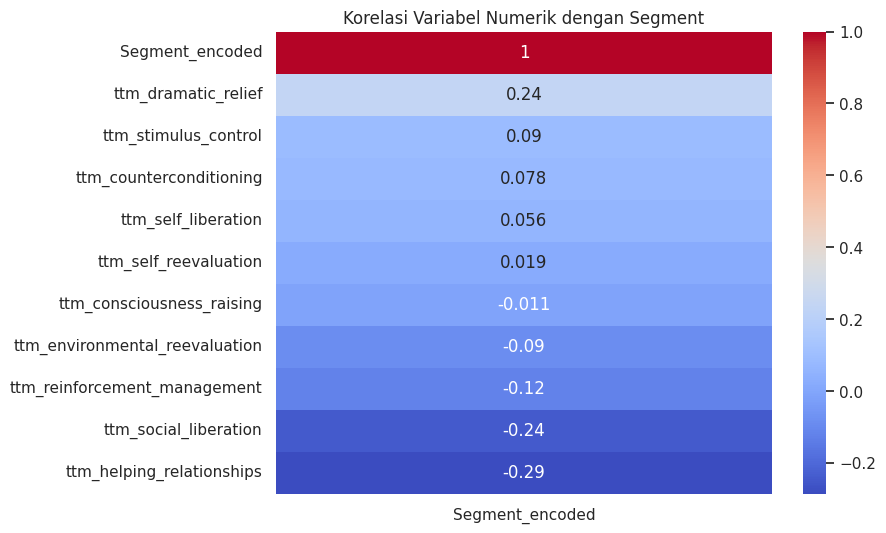

In [ ]:
#ngeliat data mana yang paling berpengaruh terhadap segment pake heatmap korelasi
df_korelasi = df1_merged.copy()
df_korelasi['Segment_encoded'] = df_korelasi['Segment'].astype('category').cat.codes

corr_matrix = df_korelasi.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix[['Segment_encoded']].sort_values(by='Segment_encoded', ascending=False), annot=True, cmap='coolwarm')
plt.title('Korelasi Variabel Numerik dengan Segment')
plt.show()

#hasil: ttm_helping_relationships (berbanding terbalik), ttm_social_liberation (berbanding terbalik),
#ttm_dramatic_relief (berbanding lurus), ttm_reinforcement_management (berbanding terbalik)

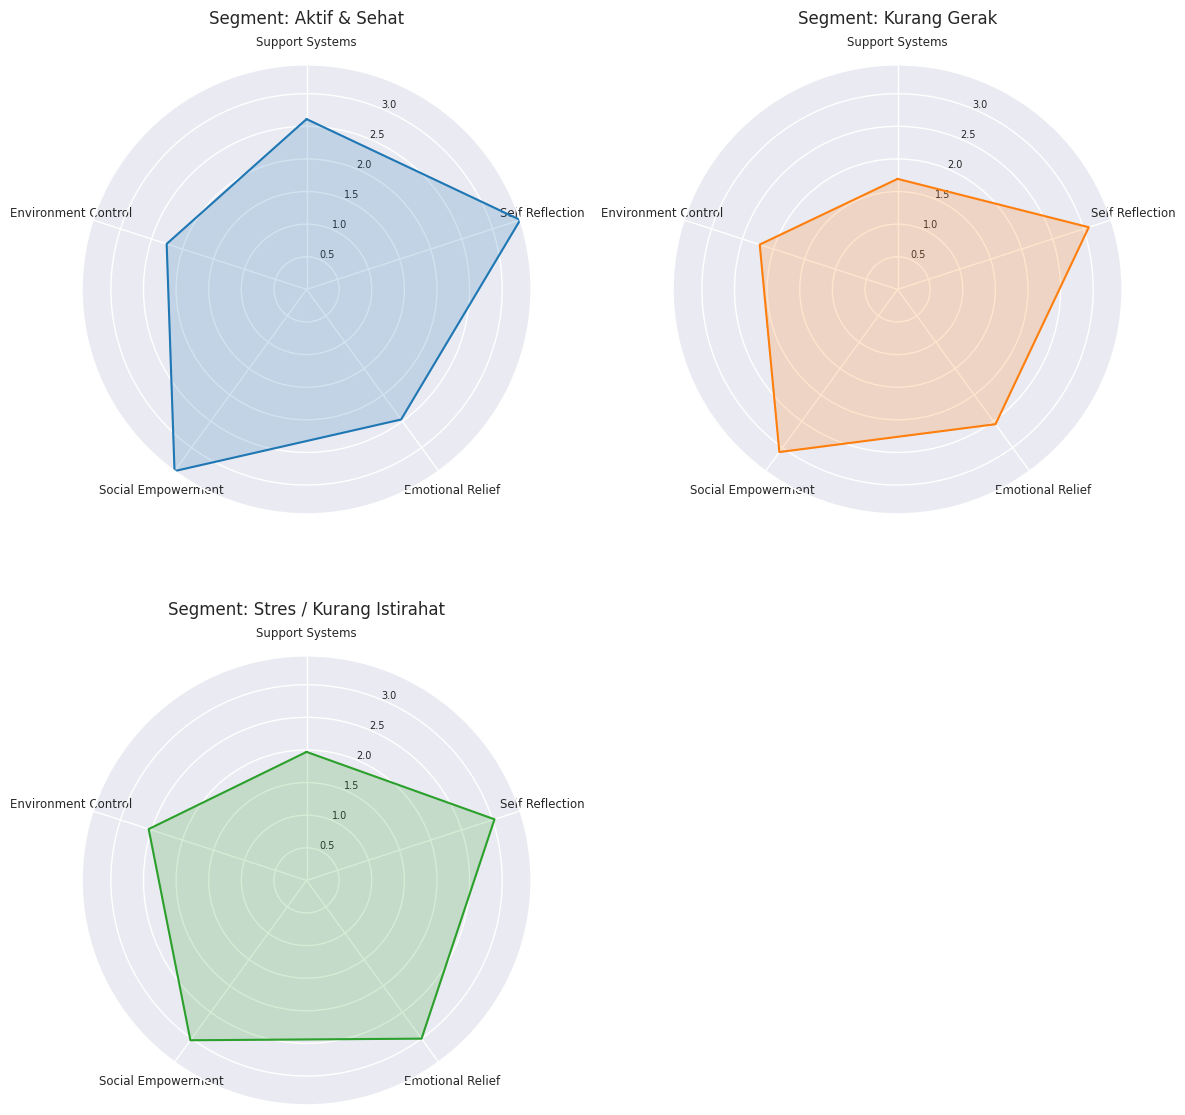

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# processes = [ 'ttm_consciousness_raising',
#  'ttm_dramatic_relief',
#  'ttm_environmental_reevaluation',
#  'ttm_self_reevaluation',
#  'ttm_social_liberation',
#  'ttm_counterconditioning',
#  'ttm_helping_relationships',
#  'ttm_reinforcement_management',
#  'ttm_self_liberation',
#  'ttm_stimulus_control']
processes = ['ttm_helping_relationships', 'ttm_social_liberation', 'ttm_dramatic_relief', 'ttm_social_liberation', 'ttm_stimulus_control']
new_labels = ['Support Systems', 'Self Reflection', 'Emotional Relief', 'Social Empowerment', 'Environment Control']
# new_labels = [
#     'Awareness Raising', 'Emotional Relief', 'Environmental Reflection',
#     'Self Reflection', 'Social Empowerment', 'Healthy Substitution',
#     'Support Systems', 'Positive Rewards', 'Commitment to Change',
#     'Environment Control'
# ]

avg_per_segment = df1_merged.groupby('Segment')[processes].mean()

labels = processes
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

segments = avg_per_segment.index.tolist()
num_segments = len(segments)

cols = 2
rows = (num_segments + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 6), subplot_kw=dict(polar=True))
axes = axes.flatten()

# Daftar warna, kamu bisa tambahkan atau ganti sesuai keinginan
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

for i, segment in enumerate(segments):
    ax = axes[i]
    values = avg_per_segment.loc[segment].tolist()
    values += values[:1]
    color = colors[i % len(colors)]  # putar warna jika segment > warna tersedia
    ax.tick_params(axis='y', labelsize=7)
    ax.plot(angles, values, label=segment, color=color)
    ax.fill(angles, values, alpha=0.2, color=color)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), new_labels, fontsize=8.5)
    ax.set_title(f"Segment: {segment}", size=12, pad=30)
    ax.set_rlim(0, avg_per_segment.max().max())

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## STAI (State-Trait Anxiety Inventory)

Alat ukur psikologis untuk menilai tingkat kecemasan seseorang. Skor lebih tinggi menandakan tingkat kecemasan atau stres yang lebih tinggi.

### EDA

In [ ]:
data_stai = pd.read_csv('/content/drive/MyDrive/Dataset Datmin/stai.csv')
df2 = data_stai.copy()

In [ ]:
df2

Unnamed: 0                   user_id  type  submitdate  stai_stress  \
0             0  621e2e8e67b776a24055b564  stai  2021-05-31         45.0   
1             1  621e2e8e67b776a24055b564  stai  2021-06-07         46.0   
2             3  621e2e8e67b776a24055b564  stai  2021-07-19         46.0   
3             4  621e2e8e67b776a24055b564  stai  2021-07-26         46.0   
4             5  621e2e8e67b776a24055b564  stai  2021-06-28         54.0   
..          ...                       ...   ...         ...          ...   
274           0  621e375b67b776a240290cdc  stai  2021-06-08         60.0   
275           1  621e375b67b776a240290cdc  stai  2021-07-06         60.0   
276           2  621e375b67b776a240290cdc  stai  2021-06-01         59.0   
277           3  621e375b67b776a240290cdc  stai  2021-06-22         60.0   
278           4  621e375b67b776a240290cdc  stai  2021-07-12         51.0   

    stai_stress_category  
0          Below average  
1                Average  
2                Average  
3                Average  
4          Above average  
..                   ...  
274        Above average  
275        Above average  
276        Above average  
277        Above average  
278        Above average  

[279 rows x 6 columns]

In [ ]:
df2.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df2

user_id  type  submitdate  stai_stress  \
0    621e2e8e67b776a24055b564  stai  2021-05-31         45.0   
1    621e2e8e67b776a24055b564  stai  2021-06-07         46.0   
2    621e2e8e67b776a24055b564  stai  2021-07-19         46.0   
3    621e2e8e67b776a24055b564  stai  2021-07-26         46.0   
4    621e2e8e67b776a24055b564  stai  2021-06-28         54.0   
..                        ...   ...         ...          ...   
274  621e375b67b776a240290cdc  stai  2021-06-08         60.0   
275  621e375b67b776a240290cdc  stai  2021-07-06         60.0   
276  621e375b67b776a240290cdc  stai  2021-06-01         59.0   
277  621e375b67b776a240290cdc  stai  2021-06-22         60.0   
278  621e375b67b776a240290cdc  stai  2021-07-12         51.0   

    stai_stress_category  
0          Below average  
1                Average  
2                Average  
3                Average  
4          Above average  
..                   ...  
274        Above average  
275        Above average  
276        Above average  
277        Above average  
278        Above average  

[279 rows x 5 columns]

Deskripsi fitur dataset

| Kolom                | Penjelasan                                                                 |
|----------------------|----------------------------------------------------------------------------|
| user_id              | ID anonim pengguna yang mengisi form STAI.                                |
| type                 | Jenis form atau kuisioner, dalam hal ini `stai` untuk State-Trait Anxiety Inventory. |
| submitdate           | Tanggal saat pengguna mengisi form STAI.                                  |
| stai_stress          | Skor stres pengguna berdasarkan skala STAI. Nilainya biasanya dari 20–80. |
| stai_stress_category | Kategori tingkat stres berdasarkan skor STAI, seperti:                    |
|                      | - Below average: Stres lebih rendah dari rata-rata                        |
|                      | - Average: Stres dalam batas normal                                       |
|                      | - Above average: Stres lebih tinggi dari rata-rata   


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               279 non-null    object 
 1   type                  279 non-null    object 
 2   submitdate            279 non-null    object 
 3   stai_stress           279 non-null    float64
 4   stai_stress_category  279 non-null    object 
dtypes: float64(1), object(4)
memory usage: 11.0+ KB


In [ ]:
df2.duplicated().sum()

np.int64(0)

In [ ]:
df2.isna().sum()

user_id                 0
type                    0
submitdate              0
stai_stress             0
stai_stress_category    0
dtype: int64

**Visualizing amounts**

<ipython-input-269-d0edbacbffec>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x=col, ax=ax, edgecolor='black', palette='pastel')
<ipython-input-269-d0edbacbffec>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x=col, ax=ax, edgecolor='black', palette='pastel')
<ipython-input-269-d0edbacbffec>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x=col, ax=ax, edgecolor='black', palette='pastel')
<ipython-input-269-d0edbacbffec>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated

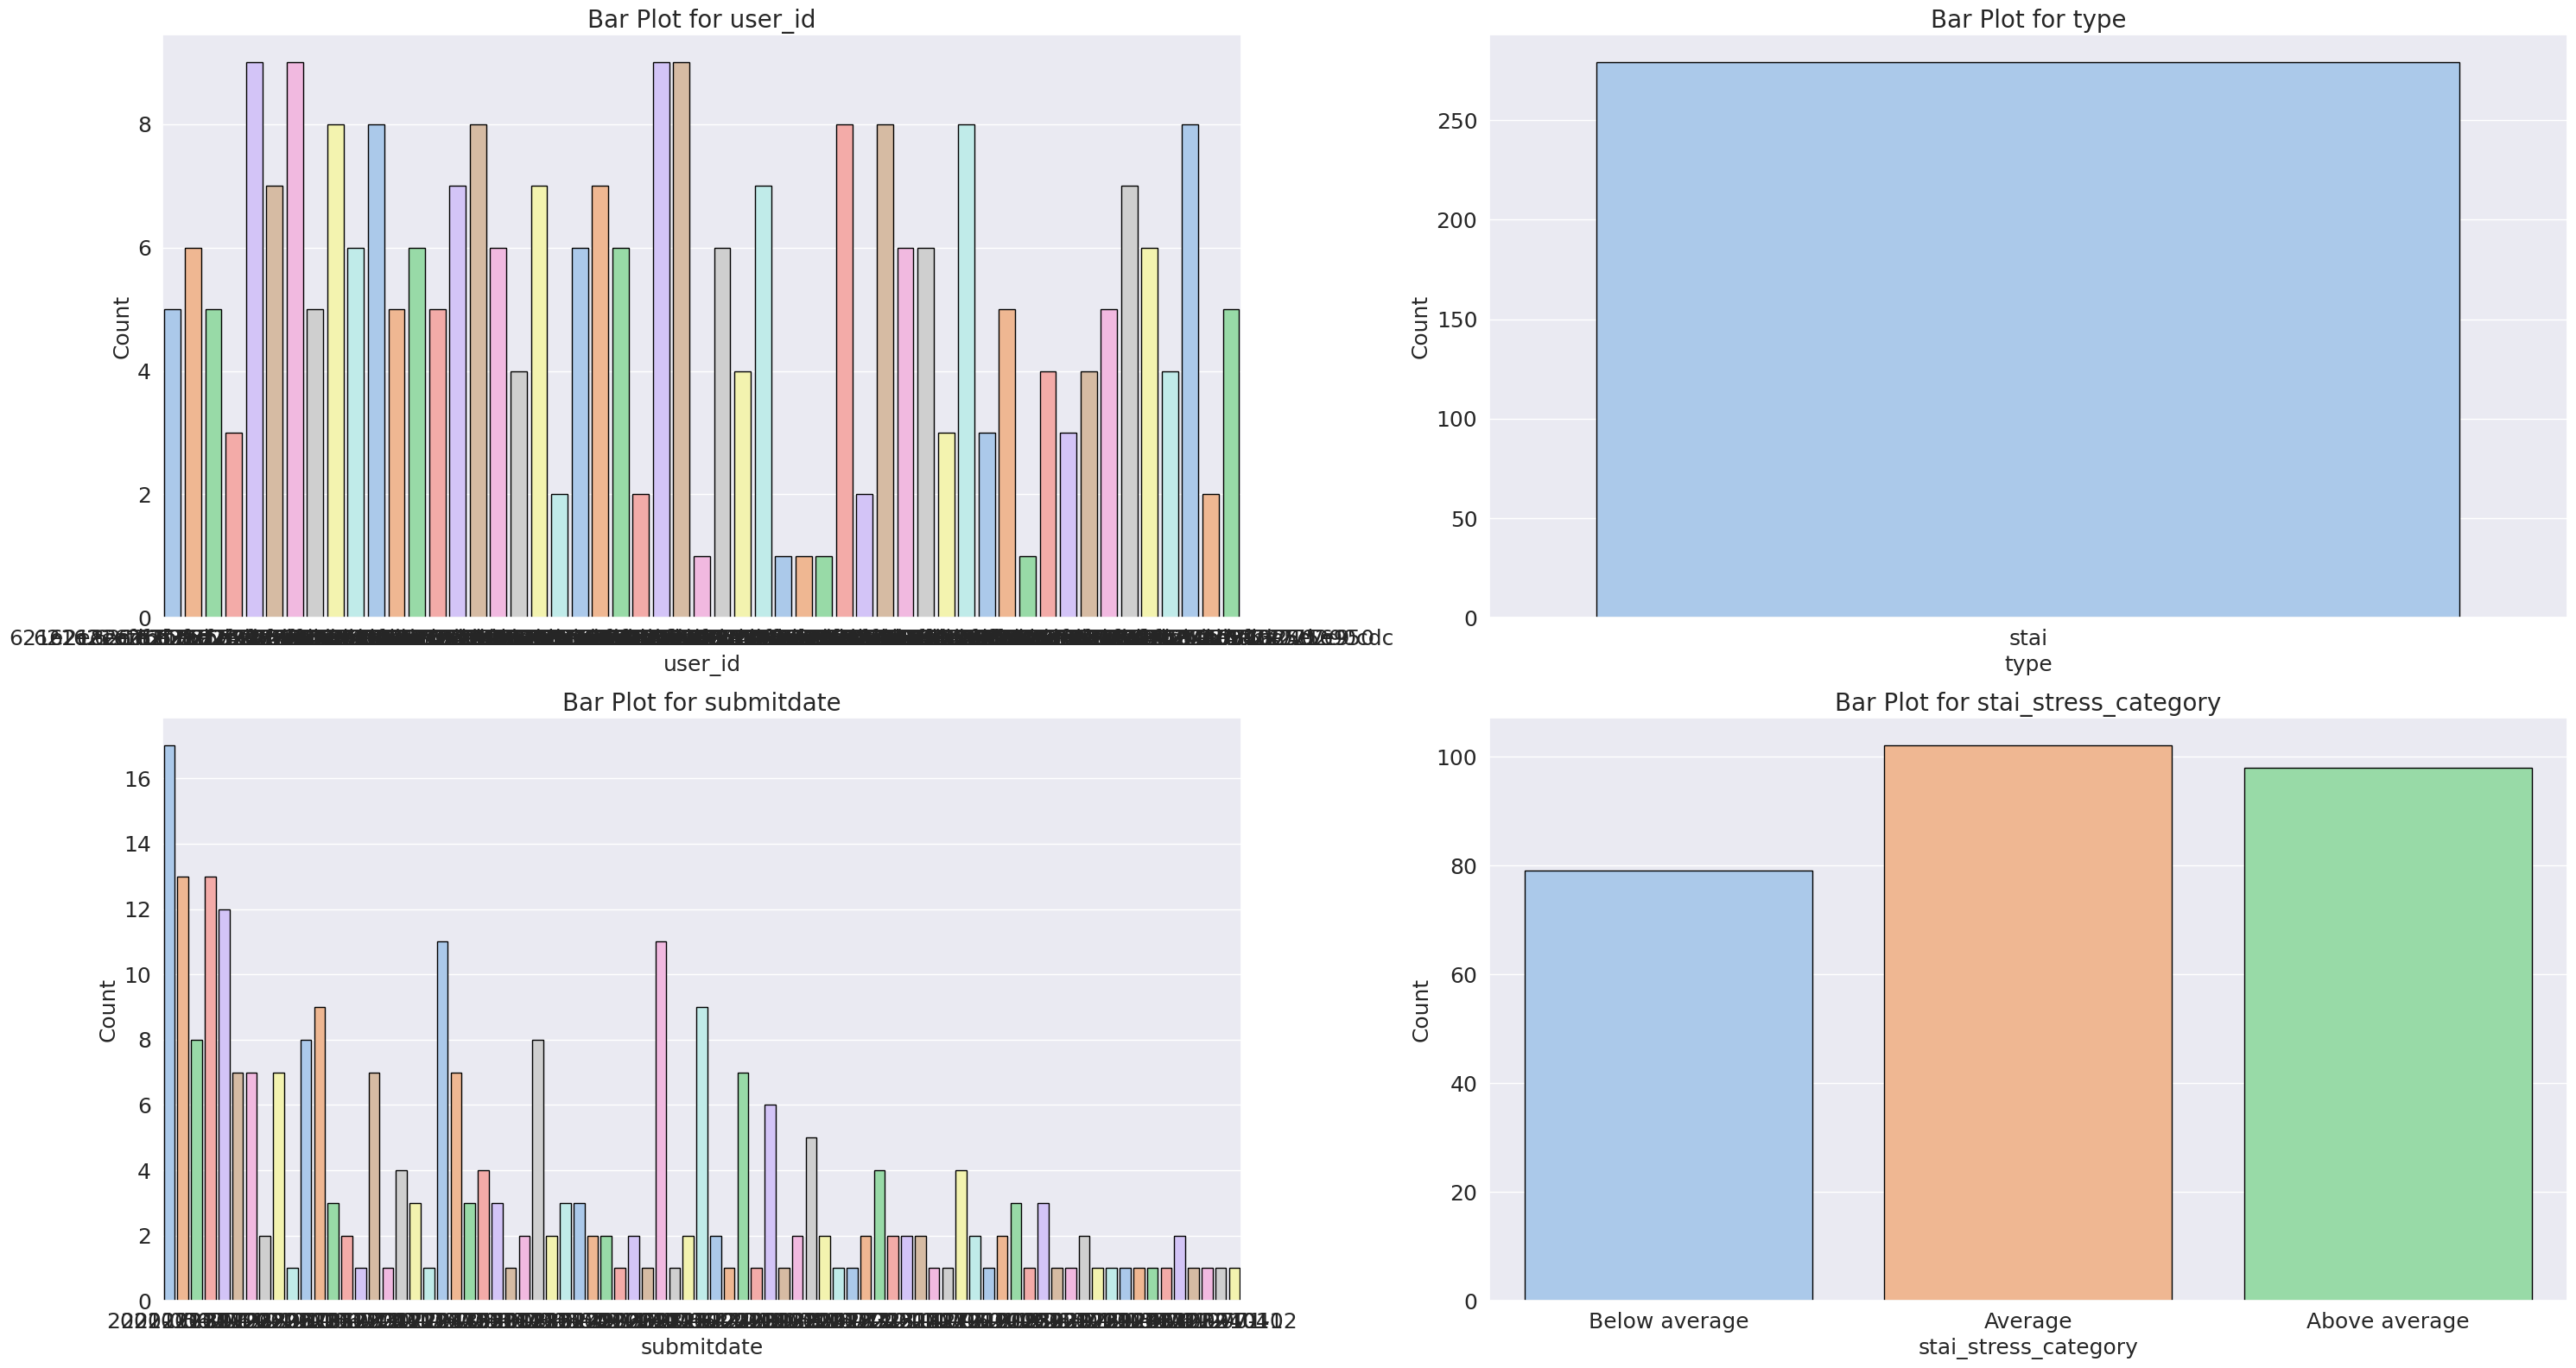

In [ ]:
col_category = df2.select_dtypes(include=['object']).columns

ncols = 2
nrows = (len(col_category) + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, nrows * 8))
axes = axes.flatten()

for ax, col in zip(axes, col_category):
    sns.countplot(data=df2, x=col, ax=ax, edgecolor='black', palette='pastel')
    ax.set_title(f"Bar Plot for {col}", fontsize=20)
    ax.set_xlabel(col, fontsize=18)
    ax.set_ylabel("Count", fontsize=18)

    ax.tick_params(axis='x', labelsize=18)
    ax.tick_params(axis='y', labelsize=18)

for i in range(len(col_category), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

**Visualizing Distribution**

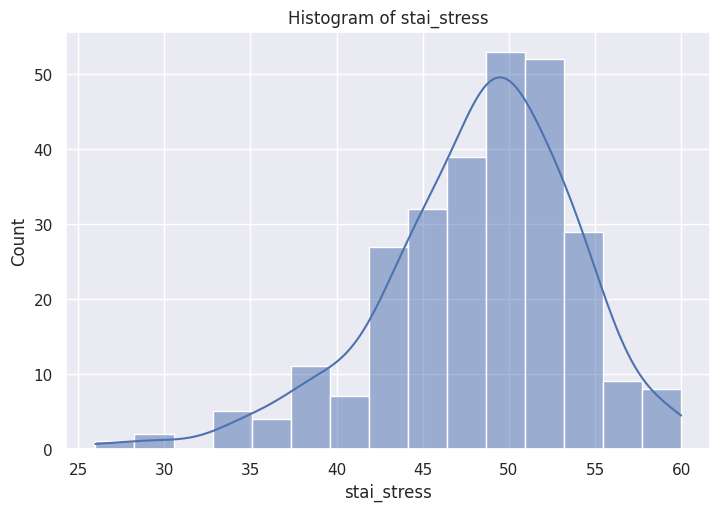

In [ ]:
num_cols = df2.select_dtypes(include=['number']).columns

n_cols = 3
n_rows = int(np.ceil(len(num_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5), constrained_layout=True)
axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    sns.histplot(data=df2, x=col, kde=True, bins=15, ax=ax)
    ax.set_title(f'Histogram of {col}')

for ax in axes[len(num_cols):]:
    fig.delaxes(ax)

plt.show()

###Insight (Daily & STAI)

In [ ]:
id_stai = df2['user_id'].unique().tolist()
id_not_in_stai = []
for i in id_daily:
  if i not in id_stai:
    id_not_in_stai.append(i)
    # print(i)
len(id_not_in_stai)

18

In [ ]:
df2_new = df2.copy()
df2_new.drop(df2_new[df2_new['user_id'].isin(id_not_in_stai)].index, inplace=True)
df2_new

user_id  type  submitdate  stai_stress  \
0    621e2e8e67b776a24055b564  stai  2021-05-31         45.0   
1    621e2e8e67b776a24055b564  stai  2021-06-07         46.0   
2    621e2e8e67b776a24055b564  stai  2021-07-19         46.0   
3    621e2e8e67b776a24055b564  stai  2021-07-26         46.0   
4    621e2e8e67b776a24055b564  stai  2021-06-28         54.0   
..                        ...   ...         ...          ...   
274  621e375b67b776a240290cdc  stai  2021-06-08         60.0   
275  621e375b67b776a240290cdc  stai  2021-07-06         60.0   
276  621e375b67b776a240290cdc  stai  2021-06-01         59.0   
277  621e375b67b776a240290cdc  stai  2021-06-22         60.0   
278  621e375b67b776a240290cdc  stai  2021-07-12         51.0   

    stai_stress_category  
0          Below average  
1                Average  
2                Average  
3                Average  
4          Above average  
..                   ...  
274        Above average  
275        Above average  
276        Above average  
277        Above average  
278        Above average  

[279 rows x 5 columns]

In [ ]:
df2_new['user_id'].value_counts()

user_id
621e2f3967b776a240c654db    9
621e2f7a67b776a240f14425    9
621e329067b776a2402ffad2    9
621e32af67b776a24045b4cf    9
621e30e267b776a240e5bf90    8
621e339967b776a240e502de    8
621e335a67b776a240bb12ff    8
621e341067b776a24037b105    8
621e36f967b776a240e5e7c9    8
621e2fb367b776a24015accd    8
621e2ff067b776a2403eb737    8
621e30c867b776a240d4aa6c    7
621e312a67b776a240164d59    7
621e331067b776a24085dd3f    7
621e324e67b776a2400191cb    7
621e2f6167b776a240e082a9    7
621e366567b776a24076a727    7
621e323667b776a240f19134    6
621e30e467b776a240e817c7    6
621e2fce67b776a240279baa    6
621e2eaf67b776a2406b14ac    6
621e301367b776a24057738e    6
621e33b067b776a240f39e56    6
621e32d967b776a240627414    6
621e367e67b776a24087d75d    6
621e33cf67b776a240087de9    6
621e326767b776a24012e179    6
621e2ed667b776a24085d8d1    5
621e300767b776a2404dc717    5
621e375b67b776a240290cdc    5
621e2e8e67b776a24055b564    5
621e362467b776a2404ad513    5
621e301e67b776a240608a72    5
621e2f9167b776a240011ccb    5
621e34db67b776a240c9c2be    5
621e310d67b776a24003096d    4
621e34f767b776a240de4e1a    4
621e32e667b776a2406d2f1c    4
621e356967b776a24027bd9f    4
621e36c267b776a240ba2756    4
621e2f1b67b776a240b3d87c    3
621e33ed67b776a2401cf5f7    3
621e351a67b776a240f6204b    3
621e346f67b776a24081744f    3
621e314867b776a24029ebf9    2
621e328667b776a240281372    2
621e337667b776a240ce78ab    2
621e375367b776a24021e950    2
621e32d067b776a2405b7d54    1
621e333567b776a240a0c217    1
621e332267b776a24092a584    1
621e333967b776a240a3cd06    1
621e34ec67b776a240d60873    1
Name: count, dtype: int64

In [ ]:
# menghapus user_id duplikat, dengan mengambil nilai variabel lain berdasarkan variabel submitdate yang terbaru
df2_new['submitdate'] = pd.to_datetime(df2_new['submitdate'])
df2_new = df2_new.sort_values(['user_id', 'submitdate'], ascending=[True, False])
df2_latest = df2_new.copy()
df2_latest = df2_new.drop_duplicates(subset='user_id', keep='first').reset_index(drop=True)
df2_latest

user_id  type submitdate  stai_stress  \
0   621e2e8e67b776a24055b564  stai 2021-07-26         46.0   
1   621e2eaf67b776a2406b14ac  stai 2022-01-10         38.0   
2   621e2ed667b776a24085d8d1  stai 2021-07-30         52.0   
3   621e2f1b67b776a240b3d87c  stai 2022-01-04         52.0   
4   621e2f3967b776a240c654db  stai 2021-07-26         50.0   
5   621e2f6167b776a240e082a9  stai 2021-08-02         48.0   
6   621e2f7a67b776a240f14425  stai 2021-07-30         43.0   
7   621e2f9167b776a240011ccb  stai 2022-01-16         59.0   
8   621e2fb367b776a24015accd  stai 2021-07-26         46.0   
9   621e2fce67b776a240279baa  stai 2021-07-26         51.0   
10  621e2ff067b776a2403eb737  stai 2022-01-10         34.0   
11  621e300767b776a2404dc717  stai 2022-01-10         53.0   
12  621e301367b776a24057738e  stai 2021-07-26         52.0   
13  621e301e67b776a240608a72  stai 2021-12-13         55.0   
14  621e30c867b776a240d4aa6c  stai 2021-08-01         50.0   
15  621e30e267b776a240e5bf90  stai 2022-01-10         50.0   
16  621e30e467b776a240e817c7  stai 2021-07-31         50.0   
17  621e310d67b776a24003096d  stai 2022-01-04         49.0   
18  621e312a67b776a240164d59  stai 2022-01-11         56.0   
19  621e314867b776a24029ebf9  stai 2021-06-23         45.0   
20  621e323667b776a240f19134  stai 2022-01-11         51.0   
21  621e324e67b776a2400191cb  stai 2022-01-17         51.0   
22  621e326767b776a24012e179  stai 2021-07-26         53.0   
23  621e328667b776a240281372  stai 2021-09-19         52.0   
24  621e329067b776a2402ffad2  stai 2021-07-26         48.0   
25  621e32af67b776a24045b4cf  stai 2021-07-26         55.0   
26  621e32d067b776a2405b7d54  stai 2021-12-09         50.0   
27  621e32d967b776a240627414  stai 2021-07-12         50.0   
28  621e32e667b776a2406d2f1c  stai 2022-01-25         54.0   
29  621e331067b776a24085dd3f  stai 2022-01-10         50.0   
30  621e332267b776a24092a584  stai 2021-06-02         55.0   
31  621e333567b776a240a0c217  stai 2021-11-23         53.0   
32  621e333967b776a240a3cd06  stai 2021-11-27         49.0   
33  621e335a67b776a240bb12ff  stai 2021-07-29         29.0   
34  621e337667b776a240ce78ab  stai 2021-07-20         38.0   
35  621e339967b776a240e502de  stai 2022-01-12         49.0   
36  621e33b067b776a240f39e56  stai 2021-07-26         48.0   
37  621e33cf67b776a240087de9  stai 2022-01-10         51.0   
38  621e33ed67b776a2401cf5f7  stai 2021-07-12         52.0   
39  621e341067b776a24037b105  stai 2021-07-28         49.0   
40  621e346f67b776a24081744f  stai 2022-01-12         49.0   
41  621e34db67b776a240c9c2be  stai 2021-07-19         51.0   
42  621e34ec67b776a240d60873  stai 2021-06-02         49.0   
43  621e34f767b776a240de4e1a  stai 2021-07-26         40.0   
44  621e351a67b776a240f6204b  stai 2021-08-02         39.0   
45  621e356967b776a24027bd9f  stai 2022-01-10         48.0   
46  621e362467b776a2404ad513  stai 2021-08-01         43.0   
47  621e366567b776a24076a727  stai 2022-01-10         45.0   
48  621e367e67b776a24087d75d  stai 2022-01-17         47.0   
49  621e36c267b776a240ba2756  stai 2021-07-06         47.0   
50  621e36f967b776a240e5e7c9  stai 2021-07-26         48.0   
51  621e375367b776a24021e950  stai 2022-01-02         59.0   
52  621e375b67b776a240290cdc  stai 2021-07-12         51.0   

   stai_stress_category  
0               Average  
1         Below average  
2         Above average  
3         Above average  
4               Average  
5               Average  
6         Below average  
7         Above average  
8               Average  
9         Above average  
10        Below average  
11        Above average  
12        Above average  
13        Above average  
14              Average  
15              Average  
16              Average  
17              Average  
18        Above average  
19        Below average  
20        Above average  
21        Above average  
22        Above average  
23        Above average  
24              Averag

In [ ]:
df2_latest.columns.tolist()

['user_id', 'type', 'submitdate', 'stai_stress', 'stai_stress_category']

In [ ]:
df.rename(columns={'User ID': 'user_id'}, inplace=True)
df2_merged = df2_latest[['user_id', 'type', 'submitdate', 'stai_stress', 'stai_stress_category']].merge(df[['user_id', 'Segment']], on='user_id', how='left')
df2_merged

user_id  type submitdate  stai_stress  \
0   621e2e8e67b776a24055b564  stai 2021-07-26         46.0   
1   621e2eaf67b776a2406b14ac  stai 2022-01-10         38.0   
2   621e2ed667b776a24085d8d1  stai 2021-07-30         52.0   
3   621e2f1b67b776a240b3d87c  stai 2022-01-04         52.0   
4   621e2f3967b776a240c654db  stai 2021-07-26         50.0   
5   621e2f6167b776a240e082a9  stai 2021-08-02         48.0   
6   621e2f7a67b776a240f14425  stai 2021-07-30         43.0   
7   621e2f9167b776a240011ccb  stai 2022-01-16         59.0   
8   621e2fb367b776a24015accd  stai 2021-07-26         46.0   
9   621e2fce67b776a240279baa  stai 2021-07-26         51.0   
10  621e2ff067b776a2403eb737  stai 2022-01-10         34.0   
11  621e300767b776a2404dc717  stai 2022-01-10         53.0   
12  621e301367b776a24057738e  stai 2021-07-26         52.0   
13  621e301e67b776a240608a72  stai 2021-12-13         55.0   
14  621e30c867b776a240d4aa6c  stai 2021-08-01         50.0   
15  621e30e267b776a240e5bf90  stai 2022-01-10         50.0   
16  621e30e467b776a240e817c7  stai 2021-07-31         50.0   
17  621e310d67b776a24003096d  stai 2022-01-04         49.0   
18  621e312a67b776a240164d59  stai 2022-01-11         56.0   
19  621e314867b776a24029ebf9  stai 2021-06-23         45.0   
20  621e323667b776a240f19134  stai 2022-01-11         51.0   
21  621e324e67b776a2400191cb  stai 2022-01-17         51.0   
22  621e326767b776a24012e179  stai 2021-07-26         53.0   
23  621e328667b776a240281372  stai 2021-09-19         52.0   
24  621e329067b776a2402ffad2  stai 2021-07-26         48.0   
25  621e32af67b776a24045b4cf  stai 2021-07-26         55.0   
26  621e32d067b776a2405b7d54  stai 2021-12-09         50.0   
27  621e32d967b776a240627414  stai 2021-07-12         50.0   
28  621e32e667b776a2406d2f1c  stai 2022-01-25         54.0   
29  621e331067b776a24085dd3f  stai 2022-01-10         50.0   
30  621e332267b776a24092a584  stai 2021-06-02         55.0   
31  621e333567b776a240a0c217  stai 2021-11-23         53.0   
32  621e333967b776a240a3cd06  stai 2021-11-27         49.0   
33  621e335a67b776a240bb12ff  stai 2021-07-29         29.0   
34  621e337667b776a240ce78ab  stai 2021-07-20         38.0   
35  621e339967b776a240e502de  stai 2022-01-12         49.0   
36  621e33b067b776a240f39e56  stai 2021-07-26         48.0   
37  621e33cf67b776a240087de9  stai 2022-01-10         51.0   
38  621e33ed67b776a2401cf5f7  stai 2021-07-12         52.0   
39  621e341067b776a24037b105  stai 2021-07-28         49.0   
40  621e346f67b776a24081744f  stai 2022-01-12         49.0   
41  621e34db67b776a240c9c2be  stai 2021-07-19         51.0   
42  621e34ec67b776a240d60873  stai 2021-06-02         49.0   
43  621e34f767b776a240de4e1a  stai 2021-07-26         40.0   
44  621e351a67b776a240f6204b  stai 2021-08-02         39.0   
45  621e356967b776a24027bd9f  stai 2022-01-10         48.0   
46  621e362467b776a2404ad513  stai 2021-08-01         43.0   
47  621e366567b776a24076a727  stai 2022-01-10         45.0   
48  621e367e67b776a24087d75d  stai 2022-01-17         47.0   
49  621e36c267b776a240ba2756  stai 2021-07-06         47.0   
50  621e36f967b776a240e5e7c9  stai 2021-07-26         48.0   
51  621e375367b776a24021e950  stai 2022-01-02         59.0   
52  621e375b67b776a240290cdc  stai 2021-07-12         51.0   

   stai_stress_category                   Segment  
0               Average             Aktif & Sehat  
1         Below average             Aktif & Sehat  
2         Above average             Aktif & Sehat  
3         Above average             Aktif & Sehat  
4               Average              Kurang Gerak  
5               Average              Kurang Gerak  
6         Below average              Kurang Gerak  
7         Above average             Aktif & Sehat  
8               Average             Aktif & Sehat  
9         Above average             Aktif & Sehat  
10        Below average             Aktif & Sehat  
11        Above average  Stres / Kurang Istiraha

In [ ]:
df2_merged['type'].unique().tolist()

['stai']

Segment               Aktif & Sehat  Kurang Gerak  Stres / Kurang Istirahat
stai_stress_category                                                       
Above average             52.380952     28.571429                 19.047619
Average                   59.090909     18.181818                 22.727273
Below average             70.000000     20.000000                 10.000000


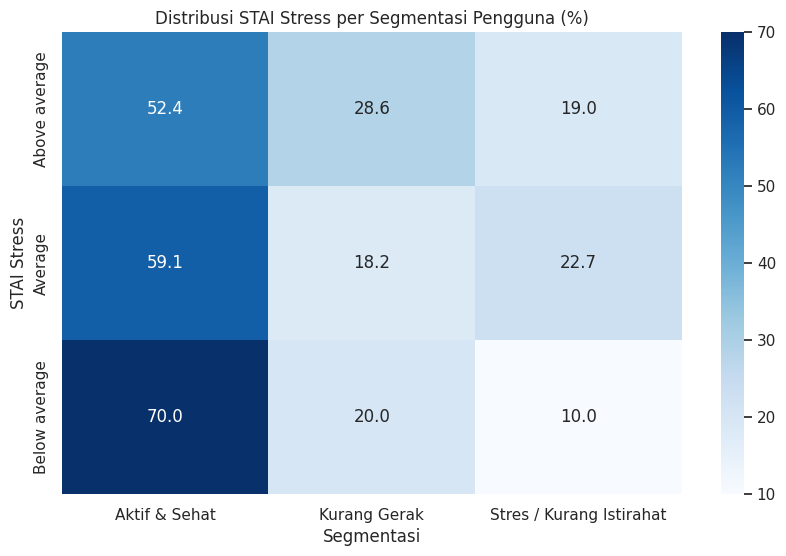

In [ ]:
ct = pd.crosstab(df2_merged['stai_stress_category'], df2_merged['Segment'], normalize='index') * 100
print(ct)

# Visualisasi heatmap
plt.figure(figsize=(10,6))
sns.heatmap(ct, annot=True, fmt=".1f", cmap="Blues")
plt.title("Distribusi STAI Stress per Segmentasi Pengguna (%)")
plt.ylabel("STAI Stress")
plt.xlabel("Segmentasi")
plt.show()

<ipython-input-279-6927f39fec8a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df2_merged, x='Segment', y='stai_stress', palette="Set2")


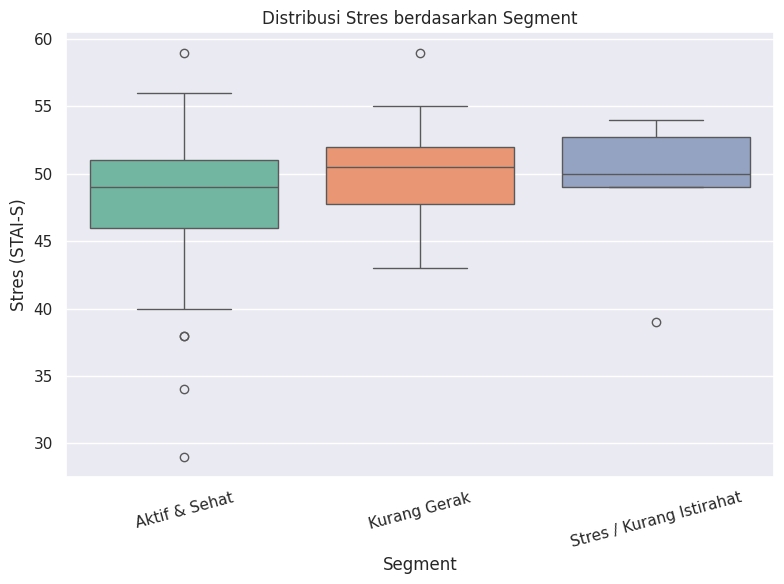

In [ ]:
#boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df2_merged, x='Segment', y='stai_stress', palette="Set2")
plt.title("Distribusi Stres berdasarkan Segment")
plt.xlabel("Segment")
plt.ylabel("Stres (STAI-S)")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

## Personality

Diukur berdasarkan  BFPT (Big Five Personality Traits)

### EDA

In [ ]:
data_personality = pd.read_csv('/content/drive/MyDrive/Dataset Datmin/personality.csv')
df3 = data_personality.copy()

In [ ]:
df3

Unnamed: 0                   user_id  type  submitdate  extraversion  \
0            0  621e2e8e67b776a24055b564  bfpt  2021-05-31          21.0   
1            1  621e2eaf67b776a2406b14ac  bfpt  2021-11-29          32.0   
2            2  621e2ed667b776a24085d8d1  bfpt  2021-06-07          40.0   
3            3  621e2f3967b776a240c654db  bfpt  2021-05-31          25.0   
4            4  621e2f6167b776a240e082a9  bfpt  2021-06-01          41.0   
5            5  621e2f7a67b776a240f14425  bfpt  2021-05-31          29.0   
6            6  621e2f9167b776a240011ccb  bfpt  2021-11-28          21.0   
7            7  621e2fb367b776a24015accd  bfpt  2021-05-31          37.0   
8            8  621e2fce67b776a240279baa  bfpt  2021-05-31          34.0   
9            9  621e2ff067b776a2403eb737  bfpt  2021-11-29          33.0   
10          10  621e301367b776a24057738e  bfpt  2021-06-01          26.0   
11          11  621e301e67b776a240608a72  bfpt  2021-05-31          35.0   
12          12  621e30c867b776a240d4aa6c  bfpt  2021-06-04          34.0   
13          13  621e30e267b776a240e5bf90  bfpt  2021-11-23          38.0   
14          14  621e30e467b776a240e817c7  bfpt  2021-06-06          34.0   
15          15  621e30f467b776a240f22944  bfpt  2021-11-29          28.0   
16          16  621e310d67b776a24003096d  bfpt  2021-12-03          43.0   
17          17  621e312a67b776a240164d59  bfpt  2021-11-22          25.0   
18          18  621e314867b776a24029ebf9  bfpt  2021-05-31          20.0   
19          19  621e323667b776a240f19134  bfpt  2021-11-23          39.0   
20          20  621e324e67b776a2400191cb  bfpt  2021-11-27          32.0   
21          21  621e328667b776a240281372  bfpt  2021-05-31          37.0   
22          22  621e329067b776a2402ffad2  bfpt  2021-05-31          29.0   
23          23  621e32af67b776a24045b4cf  bfpt  2021-05-31          18.0   
24          24  621e32d067b776a2405b7d54  bfpt  2021-12-09          21.0   
25          25  621e32d967b776a240627414  bfpt  2021-05-31          34.0   
26          26  621e331067b776a24085dd3f  bfpt  2021-11-23          19.0   
27          27  621e332267b776a24092a584  bfpt  2021-06-02          22.0   
28          28  621e333567b776a240a0c217  bfpt  2021-11-23          30.0   
29          29  621e333967b776a240a3cd06  bfpt  2021-11-27          22.0   
30          30  621e335a67b776a240bb12ff  bfpt  2021-05-31          21.0   
31          31  621e337667b776a240ce78ab  bfpt  2021-06-07          22.0   
32          32  621e339967b776a240e502de  bfpt  2021-11-22          35.0   
33          34  621e33b067b776a240f39e56  bfpt  2021-06-08          45.0   
34          35  621e33cf67b776a240087de9  bfpt  2021-11-24          16.0   
35          36  621e33ed67b776a2401cf5f7  bfpt  2021-06-03          39.0   
36          37  621e341067b776a24037b105  bfpt  2021-05-31          19.0   
37          38  621e346f67b776a24081744f  bfpt  2021-11-24          35.0   
38          39  621e34db67b776a240c9c2be  bfpt  2021-05-31          28.0   
39          40  621e34ec67b776a240d60873  bfpt  2021-06-02          31.0   
40          41  621e34f767b776a240de4e1a  bfpt  2021-06-07          40.0   
41          42  621e356967b776a24027bd9f  bfpt  2021-11-24          26.0   
42          43  621e362467b776a2404ad513  bfpt  2021-06-02          19.0   
43          45  621e366567b776a24076a727  bfpt  2021-11-22          30.0   
44          46  621e367e67b776a24087d75d  bfpt  2021-11-24          13.0   
45          47  621e36bb67b776a240b40d64  bfpt  2021-06-02          41.0   
46          48  621e36c267b776a240ba2756  bfpt  2021-05-31          39.0   
47          49  621e36dd67b776a240ce9a45  bfpt  2021-07-21          33.0   
48          50  621e36f967b776a240e5e7c9  bfpt  2021-05-31          42.0   
49          52  621e375b67b776a240290cdc  bfpt  2021-06-01          34.0   

    agreeableness  conscientiousness  stability  intellect  gender  \
0            33.0               45.0       42.0       40.

In [ ]:
df3.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df3

user_id  type  submitdate  extraversion  agreeableness  \
0   621e2e8e67b776a24055b564  bfpt  2021-05-31          21.0           33.0   
1   621e2eaf67b776a2406b14ac  bfpt  2021-11-29          32.0           45.0   
2   621e2ed667b776a24085d8d1  bfpt  2021-06-07          40.0           43.0   
3   621e2f3967b776a240c654db  bfpt  2021-05-31          25.0           34.0   
4   621e2f6167b776a240e082a9  bfpt  2021-06-01          41.0           41.0   
5   621e2f7a67b776a240f14425  bfpt  2021-05-31          29.0           38.0   
6   621e2f9167b776a240011ccb  bfpt  2021-11-28          21.0           45.0   
7   621e2fb367b776a24015accd  bfpt  2021-05-31          37.0           36.0   
8   621e2fce67b776a240279baa  bfpt  2021-05-31          34.0           42.0   
9   621e2ff067b776a2403eb737  bfpt  2021-11-29          33.0           44.0   
10  621e301367b776a24057738e  bfpt  2021-06-01          26.0           36.0   
11  621e301e67b776a240608a72  bfpt  2021-05-31          35.0           44.0   
12  621e30c867b776a240d4aa6c  bfpt  2021-06-04          34.0           40.0   
13  621e30e267b776a240e5bf90  bfpt  2021-11-23          38.0           42.0   
14  621e30e467b776a240e817c7  bfpt  2021-06-06          34.0           20.0   
15  621e30f467b776a240f22944  bfpt  2021-11-29          28.0           40.0   
16  621e310d67b776a24003096d  bfpt  2021-12-03          43.0           48.0   
17  621e312a67b776a240164d59  bfpt  2021-11-22          25.0           33.0   
18  621e314867b776a24029ebf9  bfpt  2021-05-31          20.0           40.0   
19  621e323667b776a240f19134  bfpt  2021-11-23          39.0           44.0   
20  621e324e67b776a2400191cb  bfpt  2021-11-27          32.0           39.0   
21  621e328667b776a240281372  bfpt  2021-05-31          37.0           39.0   
22  621e329067b776a2402ffad2  bfpt  2021-05-31          29.0           47.0   
23  621e32af67b776a24045b4cf  bfpt  2021-05-31          18.0           36.0   
24  621e32d067b776a2405b7d54  bfpt  2021-12-09          21.0           36.0   
25  621e32d967b776a240627414  bfpt  2021-05-31          34.0           34.0   
26  621e331067b776a24085dd3f  bfpt  2021-11-23          19.0           40.0   
27  621e332267b776a24092a584  bfpt  2021-06-02          22.0           32.0   
28  621e333567b776a240a0c217  bfpt  2021-11-23          30.0           41.0   
29  621e333967b776a240a3cd06  bfpt  2021-11-27          22.0           37.0   
30  621e335a67b776a240bb12ff  bfpt  2021-05-31          21.0           29.0   
31  621e337667b776a240ce78ab  bfpt  2021-06-07          22.0           30.0   
32  621e339967b776a240e502de  bfpt  2021-11-22          35.0           45.0   
33  621e33b067b776a240f39e56  bfpt  2021-06-08          45.0           49.0   
34  621e33cf67b776a240087de9  bfpt  2021-11-24          16.0           31.0   
35  621e33ed67b776a2401cf5f7  bfpt  2021-06-03          39.0           48.0   
36  621e341067b776a24037b105  bfpt  2021-05-31          19.0           30.0   
37  621e346f67b776a24081744f  bfpt  2021-11-24          35.0           44.0   
38  621e34db67b776a240c9c2be  bfpt  2021-05-31          28.0           45.0   
39  621e34ec67b776a240d60873  bfpt  2021-06-02          31.0           29.0   
40  621e34f767b776a240de4e1a  bfpt  2021-06-07          40.0           42.0   
41  621e356967b776a24027bd9f  bfpt  2021-11-24          26.0           38.0   
42  621e362467b776a2404ad513  bfpt  2021-06-02          19.0           36.0   
43  621e366567b776a24076a727  bfpt  2021-11-22          30.0           36.0   
44  621e367e67b776a24087d75d  bfpt  2021-11-24          13.0           26.0   
45  621e36bb67b776a240b40d64  bfpt  2021-06-02          41.0           29.0   
46  621e36c267b776a240ba2756  bfpt  2021-05-31          39.0           36.0   
47  621e36dd67b776a240ce9a45  bfpt  2021-07-21          33.0           34.0   
48  621e36f967b776a240e5e7c9  bfpt  2021-05-31          42.0           42.0   
49  621e375b67b776a240290cdc  bfpt  2021-06-01          34.0           

Deskripsi fitur dataset

| Kolom                             | Penjelasan                                                                                         |
|-----------------------------------|-----------------------------------------------------------------------------------------------------|
| user_id                           | ID anonim pengguna yang mengisi form BFPT.                                                         |
| type                              | Jenis form atau kuisioner, dalam hal ini `bfpt` merujuk pada Big Five Personality Traits.          |
| submitdate                        | Tanggal saat pengguna mengisi kuisioner.                                                           |
| extraversion                      | Skor kepribadian terkait sikap sosial, energik, dan senang berinteraksi dengan orang lain.         |
| agreeableness                     | Skor terkait sifat ramah, kooperatif, dan peduli terhadap orang lain.                              |
| conscientiousness                | Skor tentang tingkat disiplin, tanggung jawab, dan keteraturan seseorang.                          |
| stability                         | (Nama lain dari *Neuroticism inverse*) — skor kestabilan emosi, semakin tinggi berarti lebih stabil.|
| intellect                         | Skor yang merepresentasikan keterbukaan terhadap pengalaman dan pemikiran baru (*openness*).       |
| gender                            | Jenis kelamin pengguna (MALE atau FEMALE).                                                         |
| ipip_extraversion_category        | Kategori tingkat extraversion: LOW, AVERAGE, atau HIGH.                                            |
| ipip_agreeableness_category       | Kategori tingkat agreeableness: LOW, AVERAGE, atau HIGH.                                           |
| ipip_conscientiousness_category   | Kategori tingkat conscientiousness: LOW, AVERAGE, atau HIGH.                                       |
| ipip_stability_category           | Kategori tingkat emotional stability: LOW, AVERAGE, atau HIGH.                                     |
| ipip_intellect_category           | Kategori tingkat keterbukaan terhadap pengalaman: LOW, AVERAGE, atau HIGH.                         |


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   user_id                          50 non-null     object 
 1   type                             50 non-null     object 
 2   submitdate                       50 non-null     object 
 3   extraversion                     50 non-null     float64
 4   agreeableness                    50 non-null     float64
 5   conscientiousness                50 non-null     float64
 6   stability                        50 non-null     float64
 7   intellect                        50 non-null     float64
 8   gender                           50 non-null     object 
 9   ipip_extraversion_category       50 non-null     object 
 10  ipip_agreeableness_category      50 non-null     object 
 11  ipip_conscientiousness_category  50 non-null     object 
 12  ipip_stability_category 

In [ ]:
df3.duplicated().sum()

np.int64(0)

In [ ]:
df3.isna().sum()

user_id                            0
type                               0
submitdate                         0
extraversion                       0
agreeableness                      0
conscientiousness                  0
stability                          0
intellect                          0
gender                             0
ipip_extraversion_category         0
ipip_agreeableness_category        0
ipip_conscientiousness_category    0
ipip_stability_category            0
ipip_intellect_category            0
dtype: int64

**Visualizing amounts**

<ipython-input-287-da36b3346ba8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df3, x=col, ax=ax, edgecolor='black', palette='pastel')
<ipython-input-287-da36b3346ba8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df3, x=col, ax=ax, edgecolor='black', palette='pastel')
<ipython-input-287-da36b3346ba8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df3, x=col, ax=ax, edgecolor='black', palette='pastel')
<ipython-input-287-da36b3346ba8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated

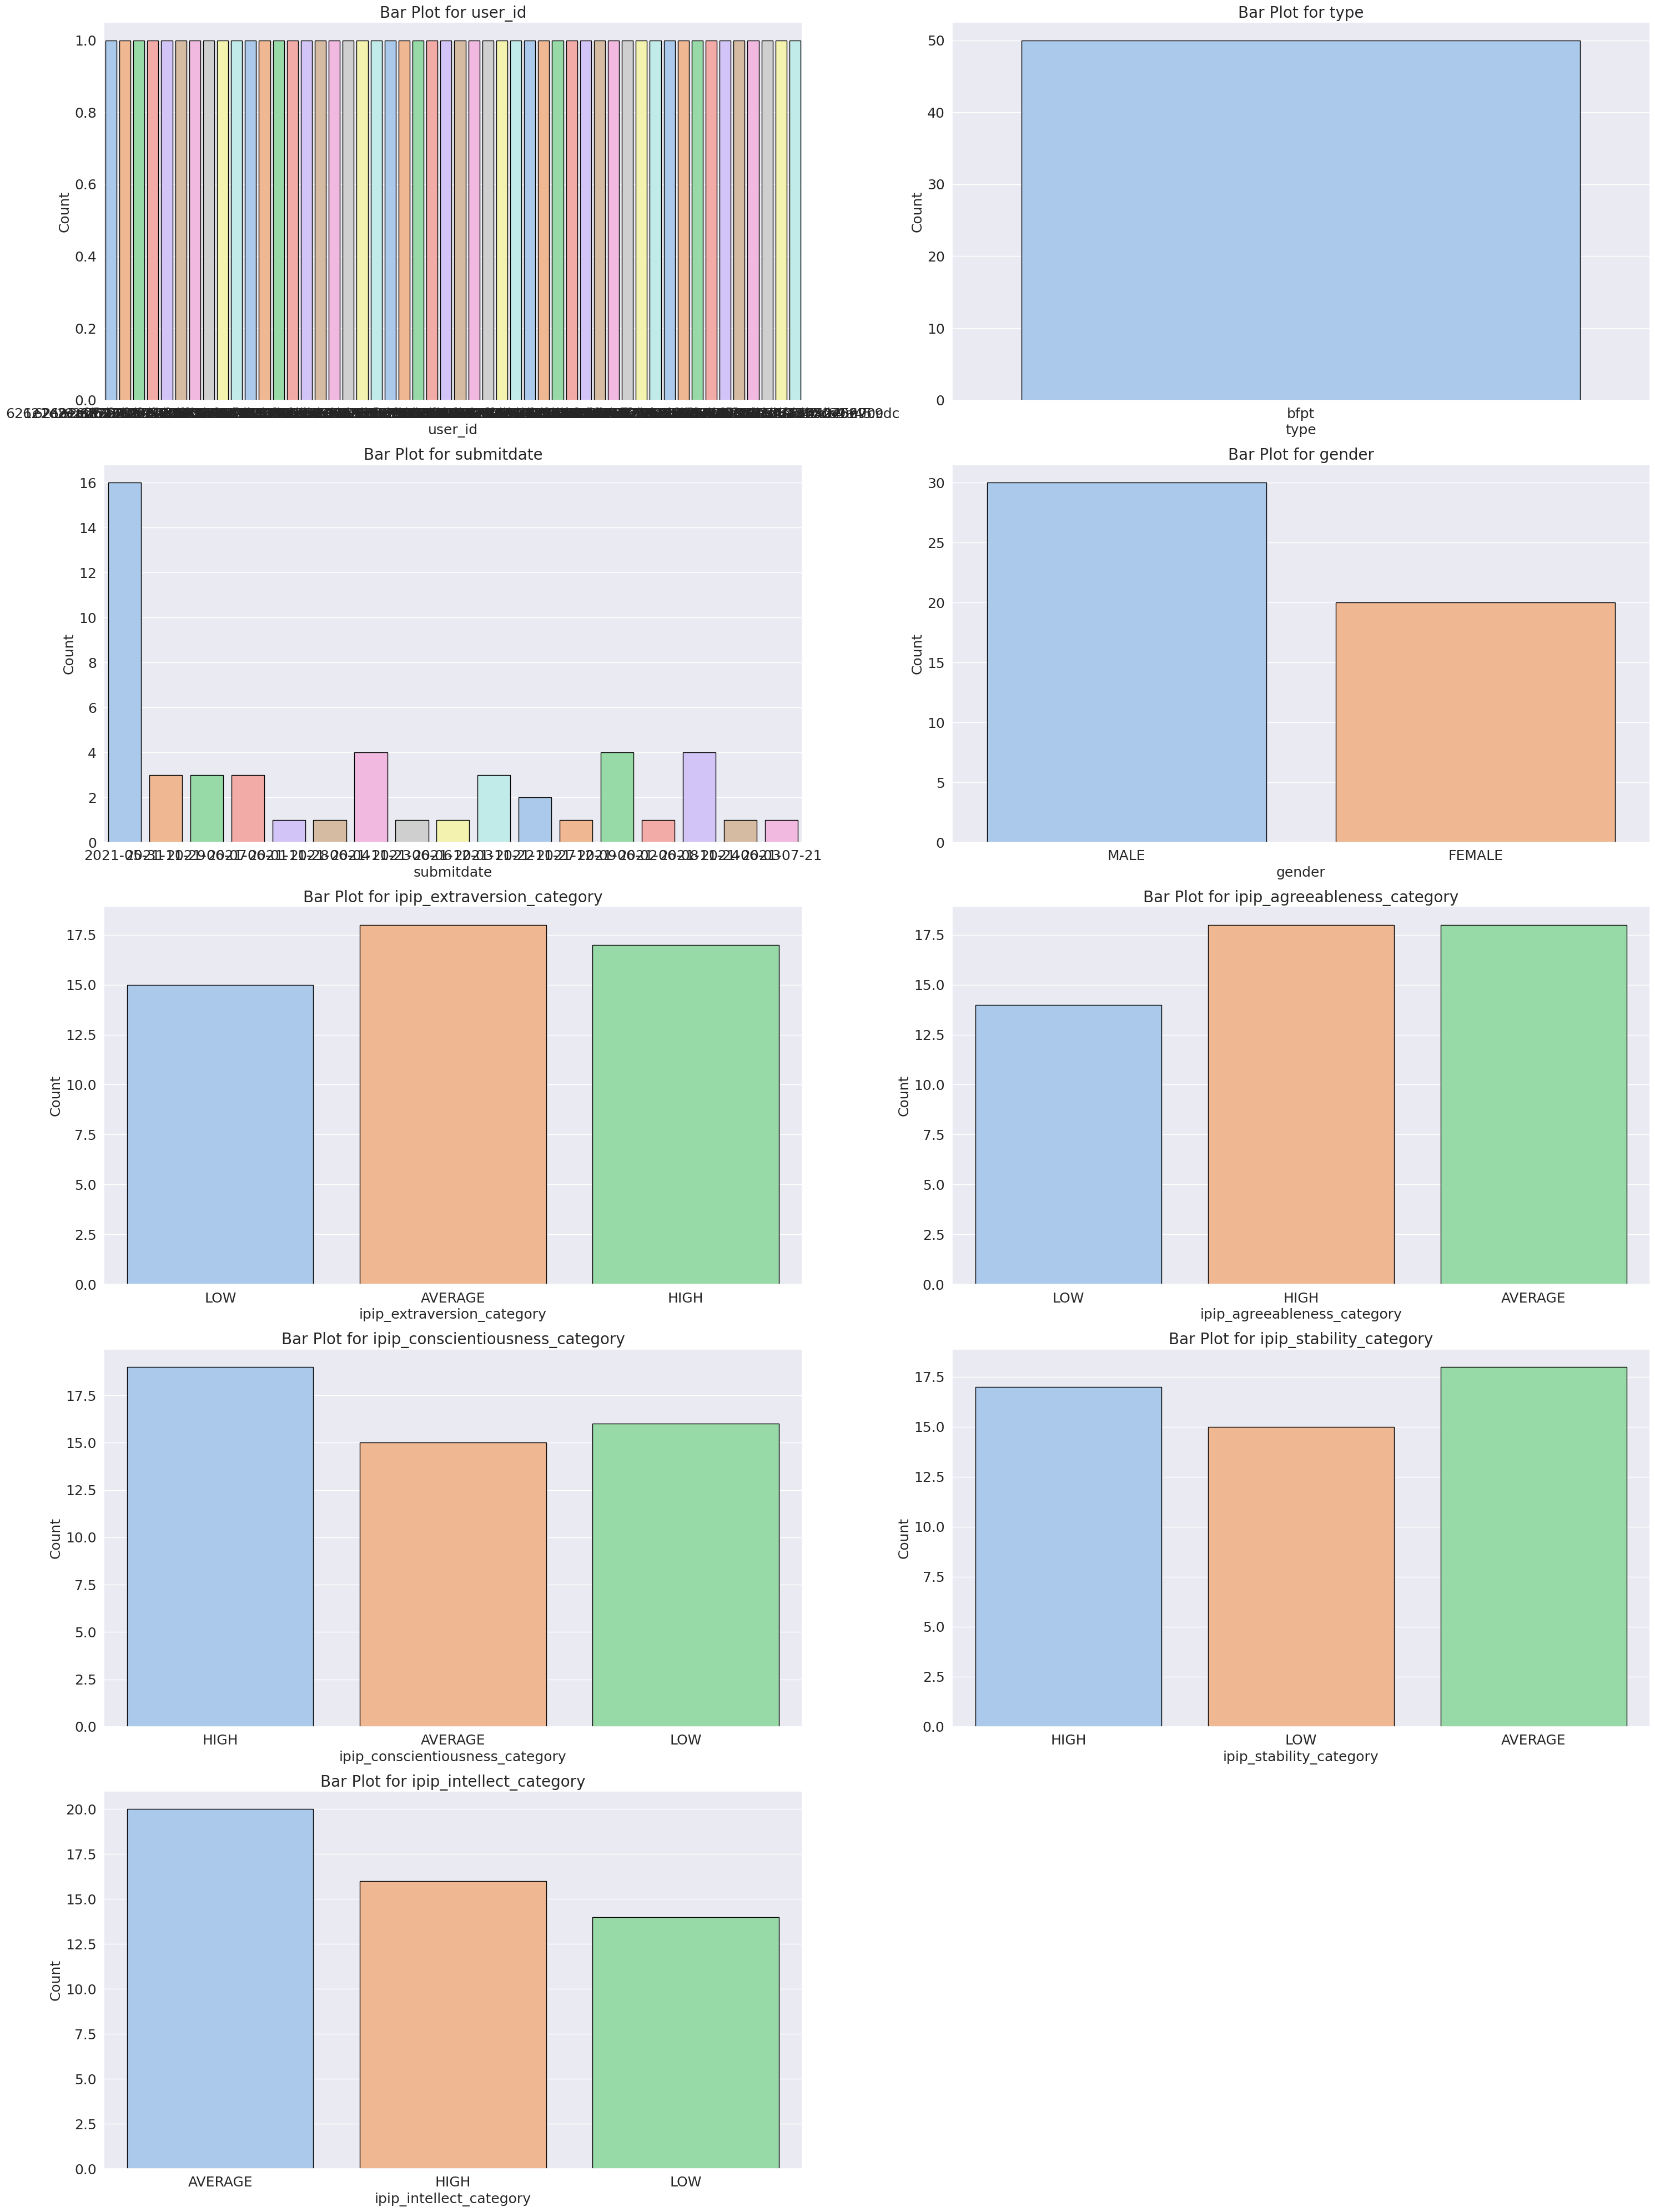

In [ ]:
col_category = df3.select_dtypes(include=['object']).columns

ncols = 2
nrows = (len(col_category) + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, nrows * 8))
axes = axes.flatten()

for ax, col in zip(axes, col_category):
    sns.countplot(data=df3, x=col, ax=ax, edgecolor='black', palette='pastel')
    ax.set_title(f"Bar Plot for {col}", fontsize=20)
    ax.set_xlabel(col, fontsize=18)
    ax.set_ylabel("Count", fontsize=18)

    ax.tick_params(axis='x', labelsize=18)
    ax.tick_params(axis='y', labelsize=18)

for i in range(len(col_category), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

**Visualizing distribution**

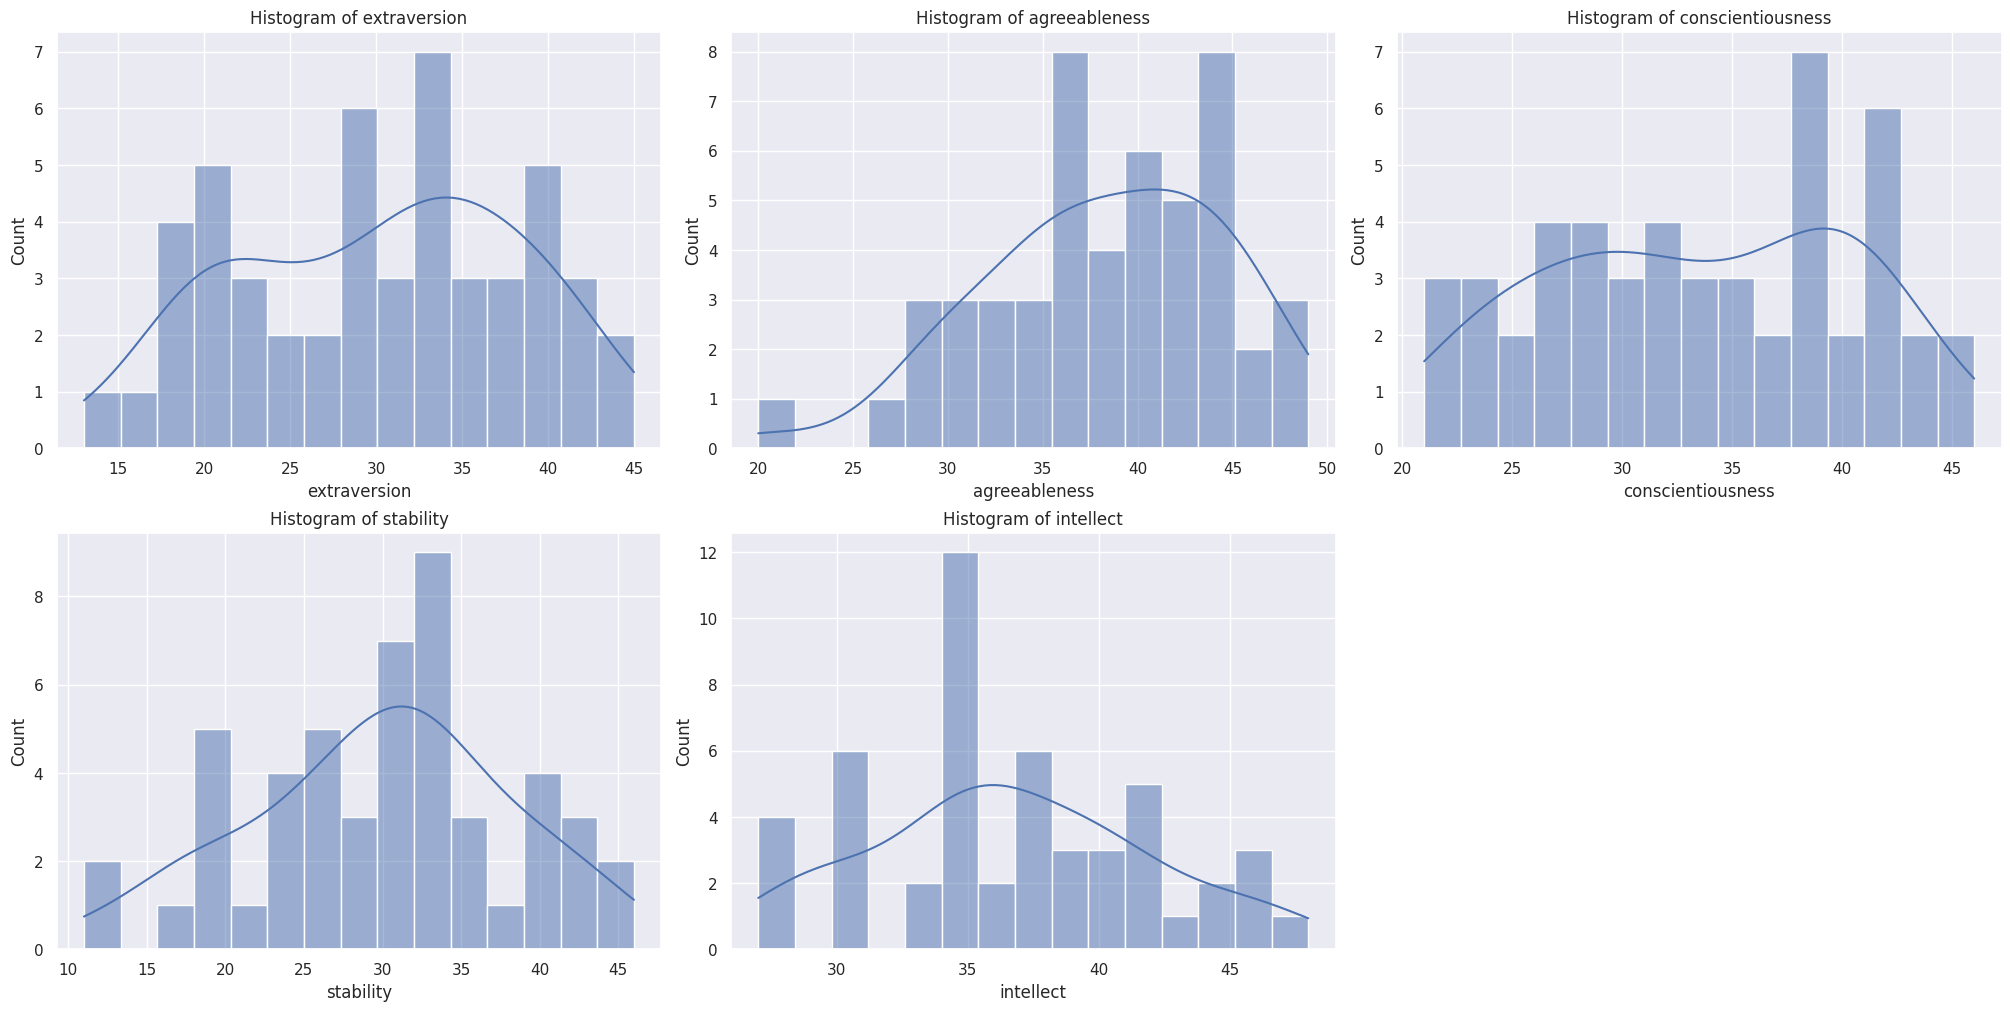

In [ ]:
num_cols = df3.select_dtypes(include=['number']).columns

n_cols = 3
n_rows = int(np.ceil(len(num_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5), constrained_layout=True)
axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    sns.histplot(data=df3, x=col, kde=True, bins=15, ax=ax)
    ax.set_title(f'Histogram of {col}')

for ax in axes[len(num_cols):]:
    fig.delaxes(ax)

plt.show()

**Visualizing association**

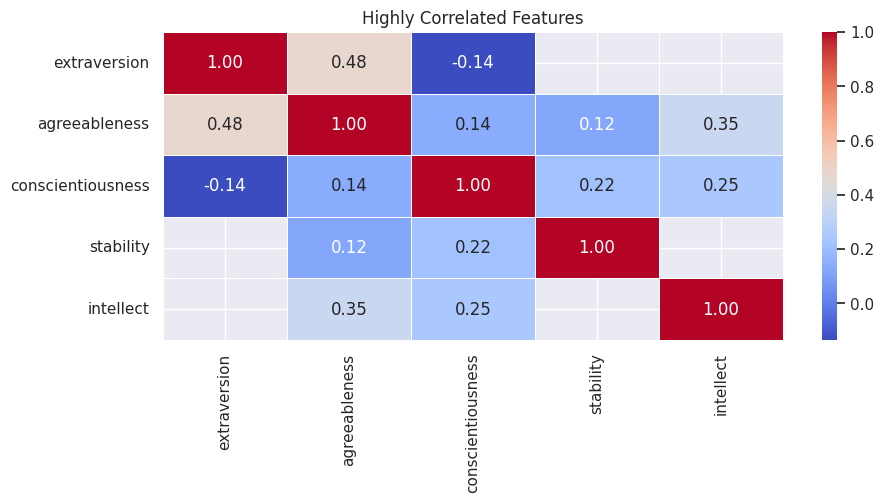

In [ ]:
corr = df3.select_dtypes(include=['float64', 'int64']).corr()

threshold = 0.1
mask = np.abs(corr) < threshold

plt.figure(figsize=(10, 4))
sns.heatmap(corr, annot=True, fmt=".2f", mask=mask, cmap="coolwarm", linewidths=0.5)
plt.title("Highly Correlated Features")
plt.show()

### Insight (Daily & Personality)

In [ ]:
id_pers = df3['user_id'].unique().tolist()
id_not_in_pers = []
for i in id_daily:
  if i not in id_pers:
    id_not_in_pers.append(i)
    # print(i)
len(id_not_in_pers)

21

In [ ]:
df3_new = df3.copy()
df3_new.drop(df3_new[df3_new['user_id'].isin(id_not_in_pers)].index, inplace=True)
df3_new

user_id  type  submitdate  extraversion  agreeableness  \
0   621e2e8e67b776a24055b564  bfpt  2021-05-31          21.0           33.0   
1   621e2eaf67b776a2406b14ac  bfpt  2021-11-29          32.0           45.0   
2   621e2ed667b776a24085d8d1  bfpt  2021-06-07          40.0           43.0   
3   621e2f3967b776a240c654db  bfpt  2021-05-31          25.0           34.0   
4   621e2f6167b776a240e082a9  bfpt  2021-06-01          41.0           41.0   
5   621e2f7a67b776a240f14425  bfpt  2021-05-31          29.0           38.0   
6   621e2f9167b776a240011ccb  bfpt  2021-11-28          21.0           45.0   
7   621e2fb367b776a24015accd  bfpt  2021-05-31          37.0           36.0   
8   621e2fce67b776a240279baa  bfpt  2021-05-31          34.0           42.0   
9   621e2ff067b776a2403eb737  bfpt  2021-11-29          33.0           44.0   
10  621e301367b776a24057738e  bfpt  2021-06-01          26.0           36.0   
11  621e301e67b776a240608a72  bfpt  2021-05-31          35.0           44.0   
12  621e30c867b776a240d4aa6c  bfpt  2021-06-04          34.0           40.0   
13  621e30e267b776a240e5bf90  bfpt  2021-11-23          38.0           42.0   
14  621e30e467b776a240e817c7  bfpt  2021-06-06          34.0           20.0   
15  621e30f467b776a240f22944  bfpt  2021-11-29          28.0           40.0   
16  621e310d67b776a24003096d  bfpt  2021-12-03          43.0           48.0   
17  621e312a67b776a240164d59  bfpt  2021-11-22          25.0           33.0   
18  621e314867b776a24029ebf9  bfpt  2021-05-31          20.0           40.0   
19  621e323667b776a240f19134  bfpt  2021-11-23          39.0           44.0   
20  621e324e67b776a2400191cb  bfpt  2021-11-27          32.0           39.0   
21  621e328667b776a240281372  bfpt  2021-05-31          37.0           39.0   
22  621e329067b776a2402ffad2  bfpt  2021-05-31          29.0           47.0   
23  621e32af67b776a24045b4cf  bfpt  2021-05-31          18.0           36.0   
24  621e32d067b776a2405b7d54  bfpt  2021-12-09          21.0           36.0   
25  621e32d967b776a240627414  bfpt  2021-05-31          34.0           34.0   
26  621e331067b776a24085dd3f  bfpt  2021-11-23          19.0           40.0   
27  621e332267b776a24092a584  bfpt  2021-06-02          22.0           32.0   
28  621e333567b776a240a0c217  bfpt  2021-11-23          30.0           41.0   
29  621e333967b776a240a3cd06  bfpt  2021-11-27          22.0           37.0   
30  621e335a67b776a240bb12ff  bfpt  2021-05-31          21.0           29.0   
31  621e337667b776a240ce78ab  bfpt  2021-06-07          22.0           30.0   
32  621e339967b776a240e502de  bfpt  2021-11-22          35.0           45.0   
33  621e33b067b776a240f39e56  bfpt  2021-06-08          45.0           49.0   
34  621e33cf67b776a240087de9  bfpt  2021-11-24          16.0           31.0   
35  621e33ed67b776a2401cf5f7  bfpt  2021-06-03          39.0           48.0   
36  621e341067b776a24037b105  bfpt  2021-05-31          19.0           30.0   
37  621e346f67b776a24081744f  bfpt  2021-11-24          35.0           44.0   
38  621e34db67b776a240c9c2be  bfpt  2021-05-31          28.0           45.0   
39  621e34ec67b776a240d60873  bfpt  2021-06-02          31.0           29.0   
40  621e34f767b776a240de4e1a  bfpt  2021-06-07          40.0           42.0   
41  621e356967b776a24027bd9f  bfpt  2021-11-24          26.0           38.0   
42  621e362467b776a2404ad513  bfpt  2021-06-02          19.0           36.0   
43  621e366567b776a24076a727  bfpt  2021-11-22          30.0           36.0   
44  621e367e67b776a24087d75d  bfpt  2021-11-24          13.0           26.0   
45  621e36bb67b776a240b40d64  bfpt  2021-06-02          41.0           29.0   
46  621e36c267b776a240ba2756  bfpt  2021-05-31          39.0           36.0   
47  621e36dd67b776a240ce9a45  bfpt  2021-07-21          33.0           34.0   
48  621e36f967b776a240e5e7c9  bfpt  2021-05-31          42.0           42.0   
49  621e375b67b776a240290cdc  bfpt  2021-06-01          34.0           

In [ ]:
#cek nilai duplikat
df3_new['user_id'].value_counts()

user_id
621e2e8e67b776a24055b564    1
621e2eaf67b776a2406b14ac    1
621e2ed667b776a24085d8d1    1
621e2f3967b776a240c654db    1
621e2f6167b776a240e082a9    1
621e2f7a67b776a240f14425    1
621e2f9167b776a240011ccb    1
621e2fb367b776a24015accd    1
621e2fce67b776a240279baa    1
621e2ff067b776a2403eb737    1
621e301367b776a24057738e    1
621e301e67b776a240608a72    1
621e30c867b776a240d4aa6c    1
621e30e267b776a240e5bf90    1
621e30e467b776a240e817c7    1
621e30f467b776a240f22944    1
621e310d67b776a24003096d    1
621e312a67b776a240164d59    1
621e314867b776a24029ebf9    1
621e323667b776a240f19134    1
621e324e67b776a2400191cb    1
621e328667b776a240281372    1
621e329067b776a2402ffad2    1
621e32af67b776a24045b4cf    1
621e32d067b776a2405b7d54    1
621e32d967b776a240627414    1
621e331067b776a24085dd3f    1
621e332267b776a24092a584    1
621e333567b776a240a0c217    1
621e333967b776a240a3cd06    1
621e335a67b776a240bb12ff    1
621e337667b776a240ce78ab    1
621e339967b776a240e502de    1
621e33b067b776a240f39e56    1
621e33cf67b776a240087de9    1
621e33ed67b776a2401cf5f7    1
621e341067b776a24037b105    1
621e346f67b776a24081744f    1
621e34db67b776a240c9c2be    1
621e34ec67b776a240d60873    1
621e34f767b776a240de4e1a    1
621e356967b776a24027bd9f    1
621e362467b776a2404ad513    1
621e366567b776a24076a727    1
621e367e67b776a24087d75d    1
621e36bb67b776a240b40d64    1
621e36c267b776a240ba2756    1
621e36dd67b776a240ce9a45    1
621e36f967b776a240e5e7c9    1
621e375b67b776a240290cdc    1
Name: count, dtype: int64

In [ ]:
df3_new.columns.tolist()

['user_id',
 'type',
 'submitdate',
 'extraversion',
 'agreeableness',
 'conscientiousness',
 'stability',
 'intellect',
 'gender',
 'ipip_extraversion_category',
 'ipip_agreeableness_category',
 'ipip_conscientiousness_category',
 'ipip_stability_category',
 'ipip_intellect_category']

In [ ]:
df.rename(columns={'User ID': 'user_id'}, inplace=True)
df3_merged = df3_new[['user_id', 'type',
 'submitdate',
 'extraversion',
 'agreeableness',
 'conscientiousness',
 'stability',
 'intellect',
 'gender',
 'ipip_extraversion_category',
 'ipip_agreeableness_category',
 'ipip_conscientiousness_category',
 'ipip_stability_category',
 'ipip_intellect_category']].merge(df[['user_id', 'Segment']], on='user_id', how='left')
df3_merged

user_id  type  submitdate  extraversion  agreeableness  \
0   621e2e8e67b776a24055b564  bfpt  2021-05-31          21.0           33.0   
1   621e2eaf67b776a2406b14ac  bfpt  2021-11-29          32.0           45.0   
2   621e2ed667b776a24085d8d1  bfpt  2021-06-07          40.0           43.0   
3   621e2f3967b776a240c654db  bfpt  2021-05-31          25.0           34.0   
4   621e2f6167b776a240e082a9  bfpt  2021-06-01          41.0           41.0   
5   621e2f7a67b776a240f14425  bfpt  2021-05-31          29.0           38.0   
6   621e2f9167b776a240011ccb  bfpt  2021-11-28          21.0           45.0   
7   621e2fb367b776a24015accd  bfpt  2021-05-31          37.0           36.0   
8   621e2fce67b776a240279baa  bfpt  2021-05-31          34.0           42.0   
9   621e2ff067b776a2403eb737  bfpt  2021-11-29          33.0           44.0   
10  621e301367b776a24057738e  bfpt  2021-06-01          26.0           36.0   
11  621e301e67b776a240608a72  bfpt  2021-05-31          35.0           44.0   
12  621e30c867b776a240d4aa6c  bfpt  2021-06-04          34.0           40.0   
13  621e30e267b776a240e5bf90  bfpt  2021-11-23          38.0           42.0   
14  621e30e467b776a240e817c7  bfpt  2021-06-06          34.0           20.0   
15  621e30f467b776a240f22944  bfpt  2021-11-29          28.0           40.0   
16  621e310d67b776a24003096d  bfpt  2021-12-03          43.0           48.0   
17  621e312a67b776a240164d59  bfpt  2021-11-22          25.0           33.0   
18  621e314867b776a24029ebf9  bfpt  2021-05-31          20.0           40.0   
19  621e323667b776a240f19134  bfpt  2021-11-23          39.0           44.0   
20  621e324e67b776a2400191cb  bfpt  2021-11-27          32.0           39.0   
21  621e328667b776a240281372  bfpt  2021-05-31          37.0           39.0   
22  621e329067b776a2402ffad2  bfpt  2021-05-31          29.0           47.0   
23  621e32af67b776a24045b4cf  bfpt  2021-05-31          18.0           36.0   
24  621e32d067b776a2405b7d54  bfpt  2021-12-09          21.0           36.0   
25  621e32d967b776a240627414  bfpt  2021-05-31          34.0           34.0   
26  621e331067b776a24085dd3f  bfpt  2021-11-23          19.0           40.0   
27  621e332267b776a24092a584  bfpt  2021-06-02          22.0           32.0   
28  621e333567b776a240a0c217  bfpt  2021-11-23          30.0           41.0   
29  621e333967b776a240a3cd06  bfpt  2021-11-27          22.0           37.0   
30  621e335a67b776a240bb12ff  bfpt  2021-05-31          21.0           29.0   
31  621e337667b776a240ce78ab  bfpt  2021-06-07          22.0           30.0   
32  621e339967b776a240e502de  bfpt  2021-11-22          35.0           45.0   
33  621e33b067b776a240f39e56  bfpt  2021-06-08          45.0           49.0   
34  621e33cf67b776a240087de9  bfpt  2021-11-24          16.0           31.0   
35  621e33ed67b776a2401cf5f7  bfpt  2021-06-03          39.0           48.0   
36  621e341067b776a24037b105  bfpt  2021-05-31          19.0           30.0   
37  621e346f67b776a24081744f  bfpt  2021-11-24          35.0           44.0   
38  621e34db67b776a240c9c2be  bfpt  2021-05-31          28.0           45.0   
39  621e34ec67b776a240d60873  bfpt  2021-06-02          31.0           29.0   
40  621e34f767b776a240de4e1a  bfpt  2021-06-07          40.0           42.0   
41  621e356967b776a24027bd9f  bfpt  2021-11-24          26.0           38.0   
42  621e362467b776a2404ad513  bfpt  2021-06-02          19.0           36.0   
43  621e366567b776a24076a727  bfpt  2021-11-22          30.0           36.0   
44  621e367e67b776a24087d75d  bfpt  2021-11-24          13.0           26.0   
45  621e36bb67b776a240b40d64  bfpt  2021-06-02          41.0           29.0   
46  621e36c267b776a240ba2756  bfpt  2021-05-31          39.0           36.0   
47  621e36dd67b776a240ce9a45  bfpt  2021-07-21          33.0           34.0   
48  621e36f967b776a240e5e7c9  bfpt  2021-05-31          42.0           42.0   
49  621e375b67b776a240290cdc  bfpt  2021-06-01          34.0           

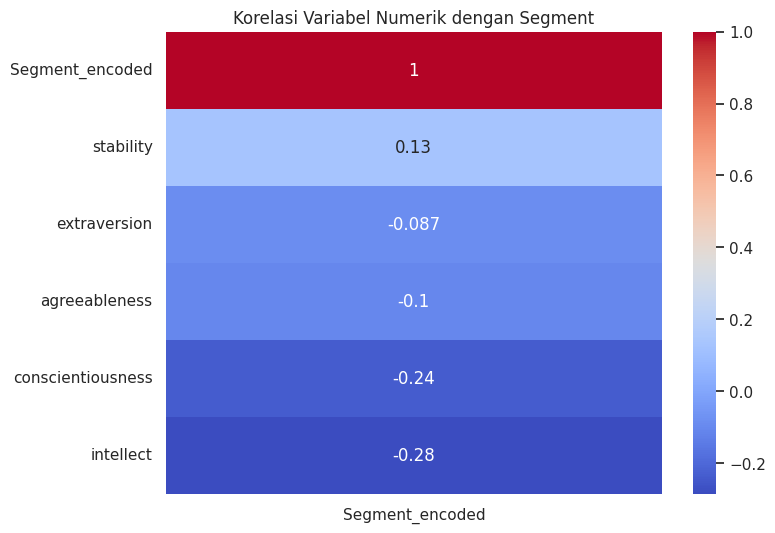

In [ ]:
#ngeliat data mana yang paling berpengaruh terhadap segment pake heatmap korelasi
df_korelasi = df3_merged.copy()
df_korelasi['Segment_encoded'] = df_korelasi['Segment'].astype('category').cat.codes

corr_matrix = df_korelasi.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix[['Segment_encoded']].sort_values(by='Segment_encoded', ascending=False), annot=True, cmap='coolwarm')
plt.title('Korelasi Variabel Numerik dengan Segment')
plt.show()

#hasil: intellect (berbanding terbalik), conscientiousness (berbanding terbalik), stability (berbanding lurus)

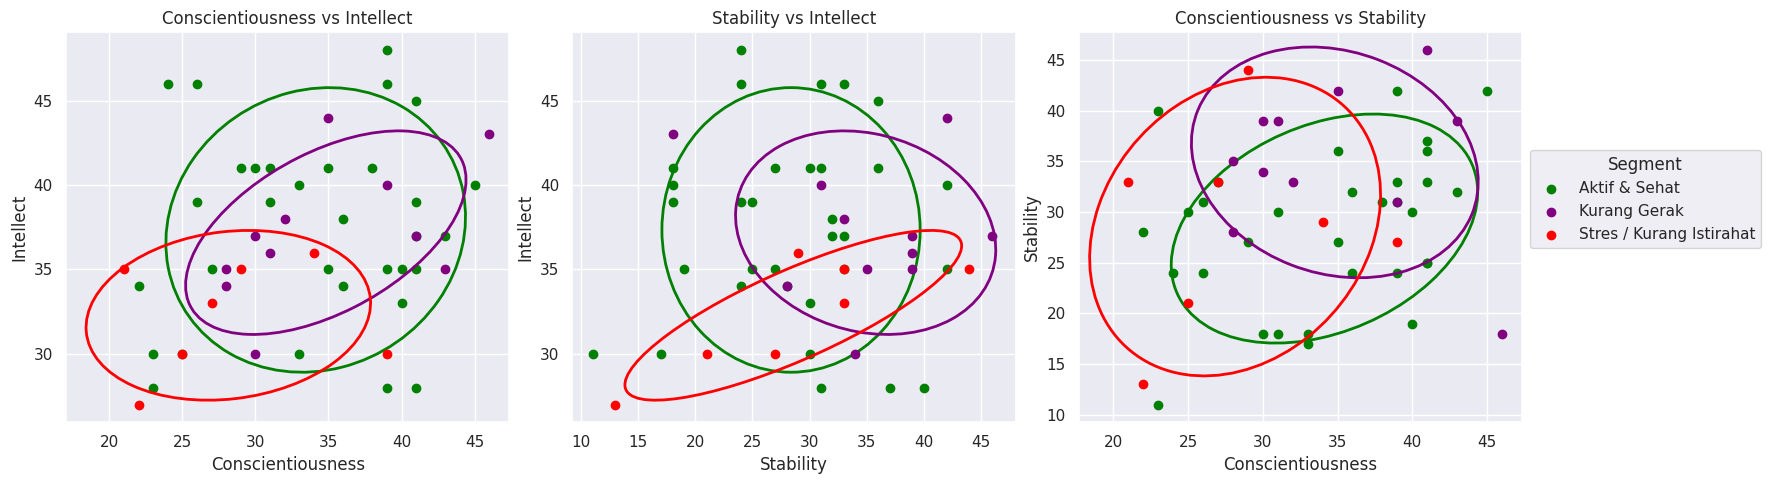

In [ ]:
# Fungsi untuk menggambar ellipse
def draw_ellipse(x, y, ax, n_std=1.5, **kwargs):
    cov = np.cov(x, y)
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]
    theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
    width, height = 2 * n_std * np.sqrt(vals)
    mean = [np.mean(x), np.mean(y)]
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=theta, **kwargs)
    ax.add_patch(ellipse)

# Kombinasi variabel
pairs = [
    ("conscientiousness", "intellect"),
    ("stability", "intellect"),
    ("conscientiousness", "stability")
]

# Segment dan warna custom
segments = df3_merged['Segment'].unique()
custom_colors = {
    'Aktif & Sehat': 'green',        # Biru
    'Kurang Gerak': 'purple',         # Oranye
    'Stres / Kurang Istirahat': 'red'  # Hijau
}

# Buat figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (x_var, y_var) in zip(axes, pairs):
    for seg in segments:
        color = custom_colors.get(seg, 'gray')  # fallback ke abu jika tidak dikenal
        subset = df3_merged[df3_merged['Segment'] == seg]
        ax.scatter(subset[x_var], subset[y_var], label=seg, color=color)
        draw_ellipse(
            subset[x_var],
            subset[y_var],
            ax=ax,
            edgecolor=color,
            facecolor='none',
            linewidth=2
        )
    ax.set_xlabel(x_var.capitalize())
    ax.set_ylabel(y_var.capitalize())
    ax.set_title(f"{x_var.capitalize()} vs {y_var.capitalize()}")

# Tambahkan legend hanya di luar paling kanan
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.85, 0.7), title="Segment")
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # beri ruang untuk legend
plt.show()


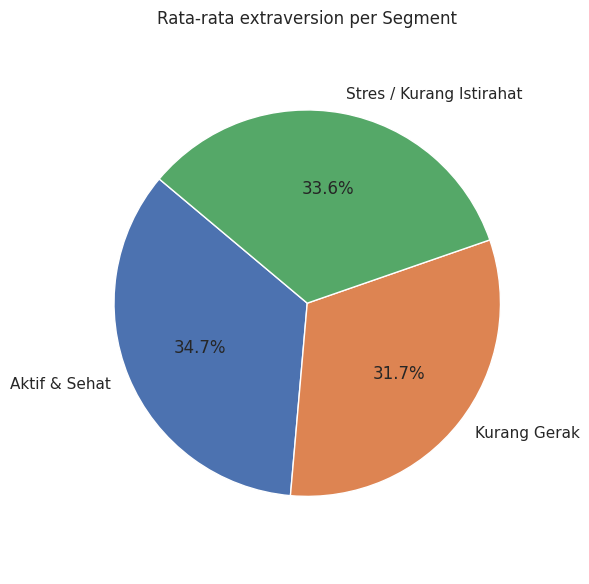

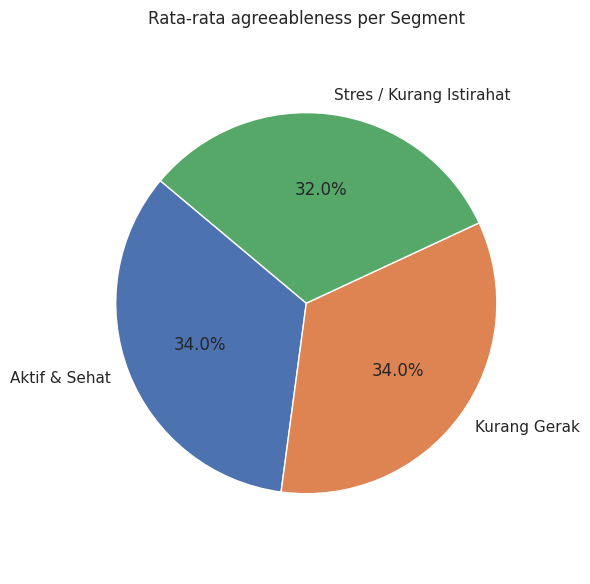

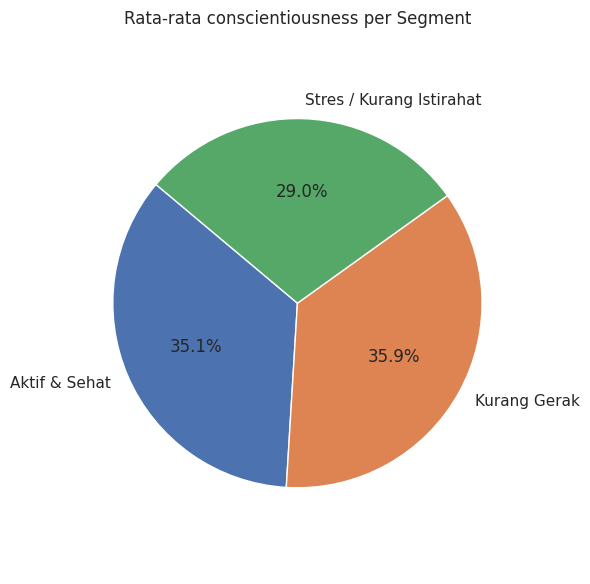

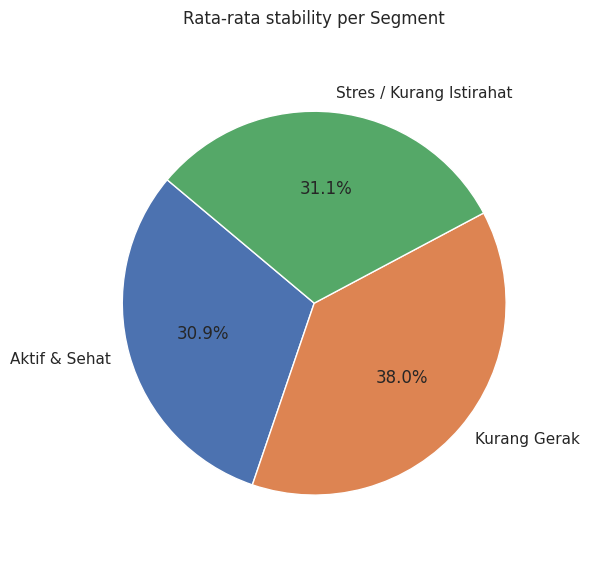

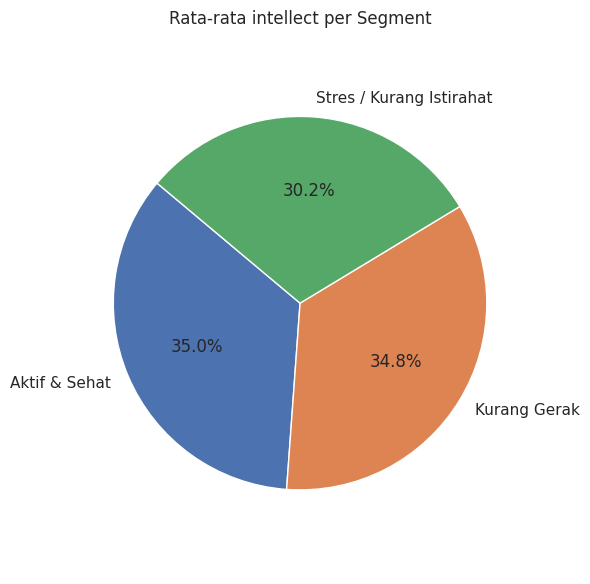

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalnya: df_merged sudah tersedia

# Pilih hanya kolom numerik (exclude object)
numerik_df = df3_merged.select_dtypes(exclude='object')

# Tambahkan kembali kolom 'Segment' untuk pengelompokan
numerik_df['Segment'] = df3_merged['Segment']

# Kelompokkan berdasarkan 'Segment' lalu ambil rata-rata
mean_per_segment = numerik_df.groupby('Segment').mean()

# Buat pie chart untuk setiap fitur
for column in mean_per_segment.columns:
    plt.figure(figsize=(6, 6))
    plt.pie(
        mean_per_segment[column],
        labels=mean_per_segment.index,
        autopct='%1.1f%%',
        startangle=140
    )
    plt.title(f'Rata-rata {column} per Segment')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()


## PANAS (Positive and Negative Affect Schedule)

### EDA

In [ ]:
data_panas = pd.read_csv('/content/drive/MyDrive/Dataset Datmin/panas.csv')
df4 = data_panas.copy()

In [ ]:
df4

Unnamed: 0                   user_id   type  submitdate  \
0             1  621e2e8e67b776a24055b564  panas  2021-07-26   
1             2  621e2e8e67b776a24055b564  panas  2021-05-31   
2             3  621e2e8e67b776a24055b564  panas  2021-06-07   
3             4  621e2e8e67b776a24055b564  panas  2021-06-28   
4             5  621e2e8e67b776a24055b564  panas  2021-07-19   
..          ...                       ...    ...         ...   
263           1  621e375367b776a24021e950  panas  2022-01-02   
264           0  621e375b67b776a240290cdc  panas  2021-06-01   
265           1  621e375b67b776a240290cdc  panas  2021-06-08   
266           2  621e375b67b776a240290cdc  panas  2021-06-22   
267           3  621e375b67b776a240290cdc  panas  2021-07-06   

     positive_affect_score  negative_affect_score  
0                       37                     14  
1                       38                     12  
2                       37                     12  
3                       31                     12  
4                       37                     12  
..                     ...                    ...  
263                     30                     33  
264                     27                     29  
265                     30                     30  
266                     30                     30  
267                     30                     29  

[268 rows x 6 columns]

In [ ]:
df4.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df4

user_id   type  submitdate  positive_affect_score  \
0    621e2e8e67b776a24055b564  panas  2021-07-26                     37   
1    621e2e8e67b776a24055b564  panas  2021-05-31                     38   
2    621e2e8e67b776a24055b564  panas  2021-06-07                     37   
3    621e2e8e67b776a24055b564  panas  2021-06-28                     31   
4    621e2e8e67b776a24055b564  panas  2021-07-19                     37   
..                        ...    ...         ...                    ...   
263  621e375367b776a24021e950  panas  2022-01-02                     30   
264  621e375b67b776a240290cdc  panas  2021-06-01                     27   
265  621e375b67b776a240290cdc  panas  2021-06-08                     30   
266  621e375b67b776a240290cdc  panas  2021-06-22                     30   
267  621e375b67b776a240290cdc  panas  2021-07-06                     30   

     negative_affect_score  
0                       14  
1                       12  
2                       12  
3                       12  
4                       12  
..                     ...  
263                     33  
264                     29  
265                     30  
266                     30  
267                     29  

[268 rows x 5 columns]

Deskripsi fitur dataset

| Kolom                  | Penjelasan                                                                                      |
|------------------------|------------------------------------------------------------------------------------------------|
| user_id                | ID anonim pengguna yang mengisi kuisioner PANAS.                                               |
| type                   | Jenis form atau kuisioner, di sini `panas` merujuk pada Positive and Negative Affect Schedule. |
| submitdate             | Tanggal saat pengguna mengisi kuisioner.                                                       |
| positive_affect_score  | Skor afek positif: mencerminkan sejauh mana seseorang merasa aktif, antusias, dan waspada.     |
| negative_affect_score  | Skor afek negatif: mencerminkan sejauh mana seseorang merasa tertekan, kesal, atau takut.      |


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   user_id                268 non-null    object
 1   type                   268 non-null    object
 2   submitdate             268 non-null    object
 3   positive_affect_score  268 non-null    int64 
 4   negative_affect_score  268 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 10.6+ KB


In [ ]:
df4.duplicated().sum()

np.int64(0)

In [ ]:
df4.isna().sum()

user_id                  0
type                     0
submitdate               0
positive_affect_score    0
negative_affect_score    0
dtype: int64

In [ ]:
len(df4['user_id'].unique().tolist())

51

**Visualizing amounts**

<ipython-input-14-dd940918e726>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df4, x=col, ax=ax, edgecolor='black', palette='pastel')
<ipython-input-14-dd940918e726>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df4, x=col, ax=ax, edgecolor='black', palette='pastel')
<ipython-input-14-dd940918e726>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df4, x=col, ax=ax, edgecolor='black', palette='pastel')


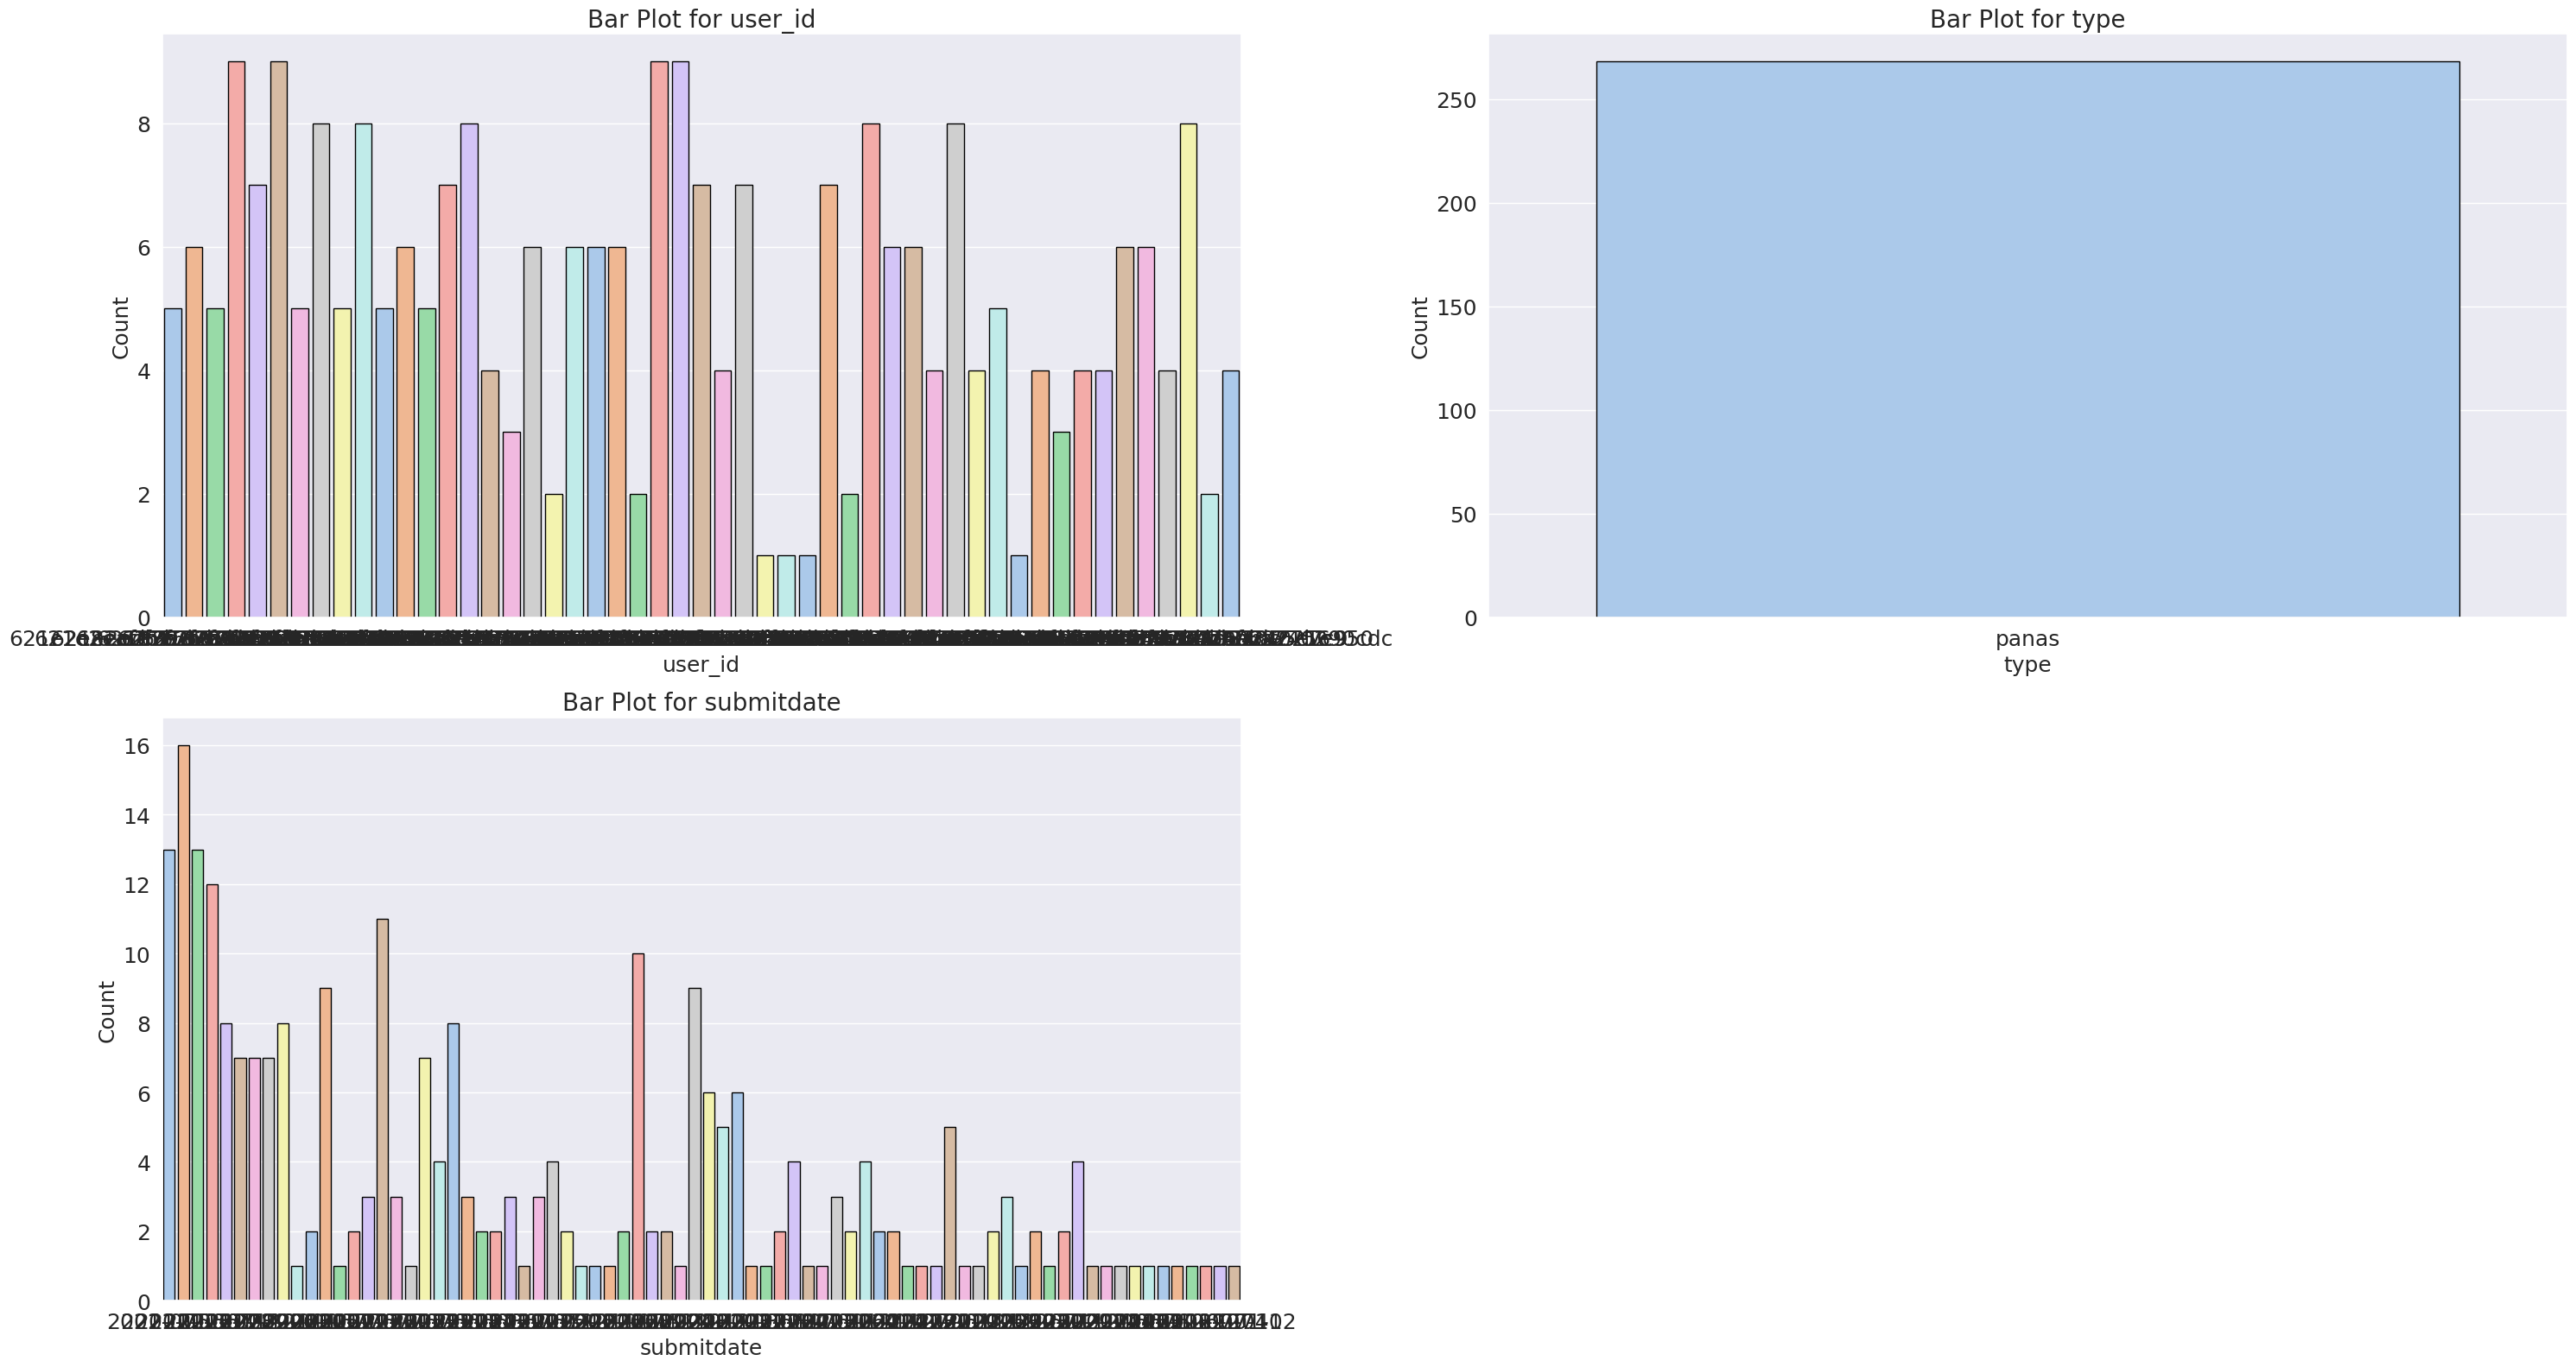

In [ ]:
col_category = df4.select_dtypes(include=['object']).columns

ncols = 2
nrows = (len(col_category) + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, nrows * 8))
axes = axes.flatten()

for ax, col in zip(axes, col_category):
    sns.countplot(data=df4, x=col, ax=ax, edgecolor='black', palette='pastel')
    ax.set_title(f"Bar Plot for {col}", fontsize=20)
    ax.set_xlabel(col, fontsize=18)
    ax.set_ylabel("Count", fontsize=18)

    ax.tick_params(axis='x', labelsize=18)
    ax.tick_params(axis='y', labelsize=18)

for i in range(len(col_category), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

**Visualizing distribution**

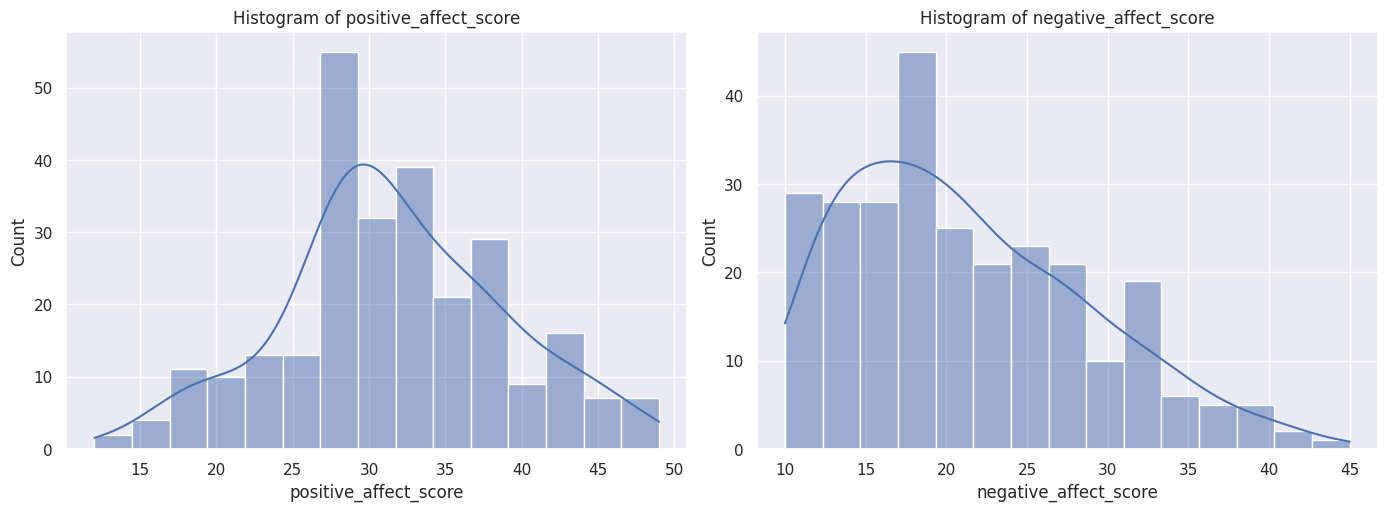

In [ ]:
num_cols = df4.select_dtypes(include=['number']).columns

n_cols = 3
n_rows = int(np.ceil(len(num_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5), constrained_layout=True)
axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    sns.histplot(data=df4, x=col, kde=True, bins=15, ax=ax)
    ax.set_title(f'Histogram of {col}')

for ax in axes[len(num_cols):]:
    fig.delaxes(ax)

plt.show()

**Visualizing association**

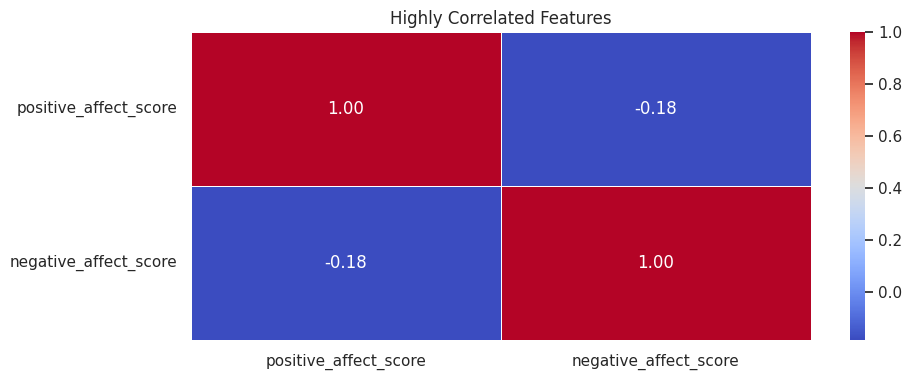

In [ ]:
corr = df4.select_dtypes(include=['float64', 'int64']).corr()

threshold = 0.1
mask = np.abs(corr) < threshold

plt.figure(figsize=(10, 4))
sns.heatmap(corr, annot=True, fmt=".2f", mask=mask, cmap="coolwarm", linewidths=0.5)
plt.title("Highly Correlated Features")
plt.show()

### Insight (Daily & PANAS)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [ ]:
id_panas = df4['user_id'].unique().tolist()
id_not_in_panas = []
for i in id_daily:
  if i not in id_panas:
    id_not_in_panas.append(i)

len(id_not_in_panas)

20

In [ ]:
df4_new = df4.copy()
df4_new.drop(df4_new[df4_new['user_id'].isin(id_not_in_panas)].index, inplace=True)
df4_new

user_id   type  submitdate  positive_affect_score  \
0    621e2e8e67b776a24055b564  panas  2021-07-26                     37   
1    621e2e8e67b776a24055b564  panas  2021-05-31                     38   
2    621e2e8e67b776a24055b564  panas  2021-06-07                     37   
3    621e2e8e67b776a24055b564  panas  2021-06-28                     31   
4    621e2e8e67b776a24055b564  panas  2021-07-19                     37   
..                        ...    ...         ...                    ...   
263  621e375367b776a24021e950  panas  2022-01-02                     30   
264  621e375b67b776a240290cdc  panas  2021-06-01                     27   
265  621e375b67b776a240290cdc  panas  2021-06-08                     30   
266  621e375b67b776a240290cdc  panas  2021-06-22                     30   
267  621e375b67b776a240290cdc  panas  2021-07-06                     30   

     negative_affect_score  
0                       14  
1                       12  
2                       12  
3                       12  
4                       12  
..                     ...  
263                     33  
264                     29  
265                     30  
266                     30  
267                     29  

[268 rows x 5 columns]

In [ ]:
df4_new['user_id'].value_counts()

user_id
621e2f3967b776a240c654db    9
621e2f7a67b776a240f14425    9
621e32af67b776a24045b4cf    9
621e329067b776a2402ffad2    9
621e2fb367b776a24015accd    8
621e30e267b776a240e5bf90    8
621e36f967b776a240e5e7c9    8
621e341067b776a24037b105    8
621e339967b776a240e502de    8
621e2ff067b776a2403eb737    8
621e30c867b776a240d4aa6c    7
621e32d967b776a240627414    7
621e331067b776a24085dd3f    7
621e335a67b776a240bb12ff    7
621e2f6167b776a240e082a9    7
621e312a67b776a240164d59    6
621e301367b776a24057738e    6
621e2eaf67b776a2406b14ac    6
621e326767b776a24012e179    6
621e33cf67b776a240087de9    6
621e33b067b776a240f39e56    6
621e324e67b776a2400191cb    6
621e366567b776a24076a727    6
621e323667b776a240f19134    6
621e367e67b776a24087d75d    6
621e2e8e67b776a24055b564    5
621e2ed667b776a24085d8d1    5
621e2fce67b776a240279baa    5
621e2f9167b776a240011ccb    5
621e300767b776a2404dc717    5
621e301e67b776a240608a72    5
621e34db67b776a240c9c2be    5
621e356967b776a24027bd9f    4
621e30e467b776a240e817c7    4
621e36c267b776a240ba2756    4
621e375b67b776a240290cdc    4
621e32e667b776a2406d2f1c    4
621e34f767b776a240de4e1a    4
621e362467b776a2404ad513    4
621e346f67b776a24081744f    4
621e33ed67b776a2401cf5f7    4
621e351a67b776a240f6204b    3
621e310d67b776a24003096d    3
621e314867b776a24029ebf9    2
621e328667b776a240281372    2
621e375367b776a24021e950    2
621e337667b776a240ce78ab    2
621e333567b776a240a0c217    1
621e332267b776a24092a584    1
621e333967b776a240a3cd06    1
621e34ec67b776a240d60873    1
Name: count, dtype: int64

In [ ]:
# menghapus user_id duplikat, dengan mengambil nilai variabel lain berdasarkan variabel submitdate yang terbaru
df4_new['submitdate'] = pd.to_datetime(df4_new['submitdate'])
df4_new = df4_new.sort_values(['user_id', 'submitdate'], ascending=[True, False])
df4_latest = df4_new.copy()
df4_latest = df4_new.drop_duplicates(subset='user_id', keep='first').reset_index(drop=True)
df4_latest

user_id   type submitdate  positive_affect_score  \
0   621e2e8e67b776a24055b564  panas 2021-07-26                     37   
1   621e2eaf67b776a2406b14ac  panas 2022-01-10                     27   
2   621e2ed667b776a24085d8d1  panas 2021-07-30                     24   
3   621e2f3967b776a240c654db  panas 2021-07-26                     29   
4   621e2f6167b776a240e082a9  panas 2021-08-02                     18   
5   621e2f7a67b776a240f14425  panas 2021-07-30                     43   
6   621e2f9167b776a240011ccb  panas 2022-01-16                     43   
7   621e2fb367b776a24015accd  panas 2021-07-26                     28   
8   621e2fce67b776a240279baa  panas 2021-07-26                     28   
9   621e2ff067b776a2403eb737  panas 2022-01-10                     16   
10  621e300767b776a2404dc717  panas 2022-01-10                     32   
11  621e301367b776a24057738e  panas 2021-07-26                     27   
12  621e301e67b776a240608a72  panas 2021-12-13                     39   
13  621e30c867b776a240d4aa6c  panas 2021-08-01                     36   
14  621e30e267b776a240e5bf90  panas 2022-01-10                     27   
15  621e30e467b776a240e817c7  panas 2021-07-31                     30   
16  621e310d67b776a24003096d  panas 2022-01-04                     17   
17  621e312a67b776a240164d59  panas 2022-01-11                     28   
18  621e314867b776a24029ebf9  panas 2021-06-23                     34   
19  621e323667b776a240f19134  panas 2022-01-11                     37   
20  621e324e67b776a2400191cb  panas 2022-01-17                     45   
21  621e326767b776a24012e179  panas 2021-07-26                     39   
22  621e328667b776a240281372  panas 2021-09-19                     46   
23  621e329067b776a2402ffad2  panas 2021-07-26                     35   
24  621e32af67b776a24045b4cf  panas 2021-07-26                     27   
25  621e32d967b776a240627414  panas 2021-07-12                     20   
26  621e32e667b776a2406d2f1c  panas 2022-01-25                     40   
27  621e331067b776a24085dd3f  panas 2022-01-10                     30   
28  621e332267b776a24092a584  panas 2021-06-02                     28   
29  621e333567b776a240a0c217  panas 2021-11-23                     34   
30  621e333967b776a240a3cd06  panas 2021-11-27                     37   
31  621e335a67b776a240bb12ff  panas 2021-07-29                     13   
32  621e337667b776a240ce78ab  panas 2021-07-20                     27   
33  621e339967b776a240e502de  panas 2022-01-12                     45   
34  621e33b067b776a240f39e56  panas 2021-07-26                     35   
35  621e33cf67b776a240087de9  panas 2022-01-10                     22   
36  621e33ed67b776a2401cf5f7  panas 2021-07-12                     35   
37  621e341067b776a24037b105  panas 2021-07-28                     24   
38  621e346f67b776a24081744f  panas 2022-01-12                     25   
39  621e34db67b776a240c9c2be  panas 2021-07-19                     37   
40  621e34ec67b776a240d60873  panas 2021-06-02                     24   
41  621e34f767b776a240de4e1a  panas 2021-07-26                     33   
42  621e351a67b776a240f6204b  panas 2021-08-02                     35   
43  621e356967b776a24027bd9f  panas 2022-01-10                     41   
44  621e362467b776a2404ad513  panas 2021-08-01                     33   
45  621e366567b776a24076a727  panas 2022-01-10                     16   
46  621e367e67b776a24087d75d  panas 2022-01-17                     27   
47  621e36c267b776a240ba2756  panas 2021-07-06                     38   
48  621e36f967b776a240e5e7c9  panas 2021-07-26                     24   
49  621e375367b776a24021e950  panas 2022-01-02                     30   
50  621e375b67b776a240290cdc  panas 2021-07-06                     30   

    negative_affect_score  
0                      14  
1                      12  
2                      20  
3                      24  
4                      26  
5                      18  
6                      31  


In [ ]:
df4_new.columns.tolist()

['user_id',
 'type',
 'submitdate',
 'positive_affect_score',
 'negative_affect_score']

In [ ]:
df.rename(columns={'User ID': 'user_id'}, inplace=True)
df4_merged = df4_latest[['user_id',
 'type',
 'submitdate',
 'positive_affect_score',
 'negative_affect_score']].merge(df[['user_id', 'Skor Aktif & Sehat', 'Skor Kurang Gerak', 'Skor Stres / Kurang Istirahat', 'Segment']], on='user_id', how='left')
df4_merged

user_id   type submitdate  positive_affect_score  \
0   621e2e8e67b776a24055b564  panas 2021-07-26                     37   
1   621e2eaf67b776a2406b14ac  panas 2022-01-10                     27   
2   621e2ed667b776a24085d8d1  panas 2021-07-30                     24   
3   621e2f3967b776a240c654db  panas 2021-07-26                     29   
4   621e2f6167b776a240e082a9  panas 2021-08-02                     18   
5   621e2f7a67b776a240f14425  panas 2021-07-30                     43   
6   621e2f9167b776a240011ccb  panas 2022-01-16                     43   
7   621e2fb367b776a24015accd  panas 2021-07-26                     28   
8   621e2fce67b776a240279baa  panas 2021-07-26                     28   
9   621e2ff067b776a2403eb737  panas 2022-01-10                     16   
10  621e300767b776a2404dc717  panas 2022-01-10                     32   
11  621e301367b776a24057738e  panas 2021-07-26                     27   
12  621e301e67b776a240608a72  panas 2021-12-13                     39   
13  621e30c867b776a240d4aa6c  panas 2021-08-01                     36   
14  621e30e267b776a240e5bf90  panas 2022-01-10                     27   
15  621e30e467b776a240e817c7  panas 2021-07-31                     30   
16  621e310d67b776a24003096d  panas 2022-01-04                     17   
17  621e312a67b776a240164d59  panas 2022-01-11                     28   
18  621e314867b776a24029ebf9  panas 2021-06-23                     34   
19  621e323667b776a240f19134  panas 2022-01-11                     37   
20  621e324e67b776a2400191cb  panas 2022-01-17                     45   
21  621e326767b776a24012e179  panas 2021-07-26                     39   
22  621e328667b776a240281372  panas 2021-09-19                     46   
23  621e329067b776a2402ffad2  panas 2021-07-26                     35   
24  621e32af67b776a24045b4cf  panas 2021-07-26                     27   
25  621e32d967b776a240627414  panas 2021-07-12                     20   
26  621e32e667b776a2406d2f1c  panas 2022-01-25                     40   
27  621e331067b776a24085dd3f  panas 2022-01-10                     30   
28  621e332267b776a24092a584  panas 2021-06-02                     28   
29  621e333567b776a240a0c217  panas 2021-11-23                     34   
30  621e333967b776a240a3cd06  panas 2021-11-27                     37   
31  621e335a67b776a240bb12ff  panas 2021-07-29                     13   
32  621e337667b776a240ce78ab  panas 2021-07-20                     27   
33  621e339967b776a240e502de  panas 2022-01-12                     45   
34  621e33b067b776a240f39e56  panas 2021-07-26                     35   
35  621e33cf67b776a240087de9  panas 2022-01-10                     22   
36  621e33ed67b776a2401cf5f7  panas 2021-07-12                     35   
37  621e341067b776a24037b105  panas 2021-07-28                     24   
38  621e346f67b776a24081744f  panas 2022-01-12                     25   
39  621e34db67b776a240c9c2be  panas 2021-07-19                     37   
40  621e34ec67b776a240d60873  panas 2021-06-02                     24   
41  621e34f767b776a240de4e1a  panas 2021-07-26                     33   
42  621e351a67b776a240f6204b  panas 2021-08-02                     35   
43  621e356967b776a24027bd9f  panas 2022-01-10                     41   
44  621e362467b776a2404ad513  panas 2021-08-01                     33   
45  621e366567b776a24076a727  panas 2022-01-10                     16   
46  621e367e67b776a24087d75d  panas 2022-01-17                     27   
47  621e36c267b776a240ba2756  panas 2021-07-06                     38   
48  621e36f967b776a240e5e7c9  panas 2021-07-26                     24   
49  621e375367b776a24021e950  panas 2022-01-02                     30   
50  621e375b67b776a240290cdc  panas 2021-07-06                     30   

    negative_affect_score  Skor Aktif & Sehat  Skor Kurang Gerak  \
0                      14                  13                  0   
1                      12                   8                  0   
2                   

Distribusi Skor Afek Responden

<ipython-input-36-a0940eea6491>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df4_merged, x='Segment', y='positive_affect_score', palette='Set2')
<ipython-input-36-a0940eea6491>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df4_merged, x='Segment', y='negative_affect_score', palette='Set3')


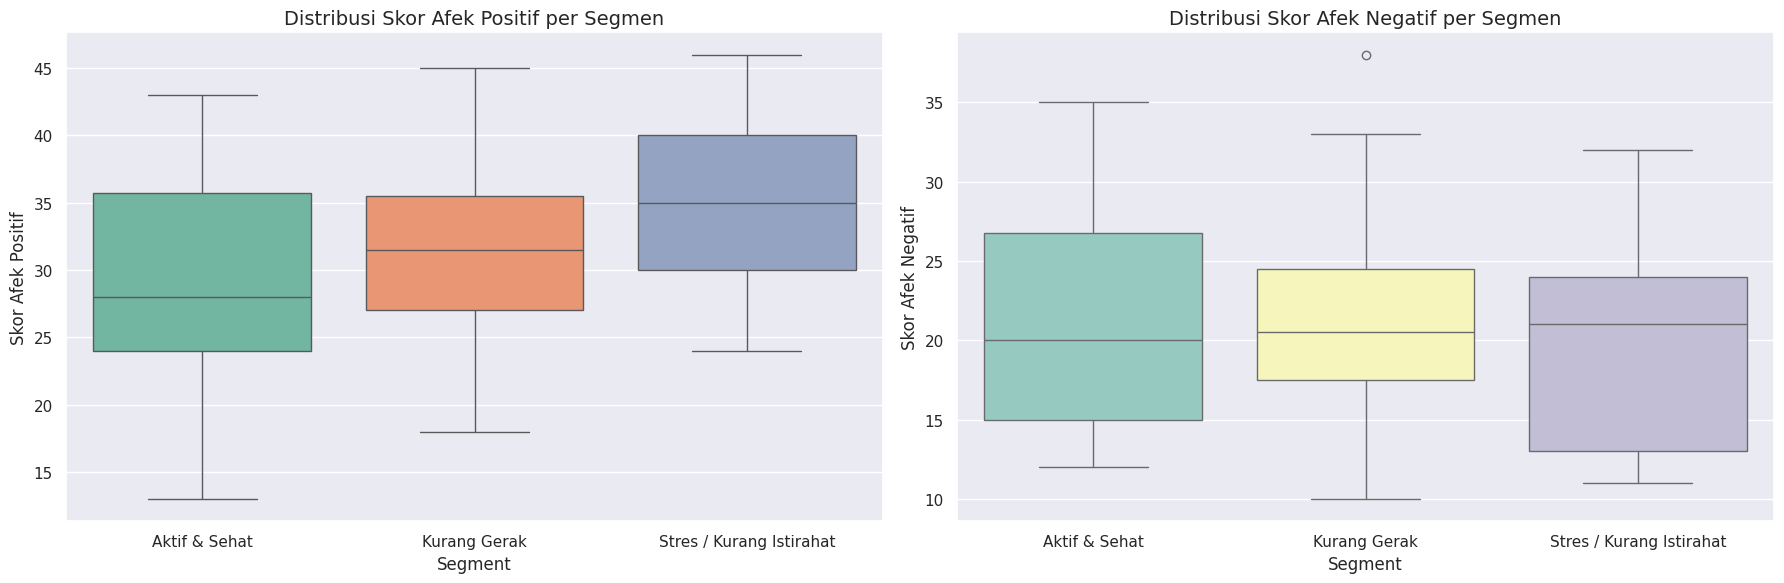

In [ ]:
plt.figure(figsize=(18, 6))  # ubah ukuran figure

plt.subplot(1, 2, 1)
sns.boxplot(data=df4_merged, x='Segment', y='positive_affect_score', palette='Set2')
plt.title('Distribusi Skor Afek Positif per Segmen', fontsize=14)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Skor Afek Positif', fontsize=12)

plt.subplot(1, 2, 2)
sns.boxplot(data=df4_merged, x='Segment', y='negative_affect_score', palette='Set3')
plt.title('Distribusi Skor Afek Negatif per Segmen', fontsize=14)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Skor Afek Negatif', fontsize=12)

plt.tight_layout()
plt.show()

Persebaran Afek Positif dan Negatif Berdasarkan Segmentasi per pengguna

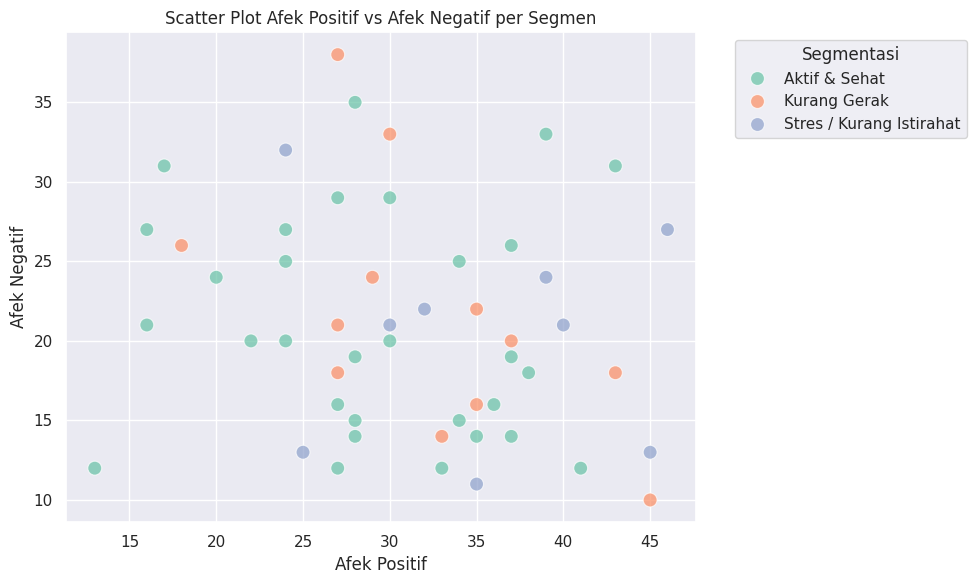

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df4_merged,
    x='positive_affect_score',
    y='negative_affect_score',
    hue='Segment',
    palette='Set2',
    s=100,
    alpha=0.7
)
plt.title('Scatter Plot Afek Positif vs Afek Negatif per Segmen')
plt.xlabel('Afek Positif')
plt.ylabel('Afek Negatif')

plt.legend(title='Segmentasi', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Perbandingan Skor Rata-rata Afek Positif dan Negatif Berdasarkan Segmentasi pengguna

In [ ]:
summary = df4_merged.groupby('Segment')[['positive_affect_score', 'negative_affect_score']].mean().reset_index()
summary.columns = ['Segment', 'Afek Positif', 'Afek Negatif']
print("Rata-rata Afek Positif dan Negatif per Segmen:")
print(summary)

Rata-rata Afek Positif dan Negatif per Segmen:
                    Segment  Afek Positif  Afek Negatif
0             Aktif & Sehat     29.100000     21.033333
1              Kurang Gerak     32.166667     21.666667
2  Stres / Kurang Istirahat     35.111111     20.444444


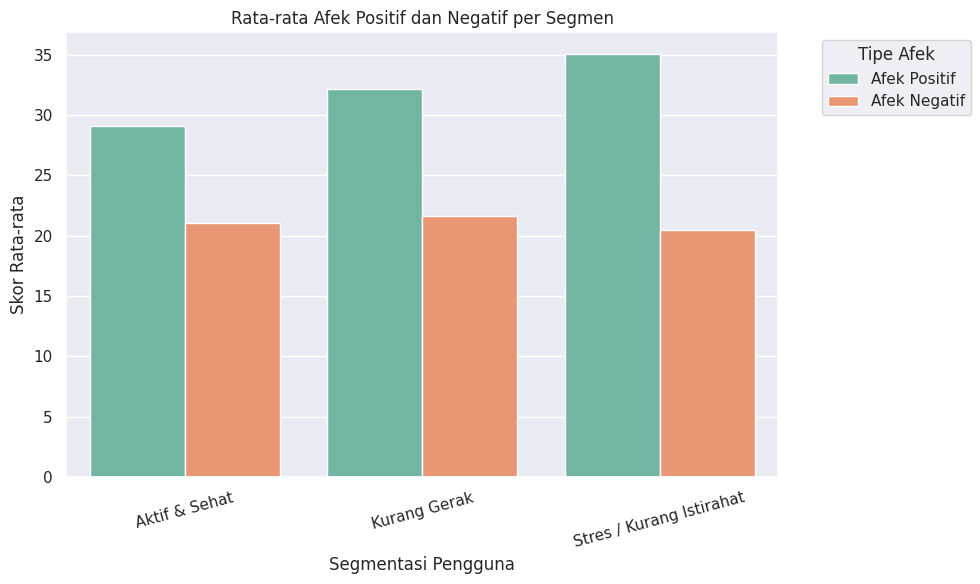

In [ ]:
plt.figure(figsize=(10, 6))
summary_melted = summary.melt(id_vars='Segment',
                               value_vars=['Afek Positif', 'Afek Negatif'],
                               var_name='Tipe Afek', value_name='Skor Rata-rata')

sns.barplot(data=summary_melted, x='Segment', y='Skor Rata-rata', hue='Tipe Afek', palette='Set2')
plt.title('Rata-rata Afek Positif dan Negatif per Segmen')
plt.ylabel('Skor Rata-rata')
plt.xlabel('Segmentasi Pengguna')
plt.xticks(rotation=15)

plt.legend(title='Tipe Afek', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## BREQ (Behavioral Regulation in Exercise Questionnaire)

### EDA

In [ ]:
data_breq = pd.read_csv('/content/drive/MyDrive/Dataset Datmin/breq.csv')
df5 = data_breq.copy()

In [ ]:
df5

Unnamed: 0                   user_id  type  submitdate  breq_amotivation  \
0            0  621e2e8e67b776a24055b564  breq  2021-05-31              1.00   
1            1  621e2e8e67b776a24055b564  breq  2021-07-26              1.00   
2            0  621e2eaf67b776a2406b14ac  breq  2021-11-29              1.25   
3            1  621e2eaf67b776a2406b14ac  breq  2022-01-17              1.00   
4            0  621e2ed667b776a24085d8d1  breq  2021-06-07              2.75   
..         ...                       ...   ...         ...               ...   
87           0  621e36c267b776a240ba2756  breq  2021-05-31              1.00   
88           0  621e36f967b776a240e5e7c9  breq  2021-05-31              1.00   
89           1  621e36f967b776a240e5e7c9  breq  2021-07-26              1.00   
90           0  621e375b67b776a240290cdc  breq  2021-06-01              1.00   
91           1  621e375b67b776a240290cdc  breq  2021-06-07              1.00   

    breq_external_regulation  breq_introjected_regulation  \
0                       1.00                     1.000000   
1                       1.00                     1.666667   
2                       1.00                     1.666667   
3                       1.25                     2.333333   
4                       2.00                     3.000000   
..                       ...                          ...   
87                      1.00                     1.000000   
88                      1.75                     4.666667   
89                      1.75                     5.000000   
90                      1.00                     1.666667   
91                      1.00                     1.000000   

    breq_identified_regulation  breq_intrinsic_regulation  \
0                         3.50                       4.25   
1                         3.50                       4.00   
2                         4.50                       3.75   
3                         4.00                       3.50   
4                         2.50                       1.00   
..                         ...                        ...   
87                        3.75                       4.75   
88                        4.00                       3.25   
89                        4.75                       3.25   
90                        3.50                       2.75   
91                        3.25                       2.75   

   breq_self_determination  
0     intrinsic_regulation  
1     intrinsic_regulation  
2    identified_regulation  
3    identified_regulation  
4   introjected_regulation  
..                     ...  
87    intrinsic_regulation  
88  introjected_regulation  
89  introjected_regulation  
90   identified_regulation  
91   identified_regulation  

[92 rows x 10 columns]

In [ ]:
df5.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df5

user_id  type  submitdate  breq_amotivation  \
0   621e2e8e67b776a24055b564  breq  2021-05-31              1.00   
1   621e2e8e67b776a24055b564  breq  2021-07-26              1.00   
2   621e2eaf67b776a2406b14ac  breq  2021-11-29              1.25   
3   621e2eaf67b776a2406b14ac  breq  2022-01-17              1.00   
4   621e2ed667b776a24085d8d1  breq  2021-06-07              2.75   
..                       ...   ...         ...               ...   
87  621e36c267b776a240ba2756  breq  2021-05-31              1.00   
88  621e36f967b776a240e5e7c9  breq  2021-05-31              1.00   
89  621e36f967b776a240e5e7c9  breq  2021-07-26              1.00   
90  621e375b67b776a240290cdc  breq  2021-06-01              1.00   
91  621e375b67b776a240290cdc  breq  2021-06-07              1.00   

    breq_external_regulation  breq_introjected_regulation  \
0                       1.00                     1.000000   
1                       1.00                     1.666667   
2                       1.00                     1.666667   
3                       1.25                     2.333333   
4                       2.00                     3.000000   
..                       ...                          ...   
87                      1.00                     1.000000   
88                      1.75                     4.666667   
89                      1.75                     5.000000   
90                      1.00                     1.666667   
91                      1.00                     1.000000   

    breq_identified_regulation  breq_intrinsic_regulation  \
0                         3.50                       4.25   
1                         3.50                       4.00   
2                         4.50                       3.75   
3                         4.00                       3.50   
4                         2.50                       1.00   
..                         ...                        ...   
87                        3.75                       4.75   
88                        4.00                       3.25   
89                        4.75                       3.25   
90                        3.50                       2.75   
91                        3.25                       2.75   

   breq_self_determination  
0     intrinsic_regulation  
1     intrinsic_regulation  
2    identified_regulation  
3    identified_regulation  
4   introjected_regulation  
..                     ...  
87    intrinsic_regulation  
88  introjected_regulation  
89  introjected_regulation  
90   identified_regulation  
91   identified_regulation  

[92 rows x 9 columns]

Deskripsi fitur dataset

| Kolom                          | Penjelasan                                                                                                  |
|-------------------------------|-------------------------------------------------------------------------------------------------------------|
| user_id                       | ID anonim pengguna yang mengisi kuisioner BREQ.                                                             |
| type                          | Jenis form atau kuisioner, di sini `breq` merujuk pada Behavioral Regulation in Exercise Questionnaire.     |
| submitdate                    | Tanggal saat pengguna mengisi kuisioner.                                                                    |
| breq_amotivation              | Skor ketidakbermotivasian: individu tidak memiliki dorongan untuk berolahraga sama sekali.                 |
| breq_external_regulation      | Regulasi eksternal: individu termotivasi oleh faktor luar (misalnya tekanan sosial, hadiah).               |
| breq_introjected_regulation   | Regulasi interjeksi: individu berolahraga karena tekanan batin (rasa bersalah atau kewajiban).             |
| breq_identified_regulation    | Regulasi identifikasi: individu sadar akan manfaat olahraga dan memilih melakukannya.                      |
| breq_intrinsic_regulation     | Regulasi intrinsik: individu berolahraga karena kesenangan pribadi atau minat internal.                    |
| breq_self_determination        | Tipe regulasi dominan berdasarkan skor tertinggi dari 5 jenis di atas; menunjukkan jenis motivasi utama.  |


In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      92 non-null     object 
 1   type                         92 non-null     object 
 2   submitdate                   92 non-null     object 
 3   breq_amotivation             92 non-null     float64
 4   breq_external_regulation     92 non-null     float64
 5   breq_introjected_regulation  92 non-null     float64
 6   breq_identified_regulation   92 non-null     float64
 7   breq_intrinsic_regulation    92 non-null     float64
 8   breq_self_determination      92 non-null     object 
dtypes: float64(5), object(4)
memory usage: 6.6+ KB


In [ ]:
len(df5['user_id'].unique().tolist())

52

In [ ]:
df5.duplicated().sum()

np.int64(0)

In [ ]:
df5.isna().sum()

user_id                        0
type                           0
submitdate                     0
breq_amotivation               0
breq_external_regulation       0
breq_introjected_regulation    0
breq_identified_regulation     0
breq_intrinsic_regulation      0
breq_self_determination        0
dtype: int64

**Visualizing amounts**

<ipython-input-45-b22a4edcb238>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df5, x=col, ax=ax, edgecolor='black', palette='pastel')
<ipython-input-45-b22a4edcb238>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df5, x=col, ax=ax, edgecolor='black', palette='pastel')
<ipython-input-45-b22a4edcb238>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df5, x=col, ax=ax, edgecolor='black', palette='pastel')
<ipython-input-45-b22a4edcb238>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and

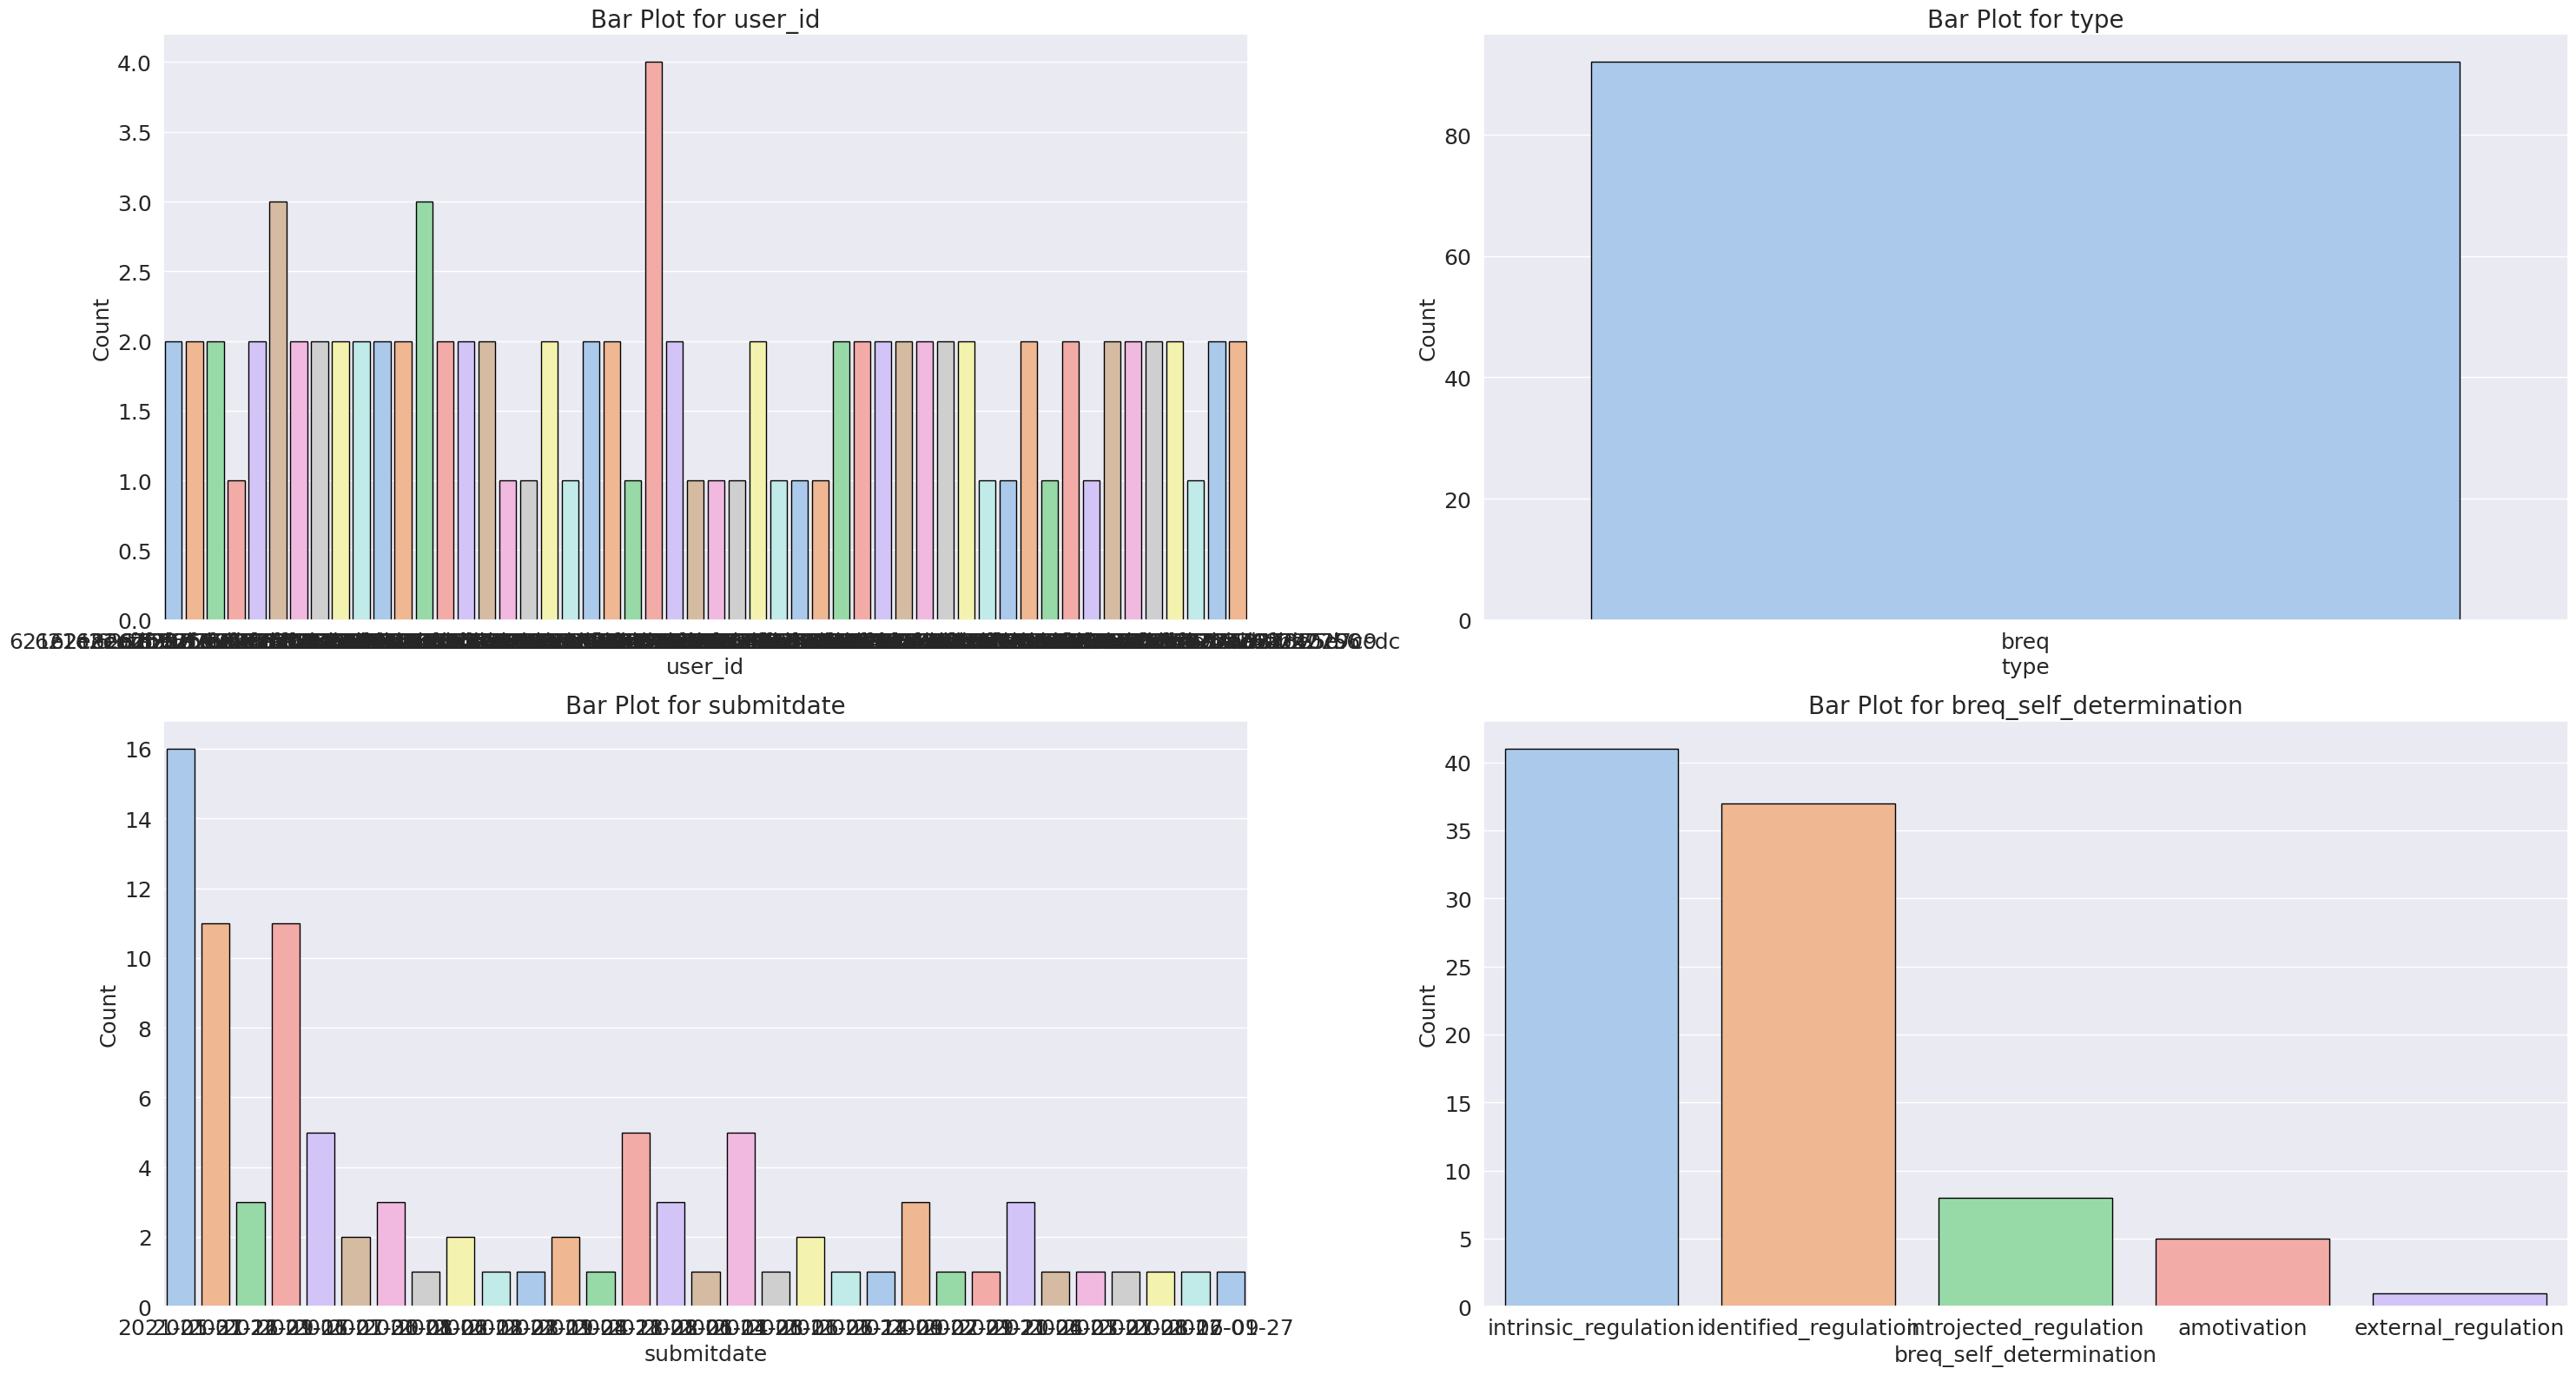

In [ ]:
col_category = df5.select_dtypes(include=['object']).columns

ncols = 2
nrows = (len(col_category) + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, nrows * 8))
axes = axes.flatten()

for ax, col in zip(axes, col_category):
    sns.countplot(data=df5, x=col, ax=ax, edgecolor='black', palette='pastel')
    ax.set_title(f"Bar Plot for {col}", fontsize=20)
    ax.set_xlabel(col, fontsize=18)
    ax.set_ylabel("Count", fontsize=18)

    ax.tick_params(axis='x', labelsize=18)
    ax.tick_params(axis='y', labelsize=18)

for i in range(len(col_category), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

**Visualizing distribution**

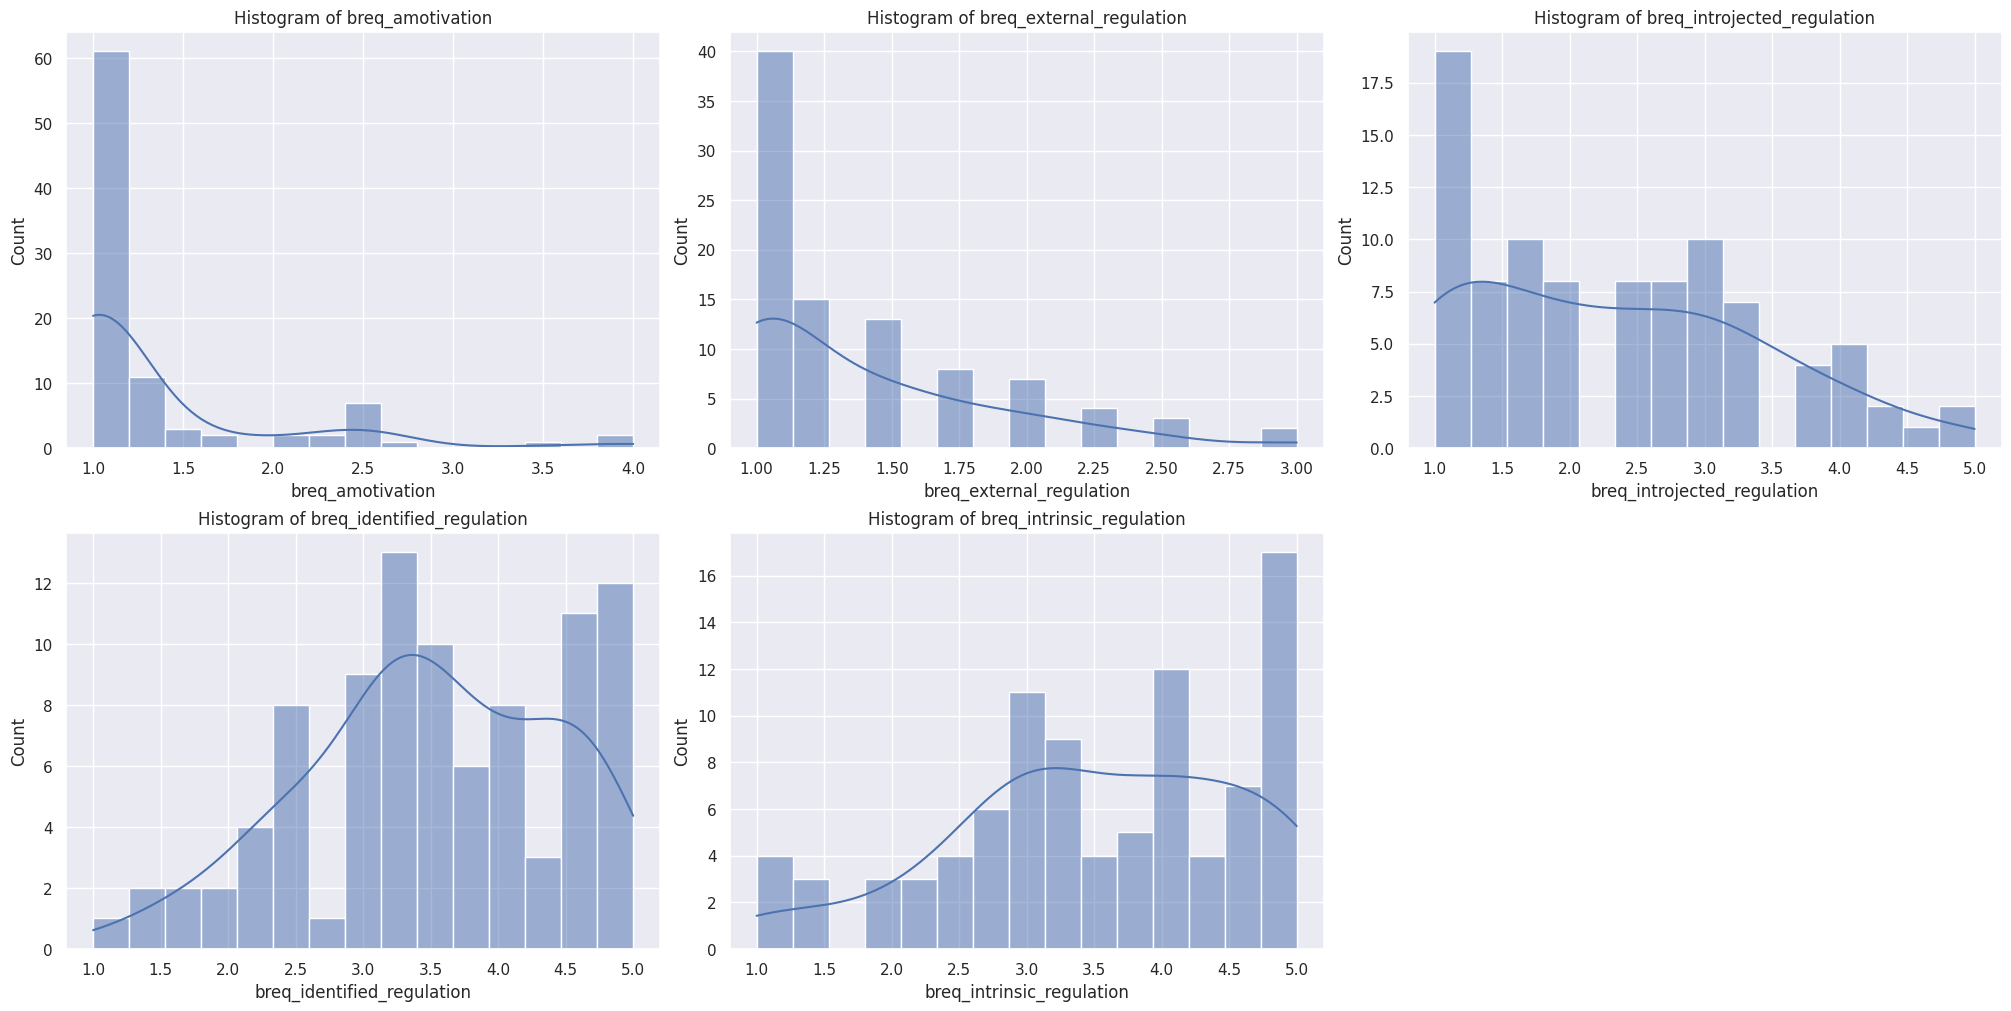

In [ ]:
num_cols = df5.select_dtypes(include=['number']).columns

n_cols = 3
n_rows = int(np.ceil(len(num_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5), constrained_layout=True)
axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    sns.histplot(data=df5, x=col, kde=True, bins=15, ax=ax)
    ax.set_title(f'Histogram of {col}')

for ax in axes[len(num_cols):]:
    fig.delaxes(ax)

plt.show()

**Visualizing association**

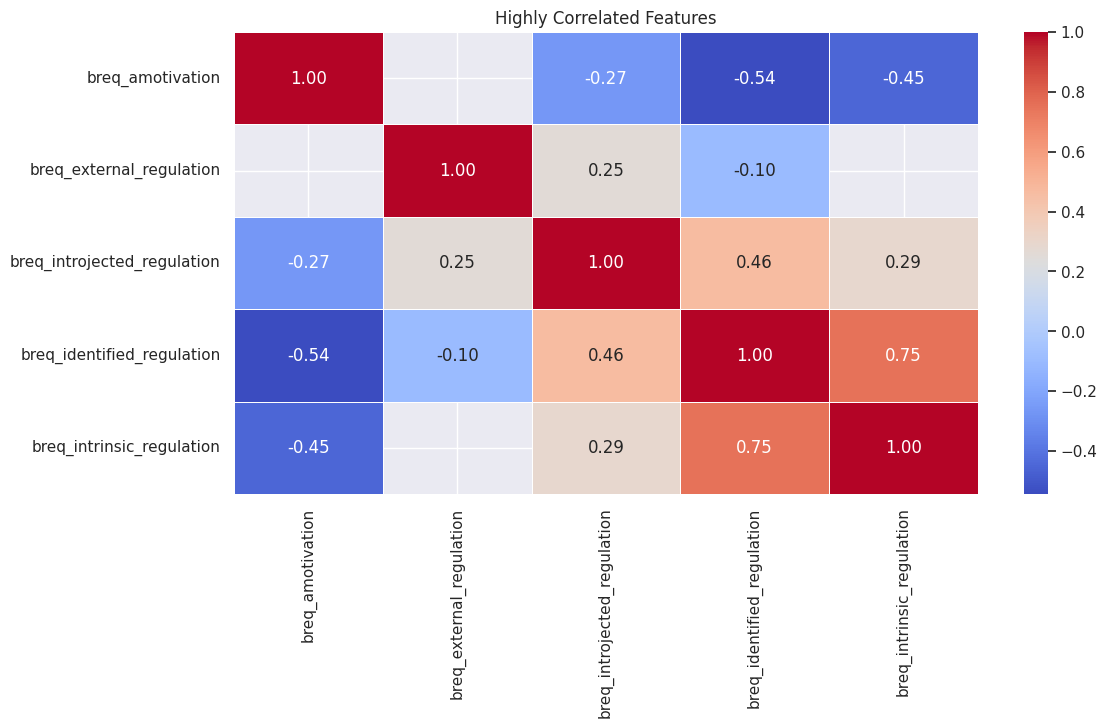

In [ ]:
corr = df5.select_dtypes(include=['float64', 'int64']).corr()

threshold = 0.1
mask = np.abs(corr) < threshold

plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, fmt=".2f", mask=mask, cmap="coolwarm", linewidths=0.5)
plt.title("Highly Correlated Features")
plt.show()

### Insight (Daily & BREQ)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
id_breq = df5['user_id'].unique().tolist()
id_not_in_breq = []
for i in id_daily:
  if i not in id_breq:
    id_not_in_breq.append(i)

len(id_not_in_breq)

19

In [ ]:
df5_new = df5.copy()
df5_new.drop(df5_new[df5_new['user_id'].isin(id_not_in_breq)].index, inplace=True)
df5_new

user_id  type  submitdate  breq_amotivation  \
0   621e2e8e67b776a24055b564  breq  2021-05-31              1.00   
1   621e2e8e67b776a24055b564  breq  2021-07-26              1.00   
2   621e2eaf67b776a2406b14ac  breq  2021-11-29              1.25   
3   621e2eaf67b776a2406b14ac  breq  2022-01-17              1.00   
4   621e2ed667b776a24085d8d1  breq  2021-06-07              2.75   
..                       ...   ...         ...               ...   
87  621e36c267b776a240ba2756  breq  2021-05-31              1.00   
88  621e36f967b776a240e5e7c9  breq  2021-05-31              1.00   
89  621e36f967b776a240e5e7c9  breq  2021-07-26              1.00   
90  621e375b67b776a240290cdc  breq  2021-06-01              1.00   
91  621e375b67b776a240290cdc  breq  2021-06-07              1.00   

    breq_external_regulation  breq_introjected_regulation  \
0                       1.00                     1.000000   
1                       1.00                     1.666667   
2                       1.00                     1.666667   
3                       1.25                     2.333333   
4                       2.00                     3.000000   
..                       ...                          ...   
87                      1.00                     1.000000   
88                      1.75                     4.666667   
89                      1.75                     5.000000   
90                      1.00                     1.666667   
91                      1.00                     1.000000   

    breq_identified_regulation  breq_intrinsic_regulation  \
0                         3.50                       4.25   
1                         3.50                       4.00   
2                         4.50                       3.75   
3                         4.00                       3.50   
4                         2.50                       1.00   
..                         ...                        ...   
87                        3.75                       4.75   
88                        4.00                       3.25   
89                        4.75                       3.25   
90                        3.50                       2.75   
91                        3.25                       2.75   

   breq_self_determination  
0     intrinsic_regulation  
1     intrinsic_regulation  
2    identified_regulation  
3    identified_regulation  
4   introjected_regulation  
..                     ...  
87    intrinsic_regulation  
88  introjected_regulation  
89  introjected_regulation  
90   identified_regulation  
91   identified_regulation  

[92 rows x 9 columns]

In [ ]:
df5_new['user_id'].value_counts()

user_id
621e329067b776a2402ffad2    4
621e301e67b776a240608a72    3
621e2f7a67b776a240f14425    3
621e2e8e67b776a24055b564    2
621e301367b776a24057738e    2
621e2ed667b776a24085d8d1    2
621e2f9167b776a240011ccb    2
621e2f6167b776a240e082a9    2
621e2fce67b776a240279baa    2
621e2ff067b776a2403eb737    2
621e300767b776a2404dc717    2
621e2fb367b776a24015accd    2
621e312a67b776a240164d59    2
621e30c867b776a240d4aa6c    2
621e30e267b776a240e5bf90    2
621e30e467b776a240e817c7    2
621e32af67b776a24045b4cf    2
621e324e67b776a2400191cb    2
621e323667b776a240f19134    2
621e2eaf67b776a2406b14ac    2
621e375b67b776a240290cdc    2
621e36f967b776a240e5e7c9    2
621e367e67b776a24087d75d    2
621e356967b776a24027bd9f    2
621e335a67b776a240bb12ff    2
621e337667b776a240ce78ab    2
621e339967b776a240e502de    2
621e331067b776a24085dd3f    2
621e33b067b776a240f39e56    2
621e362467b776a2404ad513    2
621e366567b776a24076a727    2
621e34f767b776a240de4e1a    2
621e34db67b776a240c9c2be    2
621e341067b776a24037b105    2
621e33ed67b776a2401cf5f7    2
621e33cf67b776a240087de9    2
621e314867b776a24029ebf9    1
621e310d67b776a24003096d    1
621e30f467b776a240f22944    1
621e2f3967b776a240c654db    1
621e328667b776a240281372    1
621e32d067b776a2405b7d54    1
621e32d967b776a240627414    1
621e32e667b776a2406d2f1c    1
621e333567b776a240a0c217    1
621e332267b776a24092a584    1
621e333967b776a240a3cd06    1
621e345c67b776a2407146a8    1
621e34ec67b776a240d60873    1
621e346f67b776a24081744f    1
621e351a67b776a240f6204b    1
621e36c267b776a240ba2756    1
Name: count, dtype: int64

In [ ]:
# menghapus user_id duplikat, dengan mengambil nilai variabel lain berdasarkan variabel submitdate yang terbaru
df5_new['submitdate'] = pd.to_datetime(df5_new['submitdate'])
df5_new = df5_new.sort_values(['user_id', 'submitdate'], ascending=[True, False])
df5_latest = df5_new.copy()
df5_latest = df5_new.drop_duplicates(subset='user_id', keep='first').reset_index(drop=True)
df5_latest

user_id  type submitdate  breq_amotivation  \
0   621e2e8e67b776a24055b564  breq 2021-07-26              1.00   
1   621e2eaf67b776a2406b14ac  breq 2022-01-17              1.00   
2   621e2ed667b776a24085d8d1  breq 2021-07-30              1.00   
3   621e2f3967b776a240c654db  breq 2021-05-31              1.00   
4   621e2f6167b776a240e082a9  breq 2021-08-02              1.00   
5   621e2f7a67b776a240f14425  breq 2021-07-30              1.00   
6   621e2f9167b776a240011ccb  breq 2022-01-19              1.00   
7   621e2fb367b776a24015accd  breq 2021-07-26              1.25   
8   621e2fce67b776a240279baa  breq 2021-07-26              1.00   
9   621e2ff067b776a2403eb737  breq 2022-01-17              1.00   
10  621e300767b776a2404dc717  breq 2022-01-24              1.00   
11  621e301367b776a24057738e  breq 2021-07-26              1.00   
12  621e301e67b776a240608a72  breq 2021-11-22              1.00   
13  621e30c867b776a240d4aa6c  breq 2021-08-01              1.00   
14  621e30e267b776a240e5bf90  breq 2022-01-17              2.25   
15  621e30e467b776a240e817c7  breq 2021-08-01              1.00   
16  621e30f467b776a240f22944  breq 2021-11-29              1.00   
17  621e310d67b776a24003096d  breq 2021-11-22              1.00   
18  621e312a67b776a240164d59  breq 2022-01-17              2.50   
19  621e314867b776a24029ebf9  breq 2021-05-31              1.00   
20  621e323667b776a240f19134  breq 2022-01-17              1.25   
21  621e324e67b776a2400191cb  breq 2022-01-17              1.00   
22  621e328667b776a240281372  breq 2021-05-31              1.00   
23  621e329067b776a2402ffad2  breq 2021-07-26              1.75   
24  621e32af67b776a24045b4cf  breq 2021-07-26              1.00   
25  621e32d067b776a2405b7d54  breq 2021-12-09              2.50   
26  621e32d967b776a240627414  breq 2021-05-31              1.25   
27  621e32e667b776a2406d2f1c  breq 2021-11-23              1.25   
28  621e331067b776a24085dd3f  breq 2022-01-17              1.00   
29  621e332267b776a24092a584  breq 2021-06-02              1.00   
30  621e333567b776a240a0c217  breq 2021-11-23              1.25   
31  621e333967b776a240a3cd06  breq 2021-11-27              1.00   
32  621e335a67b776a240bb12ff  breq 2021-07-29              1.00   
33  621e337667b776a240ce78ab  breq 2021-07-26              1.00   
34  621e339967b776a240e502de  breq 2022-01-20              1.00   
35  621e33b067b776a240f39e56  breq 2021-07-26              1.00   
36  621e33cf67b776a240087de9  breq 2022-01-17              1.00   
37  621e33ed67b776a2401cf5f7  breq 2021-07-27              1.00   
38  621e341067b776a24037b105  breq 2021-07-28              4.00   
39  621e345c67b776a2407146a8  breq 2021-08-17              1.00   
40  621e346f67b776a24081744f  breq 2022-01-24              1.50   
41  621e34db67b776a240c9c2be  breq 2021-06-09              1.25   
42  621e34ec67b776a240d60873  breq 2021-06-02              1.00   
43  621e34f767b776a240de4e1a  breq 2021-07-26              3.50   
44  621e351a67b776a240f6204b  breq 2021-07-26              1.00   
45  621e356967b776a24027bd9f  breq 2022-01-17              1.00   
46  621e362467b776a2404ad513  breq 2021-08-01              2.50   
47  621e366567b776a24076a727  breq 2022-01-17              1.00   
48  621e367e67b776a24087d75d  breq 2022-01-27              2.50   
49  621e36c267b776a240ba2756  breq 2021-05-31              1.00   
50  621e36f967b776a240e5e7c9  breq 2021-07-26              1.00   
51  621e375b67b776a240290cdc  breq 2021-06-07              1.00   

    breq_external_regulation  breq_introjected_regulation  \
0                       1.00                     1.666667   
1                       1.25                     2.333333   
2                       1.50                     2.333333   
3                       2.00                     1.000000   
4                       1.50                     4.000000   
5                       1.00                     1.333333   
6                       1.00              

In [ ]:
df5_new.columns.tolist()

['user_id',
 'type',
 'submitdate',
 'breq_amotivation',
 'breq_external_regulation',
 'breq_introjected_regulation',
 'breq_identified_regulation',
 'breq_intrinsic_regulation',
 'breq_self_determination']

In [ ]:
df.rename(columns={'User ID': 'user_id'}, inplace=True)
df5_merged = df5_latest[['user_id',
 'type',
 'submitdate',
 'breq_amotivation',
 'breq_external_regulation',
 'breq_introjected_regulation',
 'breq_identified_regulation',
 'breq_intrinsic_regulation',
 'breq_self_determination']].merge(df[['user_id', 'Skor Aktif & Sehat', 'Skor Kurang Gerak', 'Skor Stres / Kurang Istirahat', 'Segment']], on='user_id', how='left')
df5_merged

user_id  type submitdate  breq_amotivation  \
0   621e2e8e67b776a24055b564  breq 2021-07-26              1.00   
1   621e2eaf67b776a2406b14ac  breq 2022-01-17              1.00   
2   621e2ed667b776a24085d8d1  breq 2021-07-30              1.00   
3   621e2f3967b776a240c654db  breq 2021-05-31              1.00   
4   621e2f6167b776a240e082a9  breq 2021-08-02              1.00   
5   621e2f7a67b776a240f14425  breq 2021-07-30              1.00   
6   621e2f9167b776a240011ccb  breq 2022-01-19              1.00   
7   621e2fb367b776a24015accd  breq 2021-07-26              1.25   
8   621e2fce67b776a240279baa  breq 2021-07-26              1.00   
9   621e2ff067b776a2403eb737  breq 2022-01-17              1.00   
10  621e300767b776a2404dc717  breq 2022-01-24              1.00   
11  621e301367b776a24057738e  breq 2021-07-26              1.00   
12  621e301e67b776a240608a72  breq 2021-11-22              1.00   
13  621e30c867b776a240d4aa6c  breq 2021-08-01              1.00   
14  621e30e267b776a240e5bf90  breq 2022-01-17              2.25   
15  621e30e467b776a240e817c7  breq 2021-08-01              1.00   
16  621e30f467b776a240f22944  breq 2021-11-29              1.00   
17  621e310d67b776a24003096d  breq 2021-11-22              1.00   
18  621e312a67b776a240164d59  breq 2022-01-17              2.50   
19  621e314867b776a24029ebf9  breq 2021-05-31              1.00   
20  621e323667b776a240f19134  breq 2022-01-17              1.25   
21  621e324e67b776a2400191cb  breq 2022-01-17              1.00   
22  621e328667b776a240281372  breq 2021-05-31              1.00   
23  621e329067b776a2402ffad2  breq 2021-07-26              1.75   
24  621e32af67b776a24045b4cf  breq 2021-07-26              1.00   
25  621e32d067b776a2405b7d54  breq 2021-12-09              2.50   
26  621e32d967b776a240627414  breq 2021-05-31              1.25   
27  621e32e667b776a2406d2f1c  breq 2021-11-23              1.25   
28  621e331067b776a24085dd3f  breq 2022-01-17              1.00   
29  621e332267b776a24092a584  breq 2021-06-02              1.00   
30  621e333567b776a240a0c217  breq 2021-11-23              1.25   
31  621e333967b776a240a3cd06  breq 2021-11-27              1.00   
32  621e335a67b776a240bb12ff  breq 2021-07-29              1.00   
33  621e337667b776a240ce78ab  breq 2021-07-26              1.00   
34  621e339967b776a240e502de  breq 2022-01-20              1.00   
35  621e33b067b776a240f39e56  breq 2021-07-26              1.00   
36  621e33cf67b776a240087de9  breq 2022-01-17              1.00   
37  621e33ed67b776a2401cf5f7  breq 2021-07-27              1.00   
38  621e341067b776a24037b105  breq 2021-07-28              4.00   
39  621e345c67b776a2407146a8  breq 2021-08-17              1.00   
40  621e346f67b776a24081744f  breq 2022-01-24              1.50   
41  621e34db67b776a240c9c2be  breq 2021-06-09              1.25   
42  621e34ec67b776a240d60873  breq 2021-06-02              1.00   
43  621e34f767b776a240de4e1a  breq 2021-07-26              3.50   
44  621e351a67b776a240f6204b  breq 2021-07-26              1.00   
45  621e356967b776a24027bd9f  breq 2022-01-17              1.00   
46  621e362467b776a2404ad513  breq 2021-08-01              2.50   
47  621e366567b776a24076a727  breq 2022-01-17              1.00   
48  621e367e67b776a24087d75d  breq 2022-01-27              2.50   
49  621e36c267b776a240ba2756  breq 2021-05-31              1.00   
50  621e36f967b776a240e5e7c9  breq 2021-07-26              1.00   
51  621e375b67b776a240290cdc  breq 2021-06-07              1.00   

    breq_external_regulation  breq_introjected_regulation  \
0                       1.00                     1.666667   
1                       1.25                     2.333333   
2                       1.50                     2.333333   
3                       2.00                     1.000000   
4                       1.50                     4.000000   
5                       1.00                     1.333333   
6                       1.00              

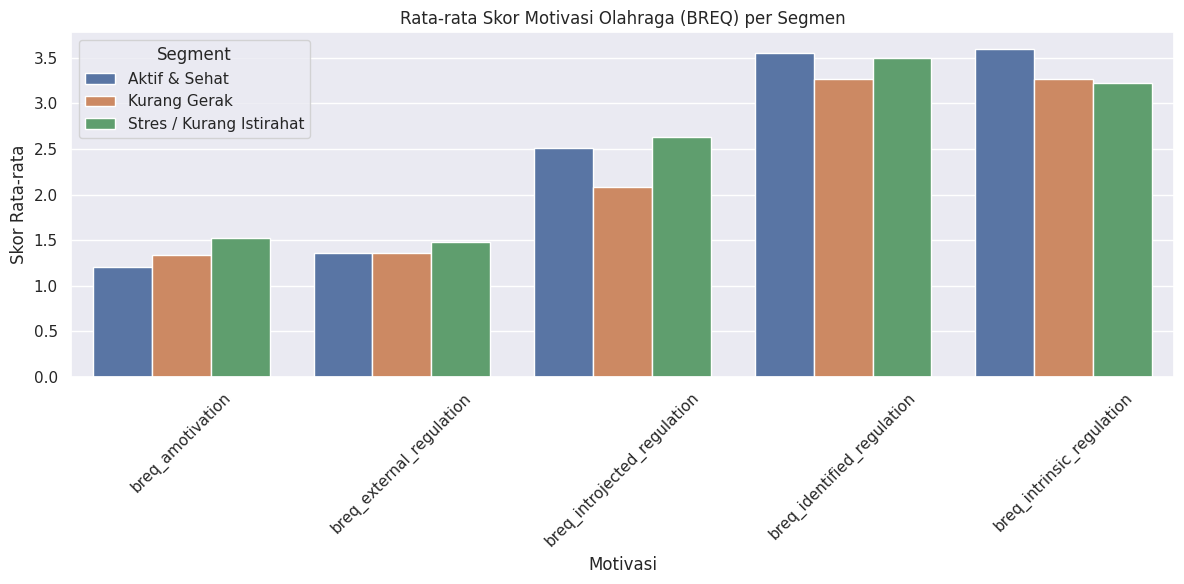

In [ ]:
avg_breq = df5_merged.groupby('Segment')[['breq_amotivation',
 'breq_external_regulation',
 'breq_introjected_regulation',
 'breq_identified_regulation',
 'breq_intrinsic_regulation']].mean().reset_index()

avg_breq_melted = avg_breq.melt(id_vars='Segment', var_name='Motivasi', value_name='Skor Rata-rata')
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_breq_melted, x='Motivasi', y='Skor Rata-rata', hue='Segment')
plt.title('Rata-rata Skor Motivasi Olahraga (BREQ) per Segmen')
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.tight_layout()
plt.show()

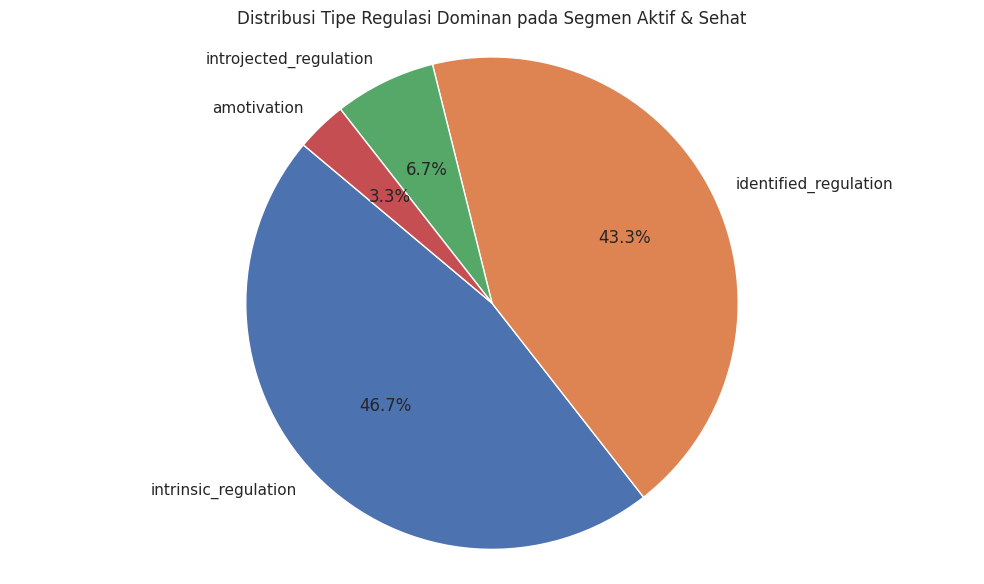

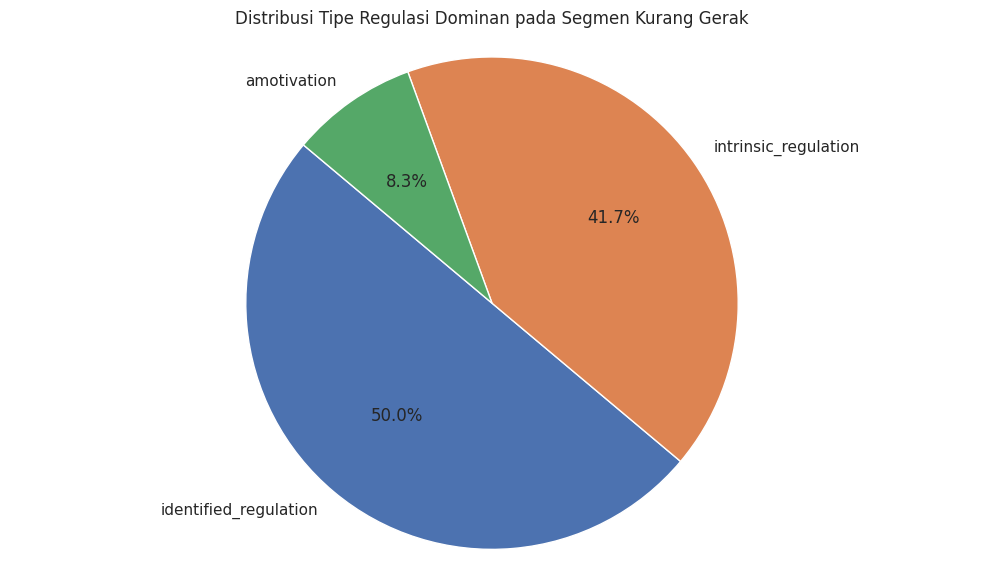

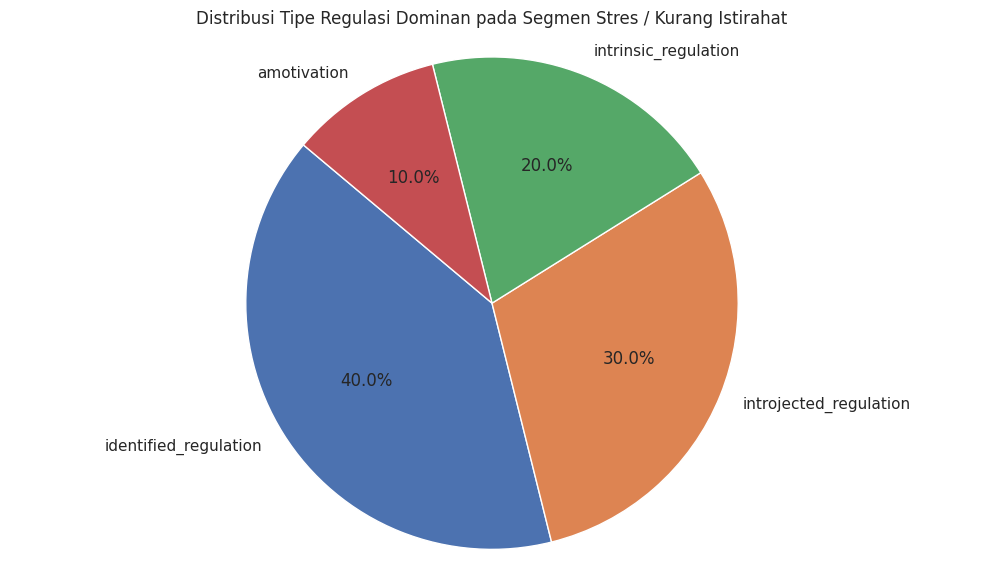

In [ ]:
segments = df5_merged['Segment'].unique()
for seg in segments:
    subset = df5_merged[df5_merged['Segment'] == seg]['breq_self_determination'].value_counts()
    plt.figure(figsize=(10, 6))
    plt.pie(subset, labels=subset.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribusi Tipe Regulasi Dominan pada Segmen {seg}')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

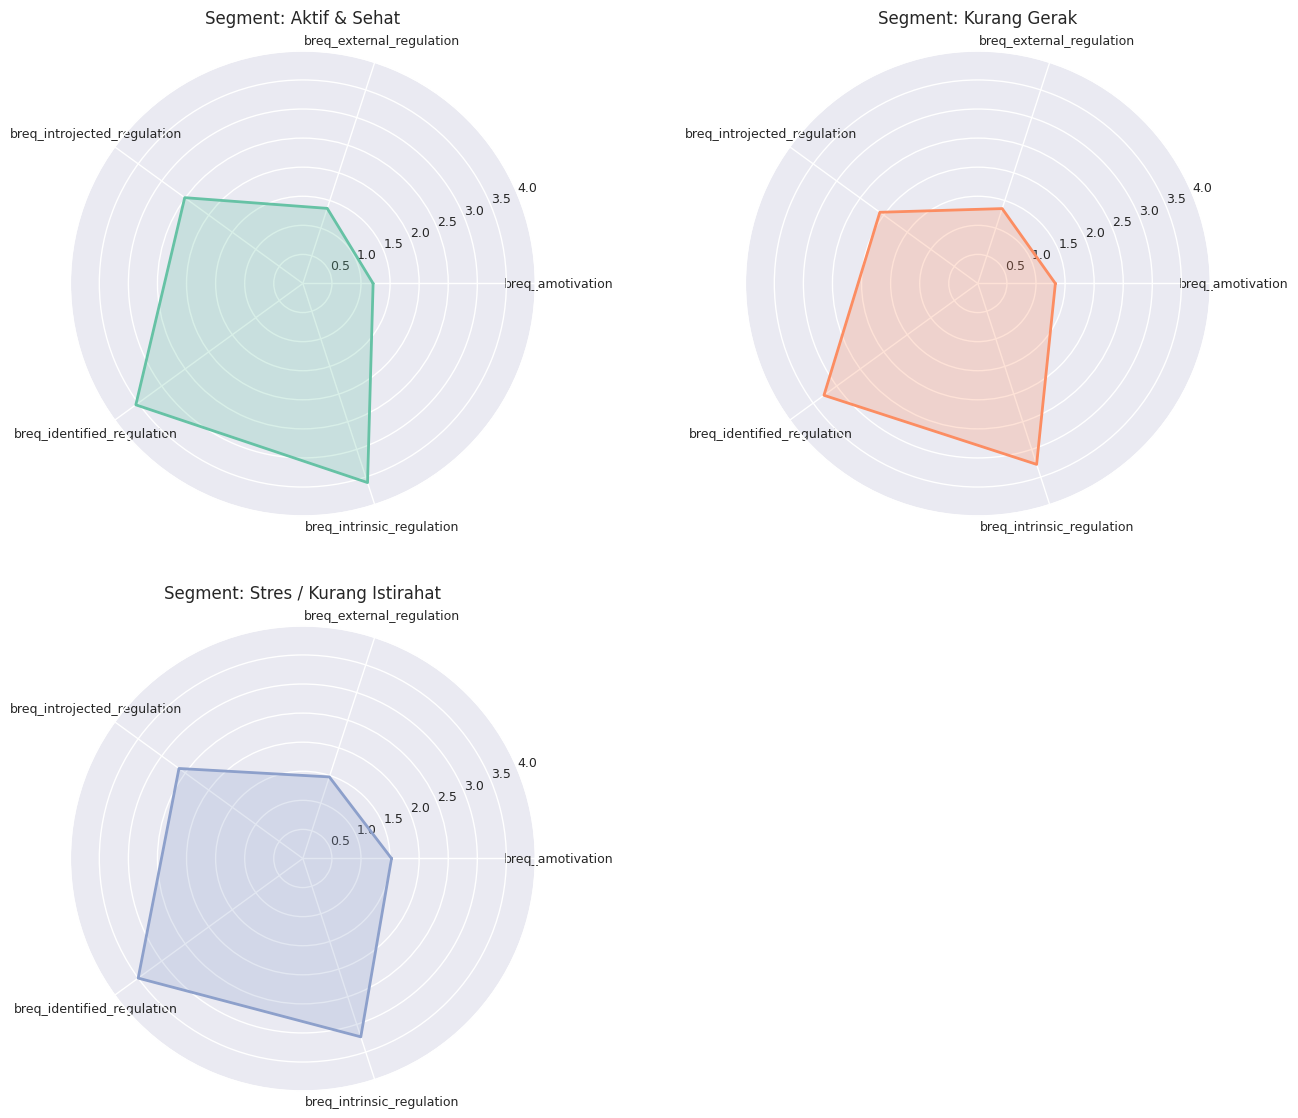

In [ ]:
categories = [
    'breq_amotivation',
    'breq_external_regulation',
    'breq_introjected_regulation',
    'breq_identified_regulation',
    'breq_intrinsic_regulation'
]
num_vars = len(categories)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']

df_grouped = df5_merged.groupby("Segment")[categories].mean().reset_index()

ncols = 2
nrows = int(np.ceil(len(df_grouped) / ncols))
fig, axs = plt.subplots(nrows, ncols, figsize=(7 * ncols, 6 * nrows), subplot_kw=dict(polar=True))
axs = axs.flatten()

for idx, (ax, (i, row)) in enumerate(zip(axs, df_grouped.iterrows())):
    values = row[categories].values.flatten().tolist()
    values += values[:1]

    ax.plot(angles, values, linewidth=2, linestyle='solid', color=colors[idx % len(colors)])
    ax.fill(angles, values, alpha=0.25, color=colors[idx % len(colors)])

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=8)
    ax.set_title(f'Segment: {row["Segment"]}', size=12, pad=20)
    ax.set_ylim(0, 4)
    ax.tick_params(labelsize=9)

for j in range(len(df_grouped), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout(pad=3)
plt.show()

In [ ]:
df_long = df5_merged.melt(
    id_vars='Segment',
    value_vars=['breq_amotivation',
                'breq_external_regulation',
                'breq_introjected_regulation',
                'breq_identified_regulation',
                'breq_intrinsic_regulation'],
    var_name='Tipe Regulasi',
    value_name='Skor'
)

df_long

Segment              Tipe Regulasi  Skor
0    Aktif & Sehat           breq_amotivation  1.00
1    Aktif & Sehat           breq_amotivation  1.00
2    Aktif & Sehat           breq_amotivation  1.00
3     Kurang Gerak           breq_amotivation  1.00
4     Kurang Gerak           breq_amotivation  1.00
..             ...                        ...   ...
255  Aktif & Sehat  breq_intrinsic_regulation  4.75
256   Kurang Gerak  breq_intrinsic_regulation  1.00
257  Aktif & Sehat  breq_intrinsic_regulation  4.75
258  Aktif & Sehat  breq_intrinsic_regulation  3.25
259  Aktif & Sehat  breq_intrinsic_regulation  2.75

[260 rows x 3 columns]

In [ ]:
df_long['Segment'].value_counts()

Segment
Aktif & Sehat               150
Kurang Gerak                 60
Stres / Kurang Istirahat     50
Name: count, dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

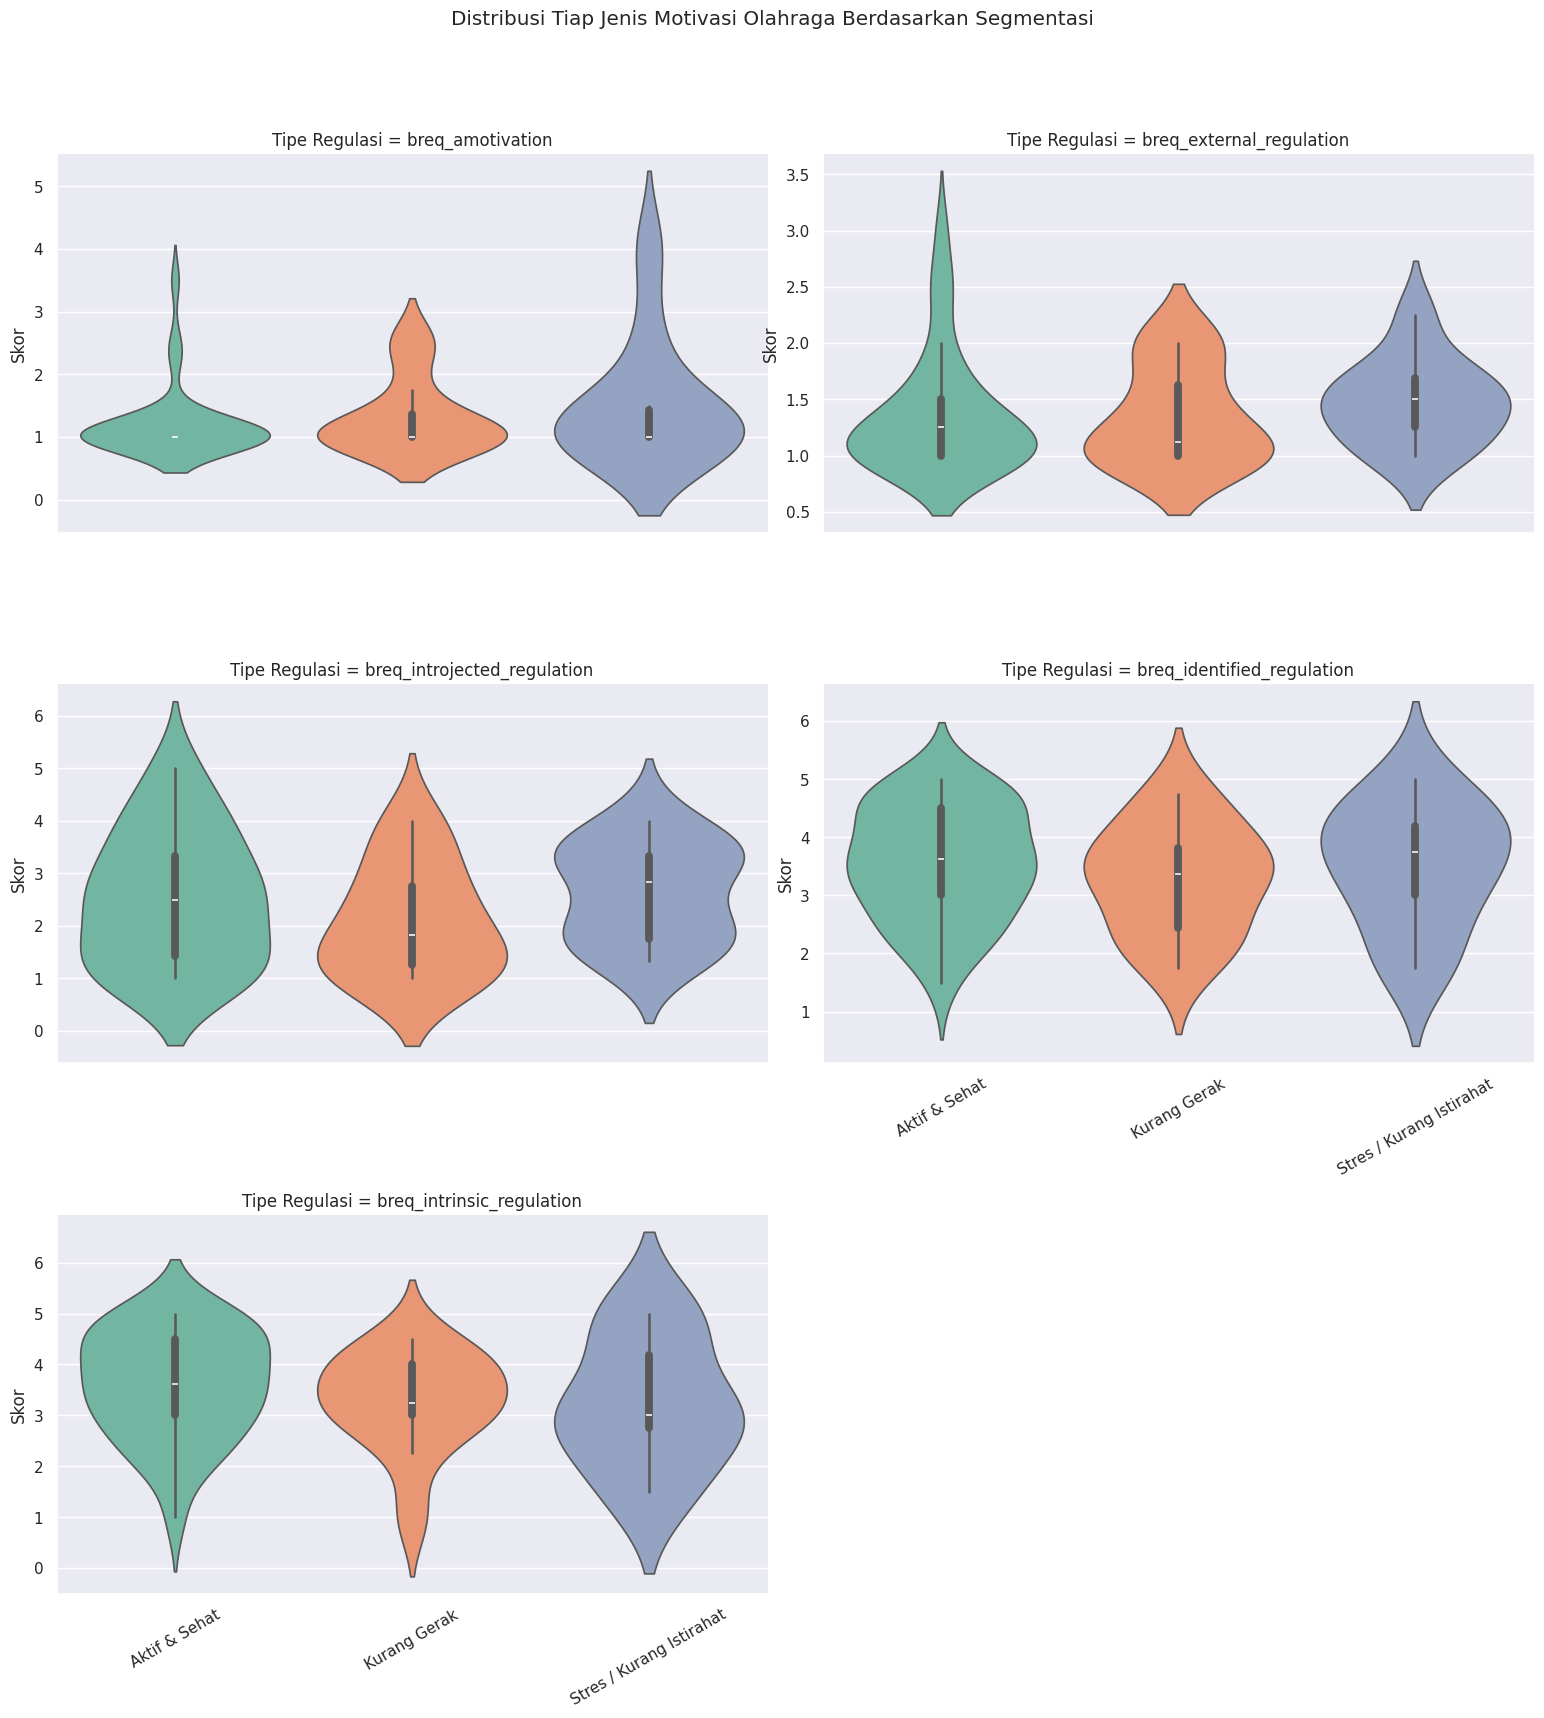

In [ ]:
segment_order = ['Aktif & Sehat', 'Kurang Gerak', 'Stres / Kurang Istirahat']

g = sns.FacetGrid(df_long, col='Tipe Regulasi', col_wrap=2, sharey=False, height=6, aspect=1.3)
g.map(sns.violinplot, 'Segment', 'Skor', palette='Set2', order=segment_order)

g.fig.subplots_adjust(top=0.9, bottom=0.1, hspace=0.4)
g.fig.suptitle('Distribusi Tiap Jenis Motivasi Olahraga Berdasarkan Segmentasi')

for ax in g.axes:
    ax.set_xlabel('')
    ax.set_ylabel('Skor')
    ax.tick_params(axis='x', labelrotation=30)

plt.show()

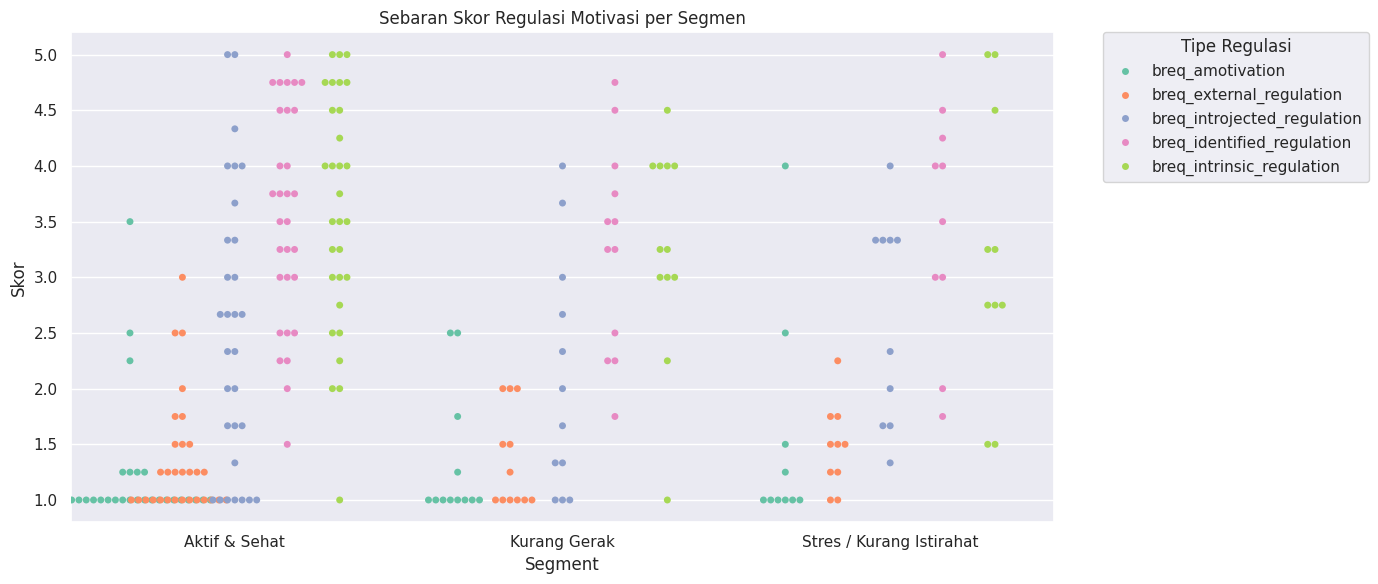

In [ ]:
regulasi_cols = ['breq_amotivation',
                'breq_external_regulation',
                'breq_introjected_regulation',
                'breq_identified_regulation',
                'breq_intrinsic_regulation']
df_melt = df5_merged.melt(id_vars='Segment', value_vars=regulasi_cols, var_name='Tipe Regulasi', value_name='Skor')

plt.figure(figsize=(14, 6))
sns.swarmplot(data=df_melt, x='Segment', y='Skor', hue='Tipe Regulasi', palette='Set2', dodge=True)

plt.title('Sebaran Skor Regulasi Motivasi per Segmen')
plt.legend(title='Tipe Regulasi', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()